In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt
from scipy import stats 

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df_stock=pd.read_csv('stock_top_100.csv')

In [4]:
df_stock.head()

Security Code                   Security Name  Close()  \
0         500325        RELIANCE INDUSTRIES LTD.  2638.35   
1         532540  TATA CONSULTANCY SERVICES LTD.  3322.85   
2         500180                   HDFC Bank Ltd  1674.75   
3         532174                 ICICI BANK LTD.   959.40   
4         500696         HINDUSTAN UNILEVER LTD.  2757.80   

   Market Capitalization( Cr.)  
0                   1785005.19  
1                   1215847.89  
2                    936486.51  
3                    671258.64  
4                    647970.28

In [5]:
df_daily=pd.read_csv('daily_stock_master.csv')

In [6]:
df_daily.head()

Date  Open Price  High Price  Low Price  Close Price          WAP  \
0  2023-06-30     2540.05     2556.70    2533.00      2550.70  2542.410839   
1  2023-06-28     2516.00     2537.25    2497.70      2529.35  2525.107662   
2  2023-06-27     2501.00     2510.00    2486.40      2495.80  2495.111112   
3  2023-06-26     2504.00     2515.90    2489.25      2494.20  2499.732812   
4  2023-06-23     2530.00     2532.80    2511.10      2515.25  2521.028400   

   No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0        289824          19687           736851679.0                176556   
1        171621          13923           433361502.0                116954   
2        148922          11504           371576937.0                116873   
3        197782          16762           494402155.0                133526   
4        289996          22793           731088152.0                145374   

   % Deli. Qty to Traded Qty  Spread High-Low  Spread Close-Open  \
0                      60.92            23.70              10.65   
1                      68.15            39.55              13.35   
2                      78.48            23.60              -5.20   
3                      67.51            26.65              -9.80   
4                      50.13            21.70             -14.75   

   Security Code  year  month  week  
0         500325  2023      6    26  
1         500325  2023      6    26  
2         500325  2023      6    26  
3         500325  2023      6    26  
4         500325  2023      6    25

In [7]:
df_sector=pd.read_csv('Sector_top.csv')

In [8]:
df_sector.head()

Security Code                 Security Name_x  Close()  \
0         500325        RELIANCE INDUSTRIES LTD.  2638.35   
1         532540  TATA CONSULTANCY SERVICES LTD.  3322.85   
2         500180                   HDFC Bank Ltd  1674.75   
3         532174                 ICICI BANK LTD.   959.40   
4         500696         HINDUSTAN UNILEVER LTD.  2757.80   

   Market Capitalization( Cr.)                     Issuer Name Security Id  \
0                   1785005.19         Reliance Industries Ltd    RELIANCE   
1                   1215847.89  Tata Consultancy Services Ltd.         TCS   
2                    936486.51                  HDFC Bank Ltd.    HDFCBANK   
3                    671258.64                 ICICI Bank Ltd.   ICICIBANK   
4                    647970.28        Hindustan Unilever Ltd.,  HINDUNILVR   

                  Security Name_y  Status Group  Face Value       ISIN No  \
0        RELIANCE INDUSTRIES LTD.  Active    A         10.0  INE002A01018   
1  TATA CONSULTANCY SERVICES LTD.  Active    A          1.0  INE467B01029   
2                   HDFC Bank Ltd  Active    A          1.0  INE040A01034   
3                 ICICI BANK LTD.  Active    A          2.0  INE090A01021   
4         HINDUSTAN UNILEVER LTD.  Active    A          1.0  INE030A01027   

                            Industry Instrument                 Sector Name  \
0             Refineries & Marketing     Equity                      Energy   
1  Computers - Software & Consulting     Equity      Information Technology   
2                Private Sector Bank     Equity          Financial Services   
3                Private Sector Bank     Equity          Financial Services   
4                   Diversified FMCG     Equity  Fast Moving Consumer Goods   

             Industry New Name         Igroup Name  \
0  Oil, Gas & Consumable Fuels  Petroleum Products   
1       Information Technology       IT - Software   
2           Financial Services               Banks   
3           Financial Services               Banks   
4   Fast Moving Consumer Goods    Diversified FMCG   

                      ISubgroup Name  
0             Refineries & Marketing  
1  Computers - Software & Consulting  
2                Private Sector Bank  
3                Private Sector Bank  
4                   Diversified FMCG

In [9]:
# deleting Close() , Market Capitalization( Cr.) from df_sector 
df_sector.drop(columns=['Close()'],axis=1,inplace=True)

In [10]:
df_sector

Security Code                        Security Name_x  \
0          500325               RELIANCE INDUSTRIES LTD.   
1          532540         TATA CONSULTANCY SERVICES LTD.   
2          500180                          HDFC Bank Ltd   
3          532174                        ICICI BANK LTD.   
4          500696                HINDUSTAN UNILEVER LTD.   
..            ...                                    ...   
95         540762          Tube Investments of India Ltd   
96         543220           Max Healthcare Institute Ltd   
97         500093  CG Power and Industrial Solutions Ltd   
98         532321                 Zydus Lifesciences Ltd   
99         532483                            CANARA BANK   

    Market Capitalization( Cr.)                                Issuer Name  \
0                    1785005.19                    Reliance Industries Ltd   
1                    1215847.89             Tata Consultancy Services Ltd.   
2                     936486.51                             HDFC Bank Ltd.   
3                     671258.64                            ICICI Bank Ltd.   
4                     647970.28                   Hindustan Unilever Ltd.,   
..                          ...                                        ...   
95                     61937.18              Tube Investments of India Ltd   
96                     59698.45           Max Healthcare Institute Limited   
97                     59568.40  CG Power and Industrial Solutions Limited   
98                     59436.63                 Zydus Lifesciences Limited   
99                     59140.65                                Canara Bank   

   Security Id                        Security Name_y  Status Group  \
0     RELIANCE               RELIANCE INDUSTRIES LTD.  Active    A    
1          TCS         TATA CONSULTANCY SERVICES LTD.  Active    A    
2     HDFCBANK                          HDFC Bank Ltd  Active    A    
3    ICICIBANK                        ICICI BANK LTD.  Active    A    
4   HINDUNILVR                HINDUSTAN UNILEVER LTD.  Active    A    
..         ...                                    ...     ...   ...   
95     TIINDIA          Tube Investments of India Ltd  Active    A    
96   MAXHEALTH           Max Healthcare Institute Ltd  Active    A    
97     CGPOWER  CG Power and Industrial Solutions Ltd  Active    A    
98   ZYDUSLIFE                 Zydus Lifesciences Ltd  Active    A    
99       CANBK                            CANARA BANK  Active    A    

    Face Value       ISIN No                           Industry Instrument  \
0         10.0  INE002A01018             Refineries & Marketing     Equity   
1          1.0  INE467B01029  Computers - Software & Consulting     Equity   
2          1.0  INE040A01034                Private Sector Bank     Equity   
3          2.0  INE090A01021                Private Sector Bank     Equity   
4          1.0  INE030A01027                   Diversified FMCG     Equity   
..         ...           ...                                ...        ...   
95         1.0  INE974X01010       Auto Components & Equipments     Equity   
96        10.0  INE027H01010                           Hospital     Equity   
97         2.0  INE067A01029         Heavy Electrical Equipment     Equity   
98         1.0  INE010B01027                    Pharmaceuticals     Equity   
99        10.0  INE476A01014                 Public Sector Bank     Equity   

                   Sector Name               Industry New Name  \
0                       Energy     Oil, Gas & Consumable Fuels   
1       Information Technology          Information Technology   
2           Financial Services              Financial Services   
3           Financial Services              Financial Services   
4   Fast Moving Consumer Goods      Fast Moving Consumer Goods   
..                         ...                             ...   
95      Consumer Discretionary  Automobile and Auto Components   
96                  Healthca

###  Column definations 

In [11]:
df_stock.columns 

Index(['Security Code', 'Security Name', 'Close()',
       'Market Capitalization( Cr.)'],
      dtype='object')

### df_stock has the following columns  

<font color=blue|red|green|pink|yellow> 1.) <b>Security Code</b> </font>: It refers to a unique identification code assigned to each security (stock) listed on the stock exchange. It helps in identifying and distinguishing one security from another. The security code is often used as a reference when trading or analyzing stocks.
<br>
<br>
<font color=blue|red|green|pink|yellow>2.)<b> Security Name</b></font>: This column represents the name or title of the security (stock) being traded in the stock market. It provides the name of the company or organization associated with the security. The security name is typically the name of the company whose stocks are being traded.
<br>
<br>
<font color=blue|red|green|pink|yellow>3.) <b>Close</b></font>: The "Close()" column represents the closing price of the security (stock) for a specific trading day. The closing price is the last traded price of the security at the end of the trading session. It is an essential parameter used in technical analysis, financial modeling, and determining the daily performance of a stock.
<br>
<br>
<font color=blue|red|green|pink|yellow>4.) <b>Market Capitalization </b></font>: This column represents the market capitalization of the security, measured in crores (Cr.). Market capitalization is the total market value of a company's outstanding shares of stock. It is calculated by multiplying the current stock price by the total number of outstanding shares. Market capitalization is an indicator of the size and worth of a company in the market.

In [12]:
df_daily.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Security Code', 'year', 'month', 'week'],
      dtype='object')

### df_daily has the following columns
- <font color=green>**Date**</font>: The specific date on which the stock market data is recorded or reported. It indicates the trading day for which the data points in the row are relevant.

- <font color=green>**Open Price**</font>: The price at which a security (stock) starts trading at the beginning of a trading session or on a particular trading day. It is the first price at which buyers and sellers transact for the security.

- <font color=green>**High Price**</font>: The highest price at which a security traded during a specific trading day. It indicates the maximum price level reached by the security during that trading session.

- <font color=green>**Low Price**</font>: The lowest price at which a security traded during a specific trading day. It represents the minimum price level reached by the security during that trading session.

- <font color=green>**Close Price**</font>: The final price at which a security traded at the end of a specific trading day. It represents the last price at which buyers and sellers transact for the security before the market closes.

- <font color=green>**WAP (Weighted Average Price)**</font>: The weighted average price of a security during a specific trading day. It is calculated by dividing the total value of all transactions (buy and sell) by the total quantity of shares traded. WAP provides a measure of the average price at which the security was traded throughout the day.

- <font color=green>**No. of Shares**</font>: The total number of shares of a security traded during a specific trading day. It represents the volume or quantity of shares bought or sold in the market.

- <font color=green>**No. of Trades**</font>: The total number of trades or transactions that took place for a security during a specific trading day. It indicates how many times the security changed hands between buyers and sellers.

- <font color=green>**Total Turnover (Rs.)**</font>: The total value of all transactions (buy and sell) for a security during a specific trading day. It is the cumulative sum of the prices multiplied by the quantities traded.

- <font color=green>**Deliverable Quantity**</font>: The number of shares that were actually delivered or exchanged between buyers and sellers during a specific trading day. It represents the quantity of shares that were not squared off (closed out) intraday.

- <font color=green>**% Deli. Qty to Traded Qty**</font>: The percentage of deliverable quantity (shares) to the total quantity of shares traded for a security during a specific trading day. It gives an indication of the liquidity and investor interest in the stock.

- <font color=green>**Spread High-Low**</font>: The difference or range between the high price and the low price of a security during a specific trading day. It provides insights into the price volatility or fluctuation experienced by the security within that trading session.

- <font color=green>**Spread Close-Open**</font>: The difference between the closing price and the opening price of a security during a specific trading day. It gives an indication of the net change or price movement of the security from the beginning to the end of the trading session.

- <font color=green>**Security Code**</font>: A unique identification code assigned to each security (stock) listed on the stock exchange.

- <font color=green>**Year**</font>: The year component of the date when the stock market data was recorded. It allows for analysis and grouping of data based on the year.

- <font color=green>**Month**</font>: The month component of the date when the stock market data was recorded. It allows for analysis and grouping of data based on the month.

- <font color=green>**Week**</font>: The week number within a year for the date when the stock market data was recorded. It allows for analysis and grouping of data based on the week.


| Column Name                   | Definition                                                  |
|-------------------------------|-------------------------------------------------------------|
| Date                          | The specific date on which the data is recorded.            |
| Open Price                    | The price at which a security starts trading on a day.       |
| High Price                    | The highest price at which a security traded during a day.   |
| Low Price                     | The lowest price at which a security traded during a day.    |
| Close Price                   | The final price at which a security traded on a day.         |
| WAP (Weighted Average Price)  | The weighted average price of a security for a day.         |
| No. of Shares                 | The total number of shares of a security traded in a day.    |
| No. of Trades                 | The total number of trades or transactions in a day.         |
| Total Turnover (Rs.)          | The total value of all transactions for a security in a day. |
| Deliverable Quantity          | The number of shares actually delivered in a day.           |
| % Deli. Qty to Traded Qty     | The percentage of deliverable quantity to traded quantity.  |
| Spread High-Low               | The difference between the high price and low price.         |
| Spread Close-Open             | The difference between the close price and open price.       |
| Security Code                 | The unique identification code for a security.               |
| Year                          | The year component of the date.                             |
| Month                         | The month component of the date.                            |
| Week                          | The week number within a year.                              |


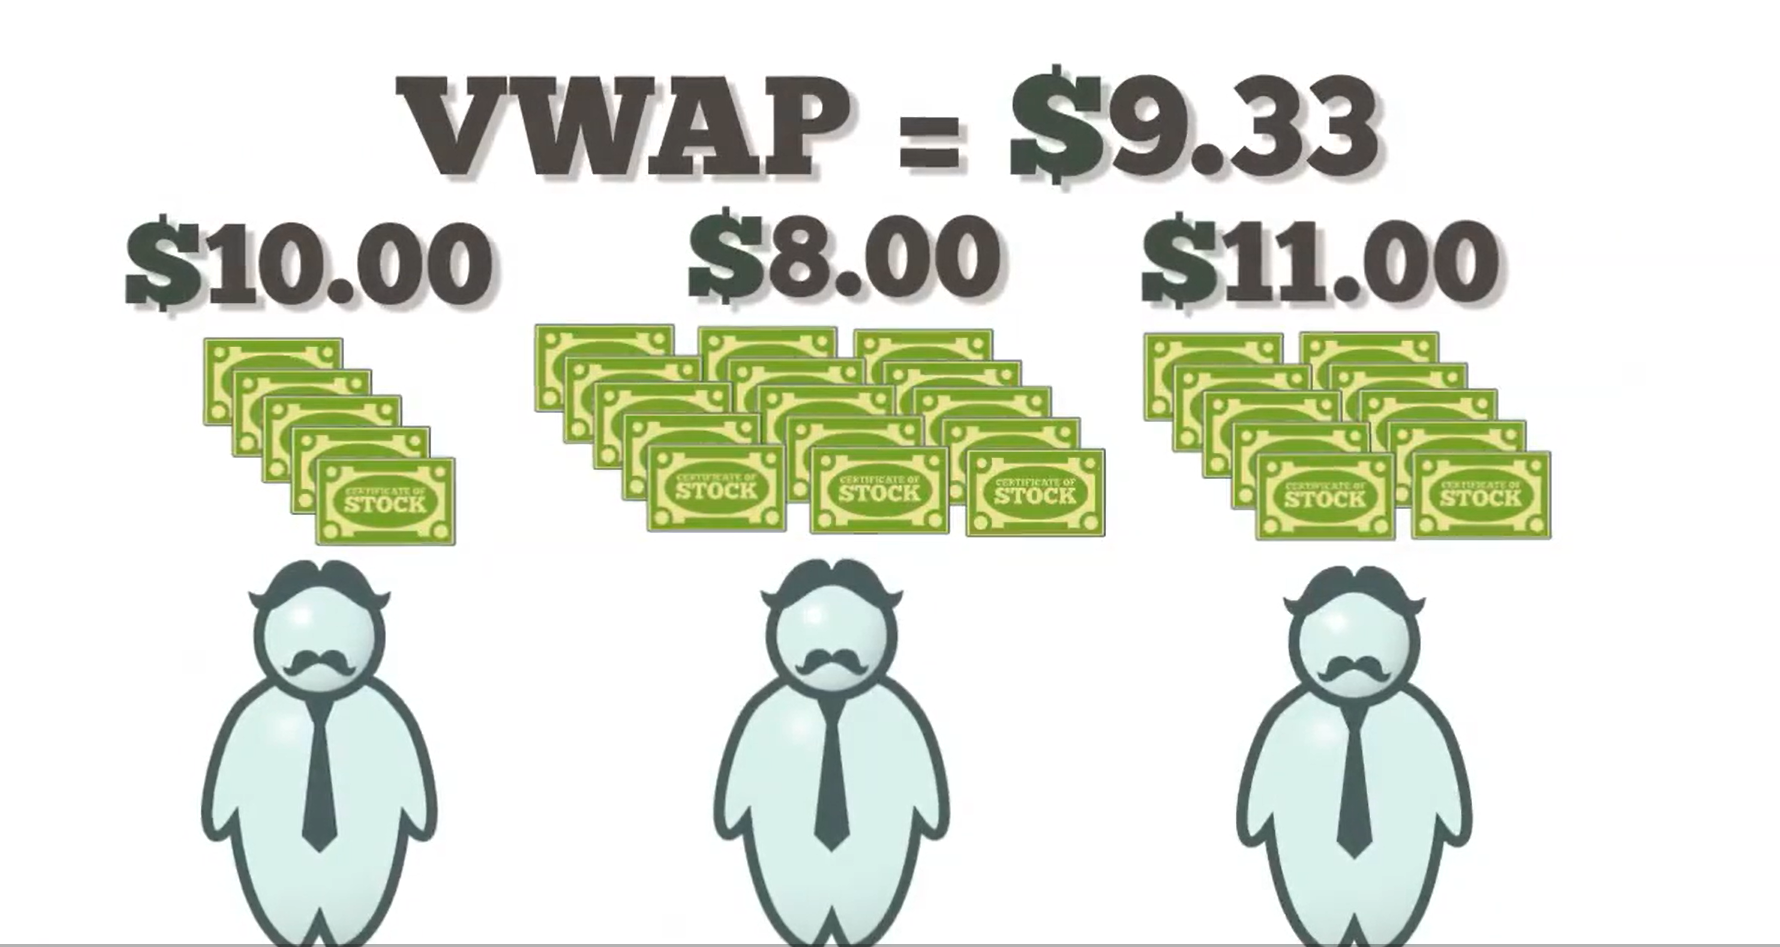

In [13]:
df_sector.columns

Index(['Security Code', 'Security Name_x', 'Market Capitalization( Cr.)',
       'Issuer Name', 'Security Id', 'Security Name_y', 'Status', 'Group',
       'Face Value', 'ISIN No', 'Industry', 'Instrument', 'Sector Name',
       'Industry New Name', 'Igroup Name', 'ISubgroup Name'],
      dtype='object')

In [14]:
df_sector['Face Value'].value_counts()

1.0     35
10.0    31
2.0     23
5.0     11
Name: Face Value, dtype: int64

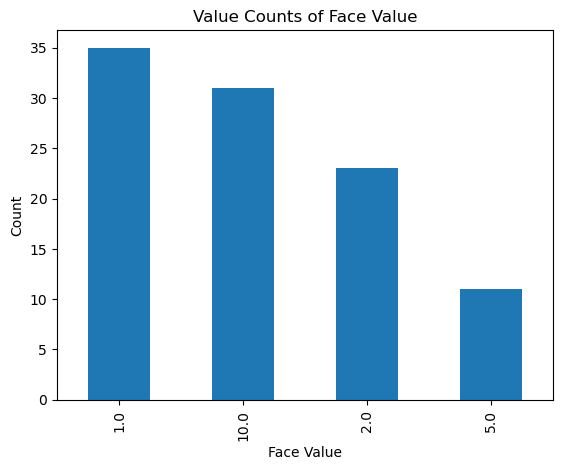

In [15]:
df_sector['Face Value'].value_counts().plot(kind='bar')
plt.xlabel('Face Value')
plt.ylabel('Count')
plt.title('Value Counts of Face Value')
plt.show()

### df_sector has the following columns
<font color=green>**Issuer Name:**</font> The Issuer Name column represents the name of the company or organization that issued the security. It refers to the entity responsible for offering and issuing the security to the public.


<font color=green>**Status:**</font> The Status column indicates the current status or condition of the security. It may provide information on whether the security is active, suspended, delisted, or has any other status designation.

<font color=green>**Group:**</font> The Group column refers to the group or category to which the security belongs. It can be used to classify securities based on certain characteristics, such as market capitalization, industry sector, or regulatory requirements.

<font color=green>**Face Value:**</font> The Face Value column represents the nominal or par value of the security. It is the initial value assigned to the security at the time of issuance and is typically mentioned on the security certificate.

<font color=green>**ISIN No:**</font> The ISIN No column refers to the International Securities Identification Number (ISIN) associated with the security. It is a unique alphanumeric code used to identify specific securities.

<font color=green>**Industry:**</font> The Industry column indicates the industry or sector to which the security or the issuing company belongs. It provides information about the primary business or sector in which the company operates.

<font color=green>**Instrument:**</font> The Instrument column refers to the type or nature of the financial instrument represented by the security. It may indicate whether the security is a stock, bond, derivative, or any other type of financial instrument.

<font color=green>**Sector Name:**</font> The Sector Name column represents the sector or industry group to which the security or the issuing company belongs. It provides a broader categorization of the industry or sector compared to the Industry column.

<font color=green>**Industry New Name:**</font> This column may contain an updated or modified name for the industry or sector to which the security or the issuing company belongs.

<font color=green>**Igroup Name:**</font> The Igroup Name column represents the group or category to which the security or the issuing company belongs. It may provide further classification within the broader sector or industry grouping.

<font color=green>**ISubgroup Name:**</font> The ISubgroup Name column represents a subgroup or subcategory within the industry or sector to which the security or the issuing company belongs.


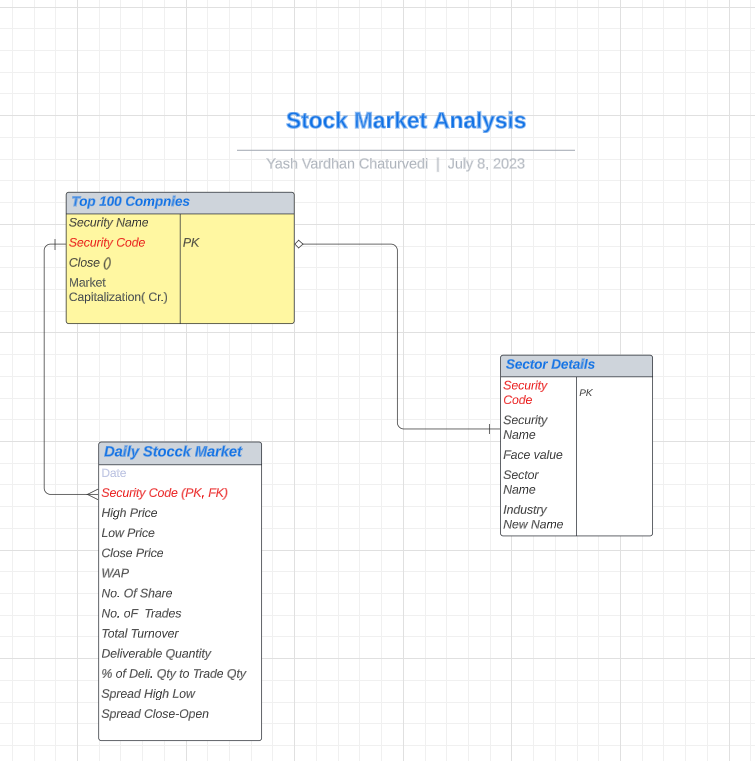

In [16]:
import os 
os.environ['GOOGLE_APPLICATION_CREDENTIALS']='Bigquery_python.json'

In [17]:
# Importing some lib for some Bigquery connection 
import os 
import db_dtypes
os.environ['GOOGLE_APPLICATION_CREDENTIALS']='stocks-392220-e534c3664cbe.json'
from google.cloud import bigquery
client = bigquery.Client()

C:\Users\Yash\anaconda\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.3) or chardet (3.0.4)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


In [18]:
# sql runner for big_query 
client = bigquery.Client()
def runner(sql):
    results=client.query(sql).to_dataframe()
    return results 

In [19]:
query="SELECT * FROM `stocks-392220.stocks_top_hun.stock_top_100` LIMIT 10"
runner(query)

Security_Code                          Security_Name  Close__  \
0         500325               RELIANCE INDUSTRIES LTD.  2638.35   
1         532540         TATA CONSULTANCY SERVICES LTD.  3322.85   
2         500180                          HDFC Bank Ltd  1674.75   
3         532174                        ICICI BANK LTD.   959.40   
4         500696                HINDUSTAN UNILEVER LTD.  2757.80   
5         500875                               ITC LTD.   473.75   
6         500209                           INFOSYS LTD.  1343.90   
7         500112                    STATE BANK OF INDIA   592.30   
8         500010  HOUSING DEVELOPMENT FINANCE CORP.LTD.  2795.60   
9         532454                     BHARTI AIRTEL LTD.   870.15   

   Market_Capitalization__Cr__  
0                   1785005.19  
1                   1215847.89  
2                    936486.51  
3                    671258.64  
4                    647970.28  
5                    588777.34  
6                    557701.66  
7                    528604.76  
8                    517584.79  
9                    485653.38

In [20]:
query="SELECT * FROM `stocks-392220.stocks_top_hun.stock_top_100` LIMIT 10"
runner(query)

Security_Code                          Security_Name  Close__  \
0         500325               RELIANCE INDUSTRIES LTD.  2638.35   
1         532540         TATA CONSULTANCY SERVICES LTD.  3322.85   
2         500180                          HDFC Bank Ltd  1674.75   
3         532174                        ICICI BANK LTD.   959.40   
4         500696                HINDUSTAN UNILEVER LTD.  2757.80   
5         500875                               ITC LTD.   473.75   
6         500209                           INFOSYS LTD.  1343.90   
7         500112                    STATE BANK OF INDIA   592.30   
8         500010  HOUSING DEVELOPMENT FINANCE CORP.LTD.  2795.60   
9         532454                     BHARTI AIRTEL LTD.   870.15   

   Market_Capitalization__Cr__  
0                   1785005.19  
1                   1215847.89  
2                    936486.51  
3                    671258.64  
4                    647970.28  
5                    588777.34  
6                    557701.66  
7                    528604.76  
8                    517584.79  
9                    485653.38

In [21]:
query="SELECT * FROM `stocks-392220.stocks_top_hun.daily` LIMIT 10"
runner(query).head()

Date  Open_Price  High_Price  Low_Price  Close_Price          WAP  \
0  2023-04-10     2346.00     2350.40    2321.90       2324.6  2336.128062   
1  2023-04-10     3217.00     3271.00    3215.55       3263.2  3252.170839   
2  2023-04-10     1665.00     1670.80    1654.50       1658.1  1663.603793   
3  2023-04-10      877.35      882.65     864.45        868.3   872.537001   
4  2023-04-10     2561.00     2567.45    2525.00       2535.1  2542.558562   

   No_of_Shares  No__of_Trades  Total_Turnover__Rs__  Deliverable_Quantity  \
0         93595          10420           218649906.0                 36654   
1        101932          10964           331500278.0                 51611   
2        163677           6764           272293678.0                 98179   
3        157821           4802           137704662.0                 52832   
4         19142           1560            48669656.0                 13164   

   __Deli__Qty_to_Traded_Qty  Spread_High_Low  Spread_Close_Open  \
0                      39.16            28.50             -21.40   
1                      50.63            55.45              46.20   
2                      59.98            16.30              -6.90   
3                      33.48            18.20              -9.05   
4                      68.77            42.45             -25.90   

   Security_Code  year  month  week  
0         500325  2023      4    15  
1         532540  2023      4    15  
2         500180  2023      4    15  
3         532174  2023      4    15  
4         500696  2023      4    15

In [22]:
query="SELECT * FROM `stocks-392220.stocks_top_hun.sector` LIMIT 10"
runner(query).head()

Security_Code                      Security_Name_x  Close__  \
0         532155                    GAIL (INDIA) LTD.   110.85   
1         542066                  Adani Total Gas Ltd   648.60   
2         500312  Oil and Natural Gas Corporation Ltd   165.40   
3         533278                      COAL INDIA LTD.   234.55   
4         500325             RELIANCE INDUSTRIES LTD.  2638.35   

   Market_Capitalization__Cr__                          Issuer_Name  \
0                     72884.98                    Gail (India) Ltd.   
1                     71333.68              ADANI TOTAL GAS LIMITED   
2                    208077.82  Oil And Natural Gas Corporation Ltd   
3                    144546.79                   Coal India Limited   
4                   1785005.19              Reliance Industries Ltd   

  Security_Id                      Security_Name_y  Status Group  Face_Value  \
0        GAIL                    GAIL (INDIA) LTD.  Active    A         10.0   
1        ATGL                  Adani Total Gas Ltd  Active    A          1.0   
2        ONGC  Oil and Natural Gas Corporation Ltd  Active    A          5.0   
3   COALINDIA                      COAL INDIA LTD.  Active    A         10.0   
4    RELIANCE             RELIANCE INDUSTRIES LTD.  Active    A         10.0   

        ISIN_No                      Industry Instrument Sector_Name  \
0  INE129A01019    Gas Transmission/Marketing     Equity      Energy   
1  INE399L01023      LPG/CNG/PNG/LNG Supplier     Equity      Energy   
2  INE213A01029  Oil Exploration & Production     Equity      Energy   
3  INE522F01014                          Coal     Equity      Energy   
4  INE002A01018        Refineries & Marketing     Equity      Energy   

             Industry_New_Name         Igroup_Name  \
0  Oil, Gas & Consumable Fuels                 Gas   
1  Oil, Gas & Consumable Fuels                 Gas   
2  Oil, Gas & Consumable Fuels                 Oil   
3  Oil, Gas & Consumable Fuels    Consumable Fuels   
4  Oil, Gas & Consumable Fuels  Petroleum Products   

                 ISubgroup_Name  
0    Gas Transmission/Marketing  
1      LPG/CNG/PNG/LNG Supplier  
2  Oil Exploration & Production  
3                          Coal  
4        Refineries & Marketing

In [23]:
df_plt=df_sector.groupby('Industry New Name').agg({'Security Code':'nunique'}).reset_index().sort_values(by='Security Code',ascending=False)
df_plt

Industry New Name  Security Code
8               Financial Services             22
7       Fast Moving Consumer Goods             10
9                       Healthcare              9
0   Automobile and Auto Components              9
11                 Metals & Mining              7
12     Oil, Gas & Consumable Fuels              7
10          Information Technology              6
13                           Power              6
1                    Capital Goods              5
4           Construction Materials              4
5                Consumer Durables              4
6                Consumer Services              3
2                        Chemicals              2
14                          Realty              2
15                        Services              2
3                     Construction              1
16               Telecommunication              1

[]

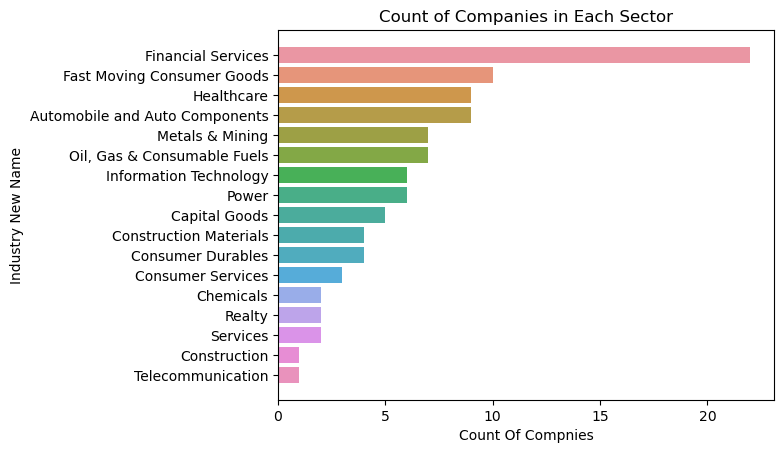

In [176]:
# Count of Compnies in each Each Sector
df_plt=df_sector.groupby('Industry New Name').agg({'Security Code':'nunique'}).reset_index().sort_values(by='Security Code',ascending=False)
sns.barplot(y=df_plt['Industry New Name'],x=df_plt['Security Code'])
plt.xlabel('Count Of Compnies')
plt.title("Count of Companies in Each Sector")
plt.plot()

**22% of all the compnies in BSE Top 100 are from Financial Services Sector On the other hand only one company from Construction and Telecommunication each.**

In [25]:
query="SELECT d.Security_Code,s.Security_Name_x,d.Date, d.Open_Price, d.Close_Price, d.No_of_Shares, s.Industry_New_Name FROM `stocks-392220.stocks_top_hun.sector` as s INNER JOIN `stocks-392220.stocks_top_hun.daily` as d ON d.Security_Code=s.Security_Code "
df_result=runner(query)

In [26]:
df_result.head(5)

Security_Code    Security_Name_x        Date  Open_Price  Close_Price  \
0         532155  GAIL (INDIA) LTD.  2023-04-10      105.60       105.95   
1         532155  GAIL (INDIA) LTD.  2023-04-11      106.10       106.00   
2         532155  GAIL (INDIA) LTD.  2023-04-12      105.25       108.65   
3         532155  GAIL (INDIA) LTD.  2023-04-13      110.10       108.10   
4         532155  GAIL (INDIA) LTD.  2023-04-17      108.15       110.20   

   No_of_Shares            Industry_New_Name  
0        815565  Oil, Gas & Consumable Fuels  
1        532454  Oil, Gas & Consumable Fuels  
2        602893  Oil, Gas & Consumable Fuels  
3       1319979  Oil, Gas & Consumable Fuels  
4        307558  Oil, Gas & Consumable Fuels

In [27]:
query="SELECT s.Industry_New_Name,AVG(d.Open_Price) as avg_open_price, AVG(d.Close_Price) as avg_closing_price FROM `stocks-392220.stocks_top_hun.sector` as s INNER JOIN `stocks-392220.stocks_top_hun.daily` as d ON d.Security_Code=s.Security_Code GROUP BY s.Industry_New_Name"
df_avg_per_sector=runner(query)
df_avg_per_sector

Industry_New_Name  avg_open_price  avg_closing_price
0      Oil, Gas & Consumable Fuels      667.248630         665.903279
1                         Services     1390.724180        1391.236885
2                            Power      513.266052         511.148566
3                       Healthcare     2074.536834        2078.180720
4                  Metals & Mining      671.929684         668.751112
5           Construction Materials     8600.230020        8608.209734
6                        Chemicals     2401.768852        2399.958607
7                     Construction     2224.675820        2226.032787
8                    Capital Goods     2014.686328        2017.412803
9                Telecommunication      788.514754         788.501230
10              Financial Services     1415.974445        1416.968864
11                          Realty      649.512910         650.561066
12               Consumer Services     1675.385109        1673.845410
13  Automobile and Auto Components     2725.787923        2728.029709
14               Consumer Durables     1844.587910        1846.087602
15          Information Technology     1981.980464        1983.595014
16      Fast Moving Consumer Goods     3267.678361        3270.823156

[]

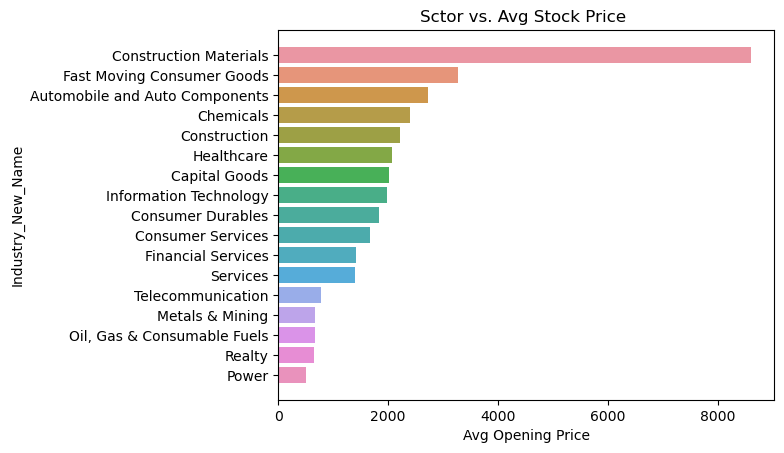

In [29]:
df_plt=df_avg_per_sector.reset_index().sort_values(by='avg_open_price',ascending=False)
sns.barplot(y=df_plt['Industry_New_Name'],x=df_plt['avg_open_price'])
plt.xlabel('Avg Opening Price')
plt.title("Sctor vs. Avg Stock Price ")
plt.plot()

**Construction Materials has the higest Avg Value of a stock On the Other hand Power has the lowest Average Value**

### Historical Performance Analysis

**Calculating average, minimum, maximum, and standard deviation of daily stock values for each of the top 50 companies over the past six months** 


In [30]:
query='''SELECT sec.Industry_New_Name,s.Security_Name_x, s.Security_Code,
ROUND(AVG(d.Open_Price),2) as avg_opn_price, 
ROUND(AVG(d.Close_Price),2) as avg_closing_price, 
ROUND(AVG(d.Spread_Close_Open),2) as avg_spread_open_close, 
ROUND(AVG(d.Spread_High_Low),2) as avg_spread_high_low,
ROUND(MIN(d.Low_Price),2) as min_price,
ROUND(Max(d.High_price),2) as max_price,
ROUND(STDDEV(d.Open_price),2) as std_dev_op,
ROUND(STDDEV(d.Close_Price),2) as std_dev_close 
FROM `stocks-392220.stocks_top_hun.daily` as d 
Inner Join `stocks-392220.stocks_top_hun.sector` as s 
ON s.Security_Code=d.Security_Code 
INNER JOIN stocks-392220.stocks_top_hun.sector as sec
ON s.Security_Code=sec.Security_Code
GROUP BY s.Security_Name_x, s.Security_Code,sec.Industry_New_Name
ORDER BY sec.Industry_New_Name, s.Security_Name_x '''
runner(query)
df_avg_min_max_daily=runner(query)
df_avg_min_max_daily

Industry_New_Name  \
0   Automobile and Auto Components   
1   Automobile and Auto Components   
2   Automobile and Auto Components   
3   Automobile and Auto Components   
4   Automobile and Auto Components   
..                             ...   
95                          Realty   
96                          Realty   
97                        Services   
98                        Services   
99               Telecommunication   

                               Security_Name_x  Security_Code  avg_opn_price  \
0                              BAJAJ AUTO LTD.         532977        4111.74   
1                           EICHER MOTORS LTD.         505200        3297.69   
2                           HERO MOTOCORP LTD.         500182        2617.18   
3                     MAHINDRA & MAHINDRA LTD.         500520        1285.35   
4                     MARUTI SUZUKI INDIA LTD.         532500        8836.87   
..                                         ...            ...            ...   
95                                    DLF LTD.         532868         405.09   
96                    Macrotech Developers Ltd         543287         893.93   
97  ADANI PORTS AND SPECIAL ECONOMIC ZONE LTD.         532921         683.76   
98                     InterGlobe Aviation Ltd         539448        2097.68   
99                          BHARTI AIRTEL LTD.         532454         788.51   

    avg_closing_price  avg_spread_open_close  avg_spread_high_low  min_price  \
0             4125.99                  14.25                76.44    3522.00   
1             3298.52                   0.83                69.37    2835.95   
2             2619.23                   2.05                52.12    2246.75   
3             1285.14                  -0.21                26.32    1124.00   
4             8838.11                   1.24               137.30    8127.05   
..                ...                    ...                  ...        ...   
95             406.30                   1.21                 9.92     336.55   
96             894.82                   0.89                41.39     510.30   
97             681.67                  -2.10                26.82     394.95   
98            2100.81                   3.12                46.89    1810.45   
99             788.50                  -0.01                14.41     736.20   

    max_price  std_dev_op  std_dev_close  
0     4828.80      407.27         407.13  
1     3746.25      229.06         231.01  
2     3025.50      174.48         176.75  
3     1461.00       77.85          78.35  
4     9849.35      421.96         427.52  
..        ...         ...            ...  
95     508.50       52.87          53.26  
96    1143.00      152.00         150.71  
97     826.50       77.24          76.70  
98    2656.95      209.90         211.66  
99     888.00       30.30          31.33  

[100 rows x 11 columns]

In [199]:
df_avg_min_max_daily.head()

Industry_New_Name           Security_Name_x  Security_Code  \
0  Automobile and Auto Components           BAJAJ AUTO LTD.         532977   
1  Automobile and Auto Components        EICHER MOTORS LTD.         505200   
2  Automobile and Auto Components        HERO MOTOCORP LTD.         500182   
3  Automobile and Auto Components  MAHINDRA & MAHINDRA LTD.         500520   
4  Automobile and Auto Components  MARUTI SUZUKI INDIA LTD.         532500   

   avg_opn_price  avg_closing_price  avg_spread_open_close  \
0        4111.74            4125.99                  14.25   
1        3297.69            3298.52                   0.83   
2        2617.18            2619.23                   2.05   
3        1285.35            1285.14                  -0.21   
4        8836.87            8838.11                   1.24   

   avg_spread_high_low  min_price  max_price  std_dev_op  std_dev_close  \
0                76.44    3522.00    4828.80      407.27         407.13   
1                69.37    2835.95    3746.25      229.06         231.01   
2                52.12    2246.75    3025.50      174.48         176.75   
3                26.32    1124.00    1461.00       77.85          78.35   
4               137.30    8127.05    9849.35      421.96         427.52   

   Avg_open_close_spread  
0                  14.25  
1                   0.83  
2                   2.05  
3                  -0.21  
4                   1.24

[]

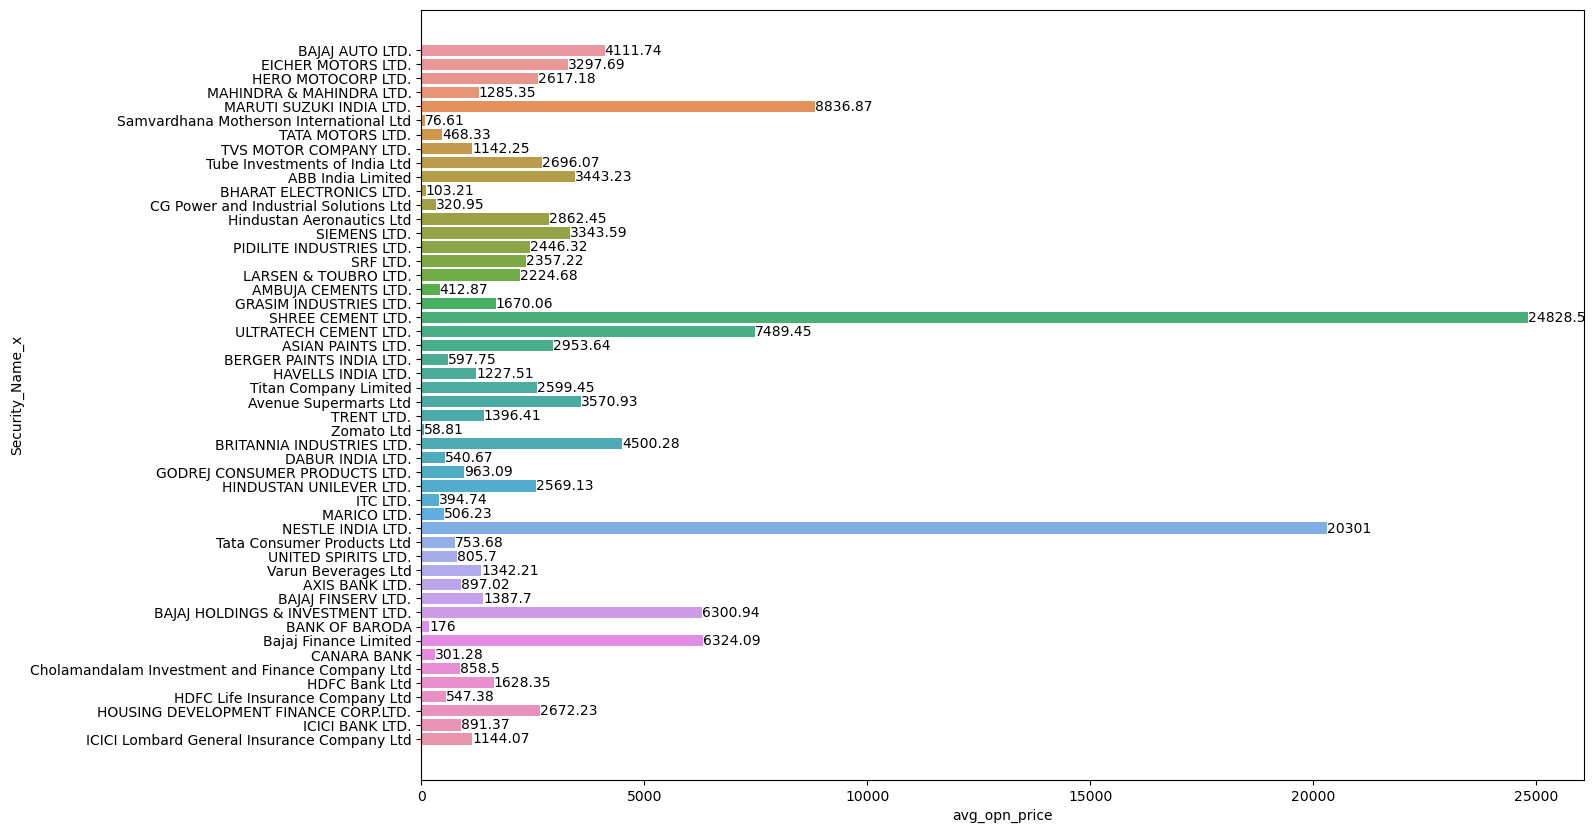

In [31]:
# Bse top 50 average stock price 
plt.figure(figsize=(15, 10))
ax= sns.barplot(y=df_avg_min_max_daily['Security_Name_x'][:50],x=df_avg_min_max_daily['avg_opn_price'][:50])
ax.bar_label(ax.containers[0])
plt.plot()

[]

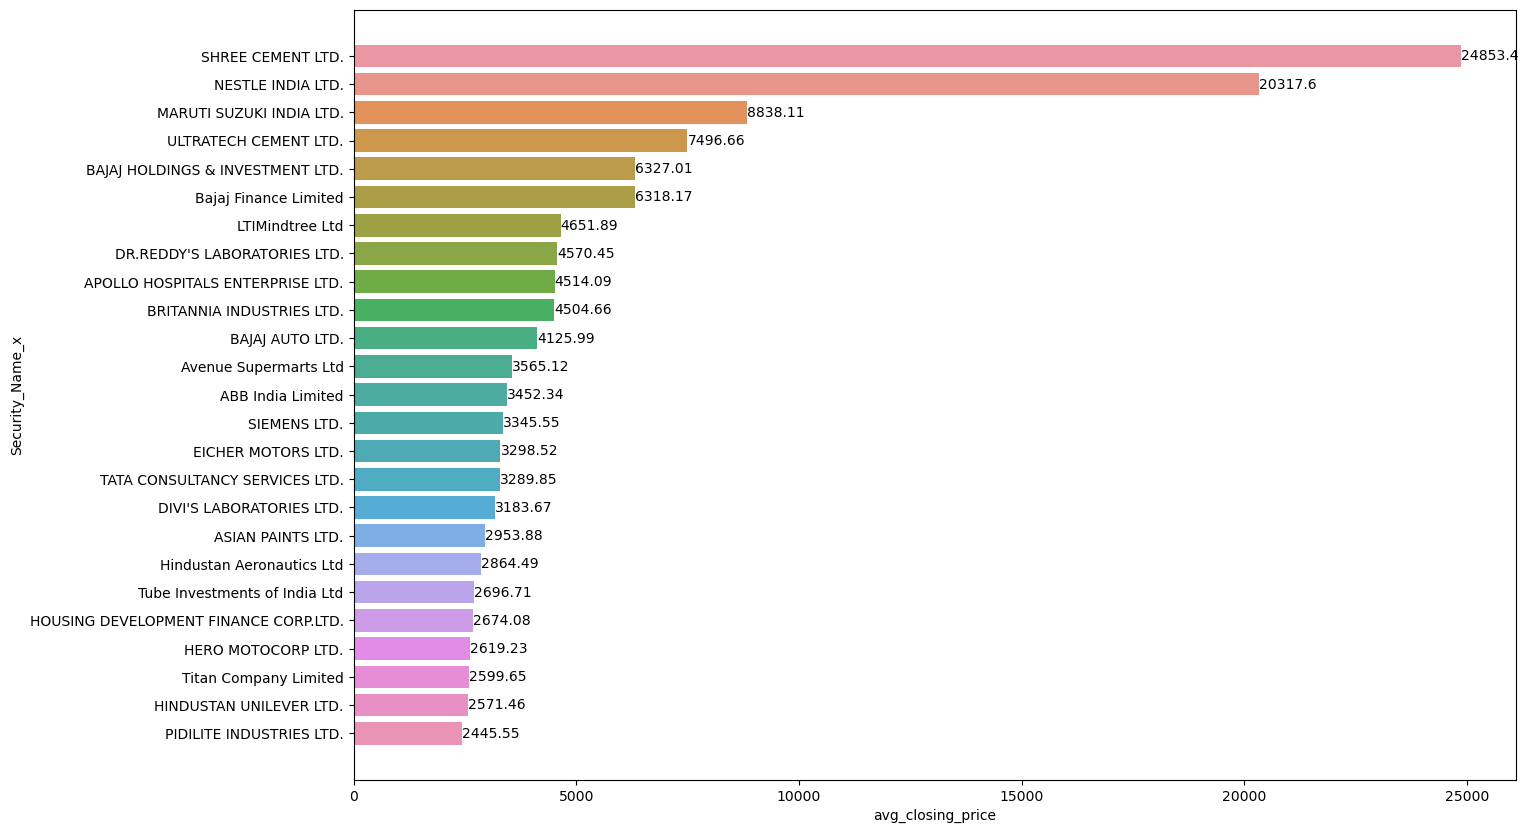

In [33]:
# most expensive stocks in bse 100
plt.figure(figsize=(15, 10))
df_plt=df_avg_min_max_daily.sort_values(by='avg_closing_price',ascending=False).reset_index(drop=True)
ax=sns.barplot(y=df_plt['Security_Name_x'][:25],x=df_plt['avg_closing_price'][:25])
ax.bar_label(ax.containers[0])
plt.plot()

**Shree Cemnet & and Nestle is the most expensive stock in BSE Top 100**

[]

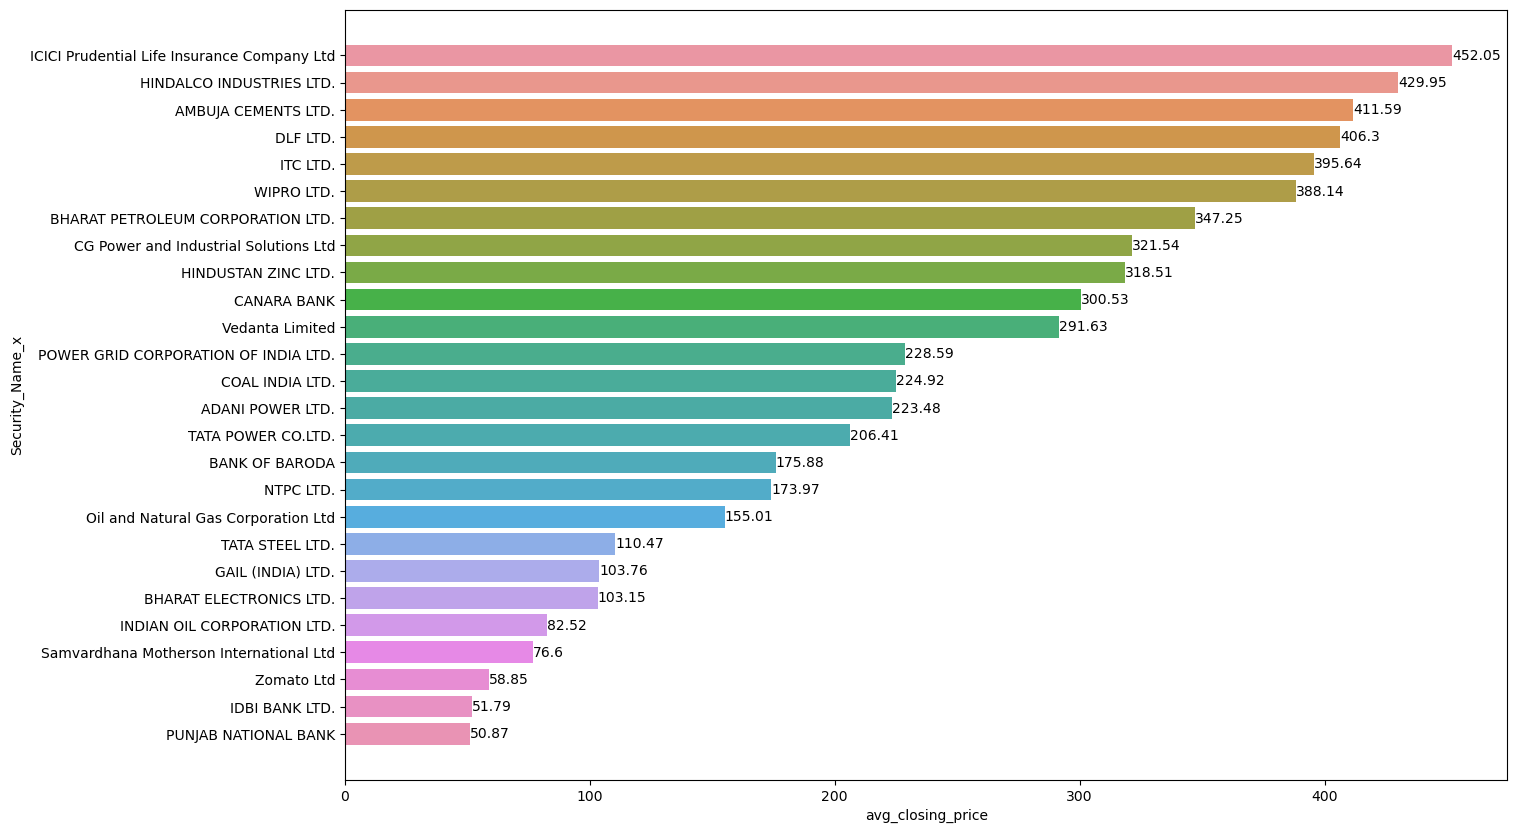

In [34]:
# least expensive stocks in bes 100
plt.figure(figsize=(15, 10))
df_plt=df_avg_min_max_daily.sort_values(by='avg_closing_price',ascending=False).reset_index(drop=True)
ax=sns.barplot(y=df_plt['Security_Name_x'][74:],x=df_plt['avg_closing_price'][74:])
ax.bar_label(ax.containers[0])
plt.plot()

**PNB and IDBI is the least expensive stock in BSE Top 100**

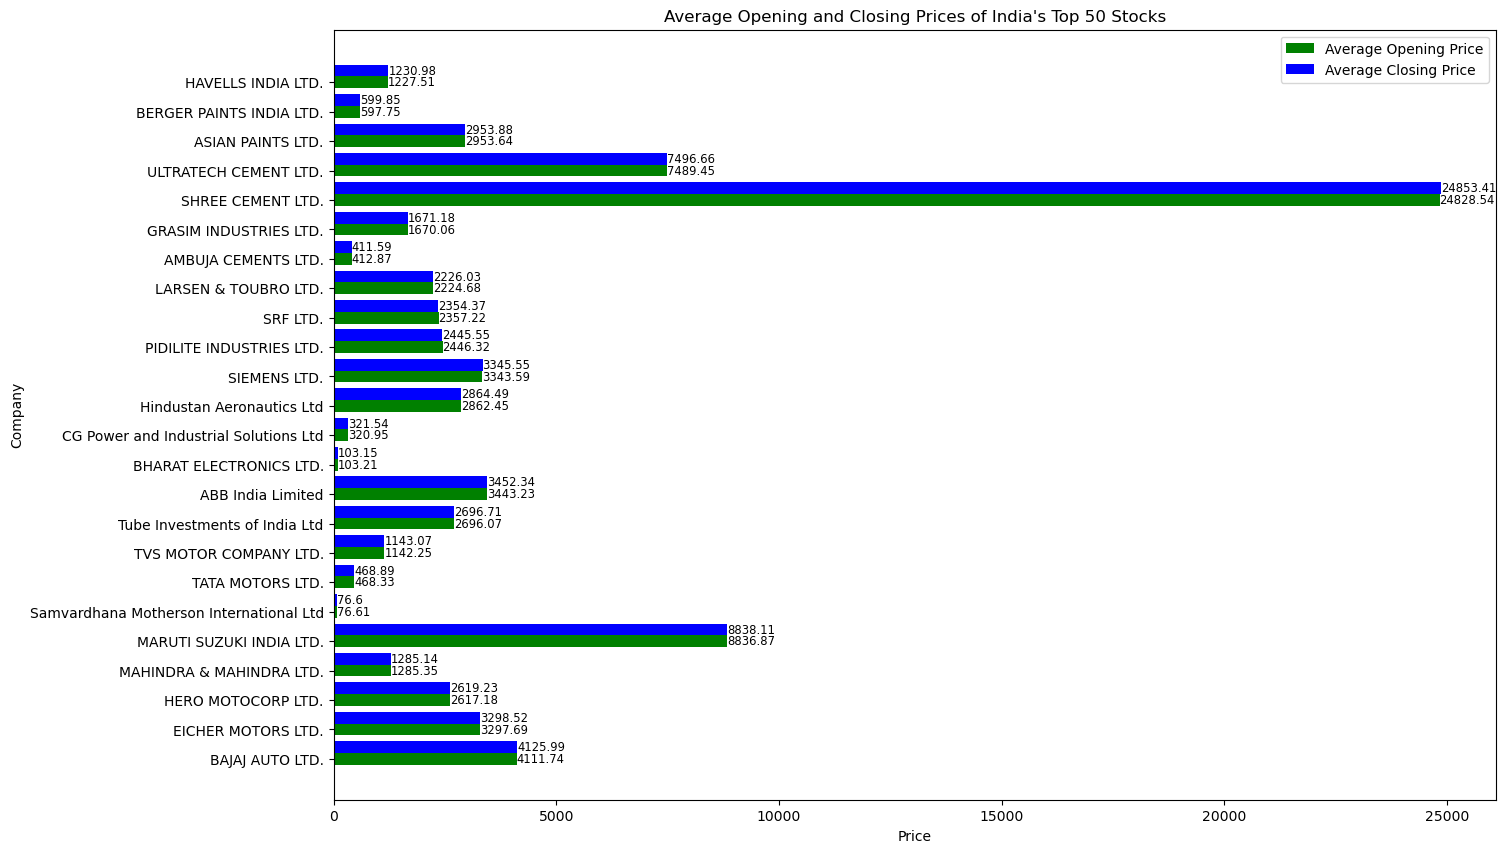

In [35]:
# Defining the company names and their average opening and closing prices for top 25 compnies 
company_names = df_avg_min_max_daily['Security_Name_x'][:24]
avg_open_prices = df_avg_min_max_daily['avg_opn_price'][:24]
avg_close_prices = df_avg_min_max_daily['avg_closing_price'][:24]


plt.figure(figsize=(15, 10))

# Set the positions for the bars
bar_positions_open = range(len(company_names))
bar_positions_close = [x + 0.4 for x in bar_positions_open]

# Plot the bars for average opening plot
plt.barh(bar_positions_open, avg_open_prices, height=0.4, color='green', label='Average Opening Price')

#  average closing prices plot 
plt.barh(bar_positions_close, avg_close_prices, height=0.4, color='blue', label='Average Closing Price')

# Set the y-axis labels
plt.yticks(bar_positions_open, company_names)

# Add bar values to the plot
for i, v in enumerate(avg_open_prices):
    plt.text(v + 0.05, i, str(v), va='center', fontsize='small')
for i, v in enumerate(avg_close_prices):
    plt.text(v + 0.05, i + 0.4, str(v), va='center', fontsize='small')

# Set the labels and title
plt.xlabel('Price')
plt.ylabel('Company')
plt.title('Average Opening and Closing Prices of India\'s Top 50 Stocks')

# Add a legend
plt.legend()
plt.grid(False)

# Show the plot
plt.show()


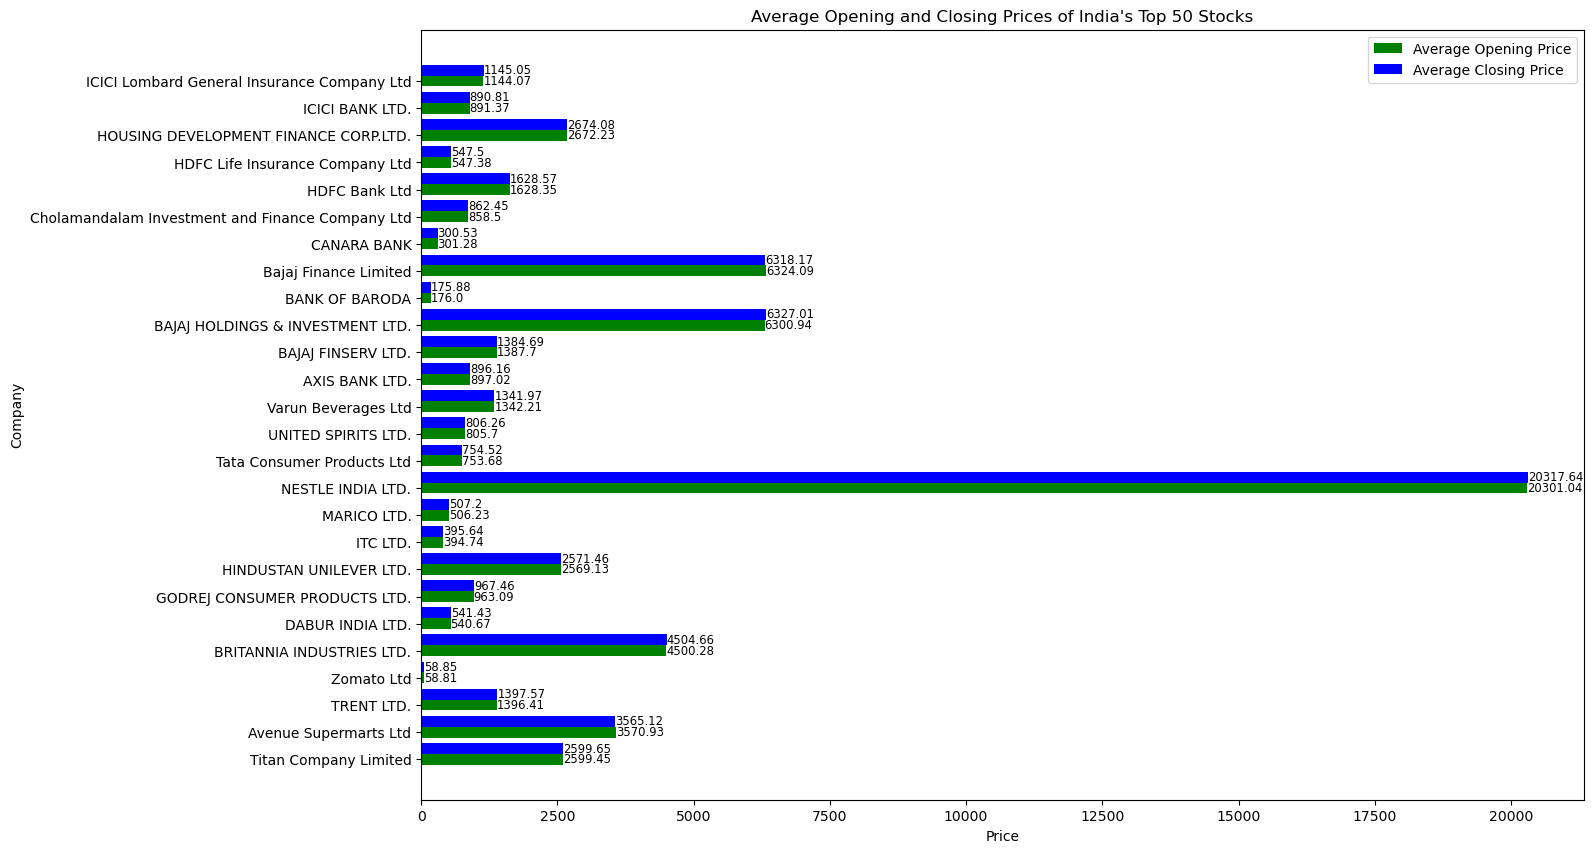

In [36]:
## Defining the company names and their average opening and closing prices for 25th to 50th rank compnies 
company_names = df_avg_min_max_daily['Security_Name_x'][24:50]
avg_open_prices = df_avg_min_max_daily['avg_opn_price'][24:50]
avg_close_prices = df_avg_min_max_daily['avg_closing_price'][24:50]

# Set the figure size
plt.figure(figsize=(15, 10))

# Set the positions for the bars
bar_positions_open = range(len(company_names))
bar_positions_close = [x + 0.4 for x in bar_positions_open]

# Plot the bars for average opening prices
plt.barh(bar_positions_open, avg_open_prices, height=0.4, color='green', label='Average Opening Price')

# Plot the bars for average closing prices
plt.barh(bar_positions_close, avg_close_prices, height=0.4, color='blue', label='Average Closing Price')

# Set the y-axis labels
plt.yticks(bar_positions_open, company_names)

# Add bar values to the plot
for i, v in enumerate(avg_open_prices):
    plt.text(v + 0.05, i, str(v), va='center', fontsize='small')
for i, v in enumerate(avg_close_prices):
    plt.text(v + 0.05, i + 0.4, str(v), va='center', fontsize='small')

# Set the labels and title
plt.xlabel('Price')
plt.ylabel('Company')
plt.title('Average Opening and Closing Prices of India\'s Top 50 Stocks')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [189]:
df_avg_min_max_daily['Avg_open_close_spread']=df_avg_min_max_daily['avg_closing_price']-df_avg_min_max_daily['avg_opn_price']
df_new_avg_min_max=df_avg_min_max_daily.sort_values(by='Avg_open_close_spread', ascending = False).reset_index(drop=True)
df_new_avg_min_max.head()

Industry_New_Name                   Security_Name_x  \
0              Financial Services  BAJAJ HOLDINGS & INVESTMENT LTD.   
1          Construction Materials                 SHREE CEMENT LTD.   
2      Fast Moving Consumer Goods                 NESTLE INDIA LTD.   
3  Automobile and Auto Components                   BAJAJ AUTO LTD.   
4                      Healthcare  APOLLO HOSPITALS ENTERPRISE LTD.   

   Security_Code  avg_opn_price  avg_closing_price  avg_spread_open_close  \
0         500490        6300.94            6327.01                  26.06   
1         500387       24828.54           24853.41                  24.87   
2         500790       20301.04           20317.64                  16.59   
3         532977        4111.74            4125.99                  14.25   
4         508869        4503.94            4514.09                  10.16   

   avg_spread_high_low  min_price  max_price  std_dev_op  std_dev_close  \
0               166.57    5557.05     7490.0      460.67         465.37   
1               612.93   21433.25    27013.0     1018.78         999.21   
2               309.98   17888.00    23200.0     1442.05        1468.84   
3                76.44    3522.00     4828.8      407.27         407.13   
4                99.01    4078.40     5290.0      266.96         267.18   

   Avg_open_close_spread  
0                  26.07  
1                  24.87  
2                  16.60  
3                  14.25  
4                  10.15

[]

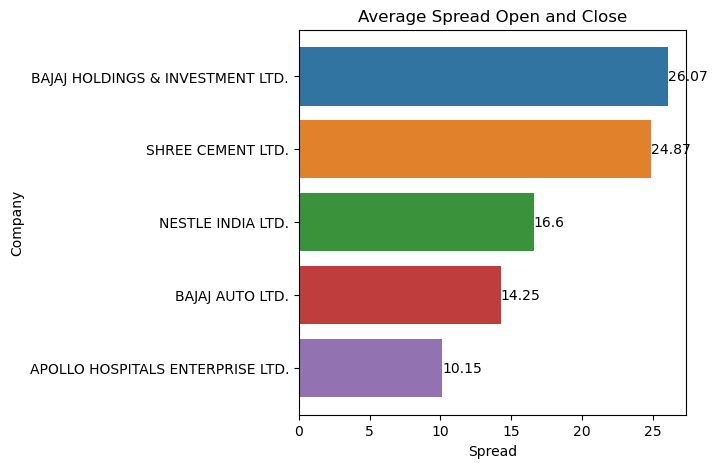

In [197]:
# Compnies with Higenst Difference beteen opening and Closing Price, This indicates Volatility
plt.figure(figsize=(5, 5))
ax=sns.barplot(y=df_new_avg_min_max['Security_Name_x'][:5],x=df_new_avg_min_max['Avg_open_close_spread'][:5])
ax.bar_label(ax.containers[0])
plt.xlabel('Spread')
plt.ylabel('Company')
plt.title('Average Spread Open and Close')
plt.plot()

[]

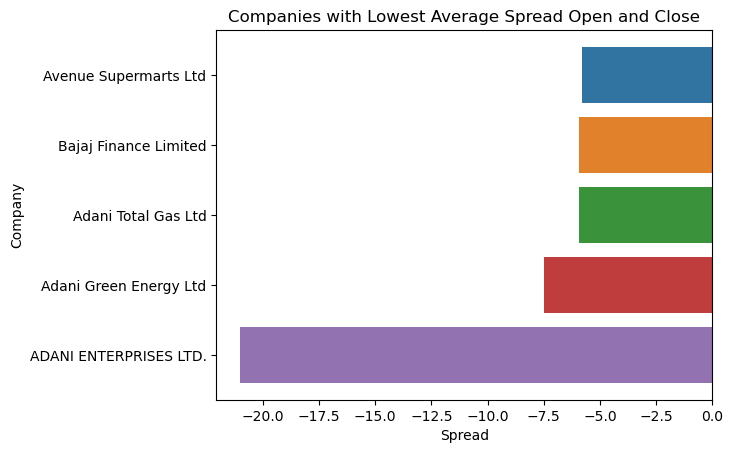

In [196]:
ax=sns.barplot(y=df_new_avg_min_max['Security_Name_x'][95:],x=df_new_avg_min_max['Avg_open_close_spread'][95:])
plt.xlabel('Spread')
plt.ylabel('Company')
plt.title('Companies with Lowest Average Spread Open and Close')
plt.plot()

[]

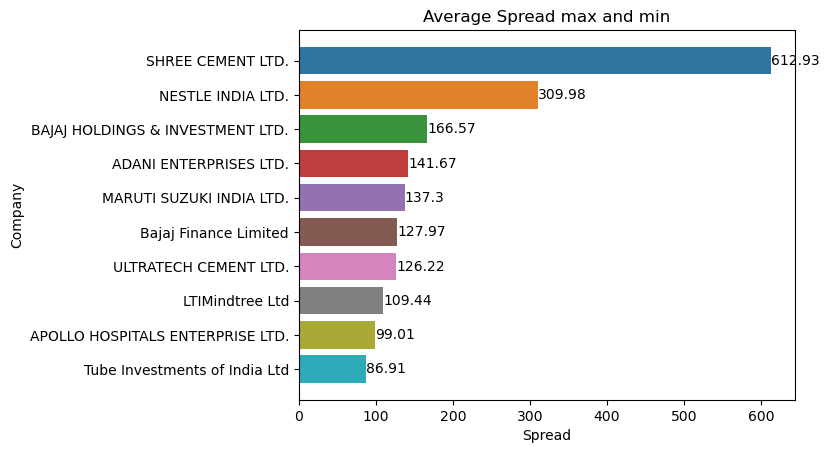

In [182]:
# Compnies with Higenst Difference beteen Max and Min Price, This indicates Volatility
df_plt=df_avg_min_max_daily.sort_values(by='avg_spread_high_low', ascending = False).reset_index(drop=True)
ax=sns.barplot(y=df_plt['Security_Name_x'][:10],x=df_plt['avg_spread_high_low'][:10])
ax.bar_label(ax.containers[0])
plt.xlabel('Spread')
plt.ylabel('Company')
plt.title('Average Spread max and min')
plt.plot()

[]

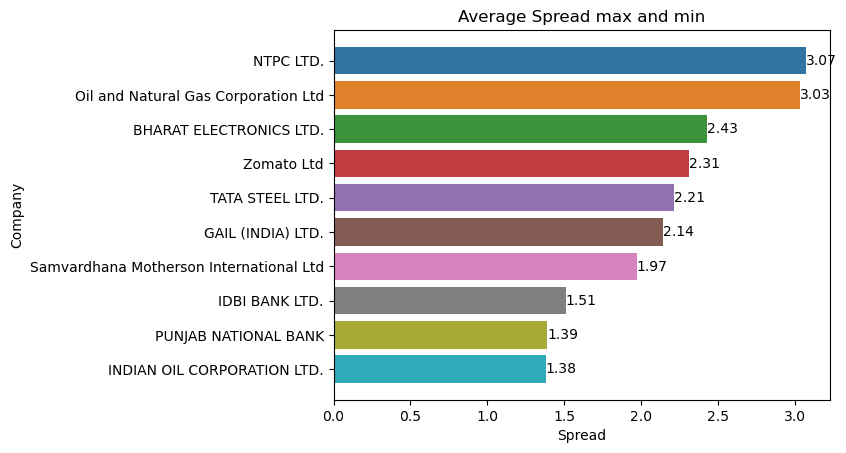

In [181]:
# Compnies with Higenst Difference beteen opening and Closing Price, This indicates Volatility
df_plt=df_avg_min_max_daily.sort_values(by='avg_spread_high_low', ascending = False).reset_index(drop=True)
ax=sns.barplot(y=df_plt['Security_Name_x'][90:],x=df_plt['avg_spread_high_low'][90:])
ax.bar_label(ax.containers[0])
plt.xlabel('Spread')
plt.ylabel('Company')
plt.title('Average Spread max and min')
plt.plot()

In [178]:
# list of compnies that has high volality 
df_plt=df_avg_min_max_daily.sort_values(by='std_dev_op',ascending=False).reset_index(drop=True)
df_plt.iloc[0:25,1:2]

Security_Name_x
0                  NESTLE INDIA LTD.
1                Adani Total Gas Ltd
2                  SHREE CEMENT LTD.
3             ADANI ENTERPRISES LTD.
4             Adani Transmission Ltd
5              Bajaj Finance Limited
6                  ABB India Limited
7   BAJAJ HOLDINGS & INVESTMENT LTD.
8           MARUTI SUZUKI INDIA LTD.
9             Adani Green Energy Ltd
10         Hindustan Aeronautics Ltd
11                   BAJAJ AUTO LTD.
12             ULTRATECH CEMENT LTD.
13                      SIEMENS LTD.
14          DIVI'S LABORATORIES LTD.
15  APOLLO HOSPITALS ENTERPRISE LTD.
16                   LTIMindtree Ltd
17                EICHER MOTORS LTD.
18         BRITANNIA INDUSTRIES LTD.
19      DR.REDDY'S LABORATORIES LTD.
20               Varun Beverages Ltd
21           InterGlobe Aviation Ltd
22             Titan Company Limited
23             Avenue Supermarts Ltd
24                 ASIAN PAINTS LTD.

Text(0.5, 1.0, 'Compnies with high Volatility')

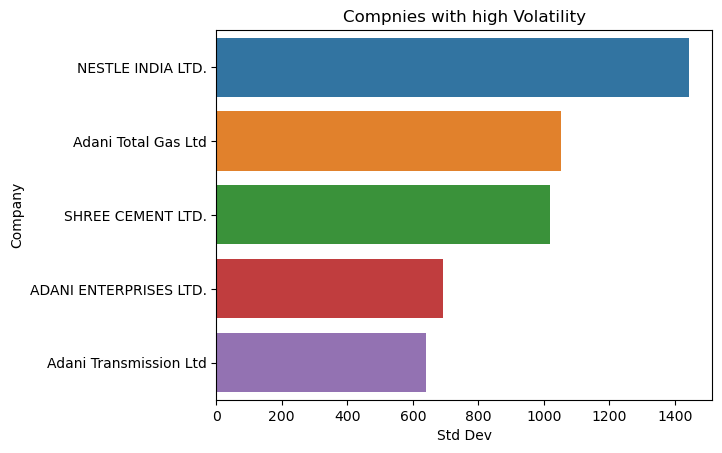

In [198]:
#  Compnies with high Volatility
sns.barplot(y=df_plt['Security_Name_x'][:5],x=df_plt['std_dev_op'][:5])
plt.ylabel('Company')
plt.xlabel('Std Dev')
plt.title("Compnies with high Volatility")

In [185]:
# list of compnies that has lowest volality 
df_plt=df_avg_min_max_daily.sort_values(by='std_dev_op',ascending=False).reset_index(drop=True)
df_plt.iloc[75:,:1]

Industry_New_Name
75                      Healthcare
76                 Metals & Mining
77              Financial Services
78                 Metals & Mining
79      Fast Moving Consumer Goods
80                 Metals & Mining
81      Fast Moving Consumer Goods
82     Oil, Gas & Consumable Fuels
83              Financial Services
84                 Metals & Mining
85          Information Technology
86                           Power
87              Financial Services
88                   Capital Goods
89     Oil, Gas & Consumable Fuels
90               Consumer Services
91                           Power
92     Oil, Gas & Consumable Fuels
93                           Power
94  Automobile and Auto Components
95                 Metals & Mining
96     Oil, Gas & Consumable Fuels
97     Oil, Gas & Consumable Fuels
98              Financial Services
99              Financial Services

Text(0.5, 1.0, 'Compnies with lowest Volatility')

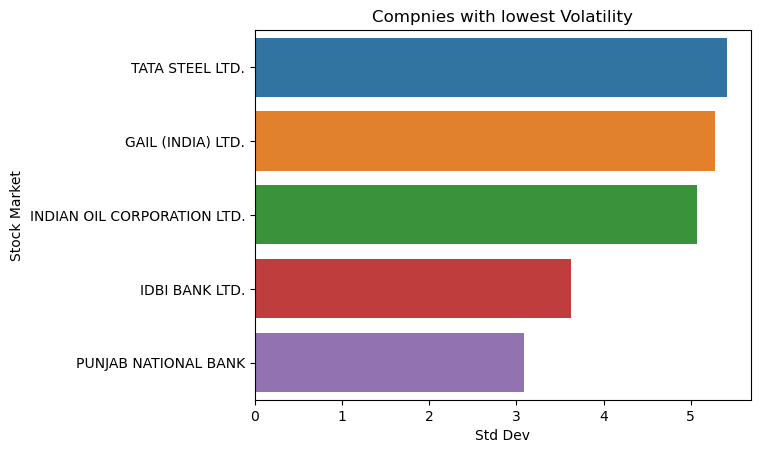

In [187]:
sns.barplot(y=df_plt['Security_Name_x'][95:],x=df_plt['std_dev_op'][95:])
plt.ylabel('Stock Market')
plt.xlabel('Std Dev')
plt.title("Compnies with lowest Volatility")

In [49]:
df_avg_min_max_daily.to_csv("df_avg_min_max_daily.xls",index=False)

In [50]:
df_daily=df_daily.groupby(['Security Code']).apply(lambda x: x.sort_values(by='Date')).reset_index(drop=True)

In [51]:
df_daily['Daily_Return'] = df_daily.groupby('Security Code')['Close Price'].pct_change()

In [52]:
df_daily['MA7'] = df_daily.groupby('Security Code')['Close Price'].rolling(window=7).mean().reset_index(level=0, drop=True)
df_daily['MA30'] = df_daily.groupby('Security Code')['Close Price'].rolling(window=30).mean().reset_index(level=0, drop=True)
df_daily['MA50'] = df_daily.groupby('Security Code')['Close Price'].rolling(window=50).mean().reset_index(level=0, drop=True)

In [53]:
df_daily['Volatility'] = df_daily.groupby('Security Code')['Daily_Return'].rolling(window=20).std().reset_index(level=0, drop=True)

In [54]:
df_daily["rank"] = df_daily.groupby("Security Code")["Date"].rank(method="dense")


In [55]:
df_daily.head()

Date  Open Price  High Price  Low Price  Close Price          WAP  \
0  2023-01-02     2675.20     2712.90    2662.95       2681.0  2682.597476   
1  2023-01-03     2700.00     2700.00    2673.25       2688.3  2686.430249   
2  2023-01-04     2699.75     2735.80    2693.85       2705.2  2717.304273   
3  2023-01-05     2720.00     2821.45    2720.00       2806.2  2753.827668   
4  2023-01-06     2810.00     2858.35    2809.85       2843.3  2834.300914   

   No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0          6022           1453            16154602.0                  2460   
1          4344            751            11669853.0                  2078   
2          4634            892            12591988.0                  1193   
3        326103           3854           898031464.0                311941   
4         77454           2454           219527943.0                 64685   

   ...  Security Code  year  month  week  Daily_Return  MA7  MA30  MA50  \
0  ...         500002  2023      1     1           NaN  NaN   NaN   NaN   
1  ...         500002  2023      1     1      0.002723  NaN   NaN   NaN   
2  ...         500002  2023      1     1      0.006287  NaN   NaN   NaN   
3  ...         500002  2023      1     1      0.037336  NaN   NaN   NaN   
4  ...         500002  2023      1     1      0.013221  NaN   NaN   NaN   

   Volatility  rank  
0         NaN   1.0  
1         NaN   2.0  
2         NaN   3.0  
3         NaN   4.0  
4         NaN   5.0  

[5 rows x 23 columns]

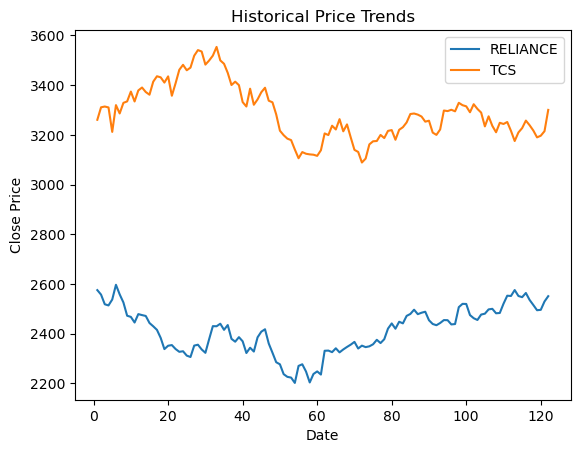

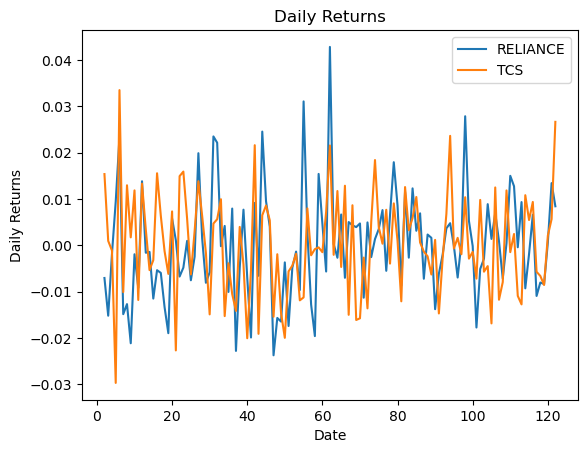

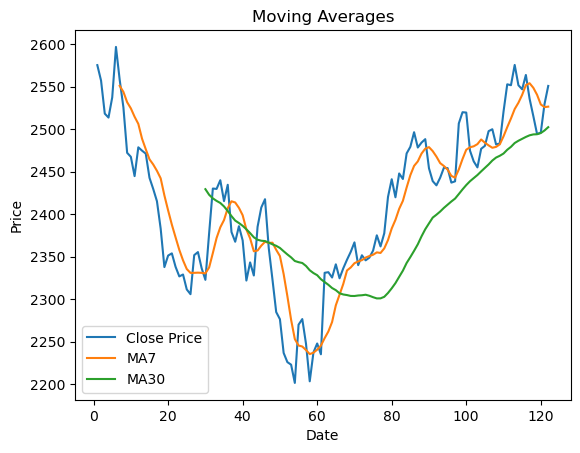

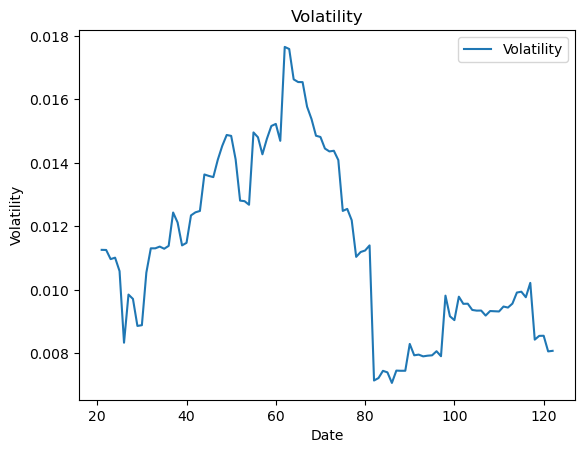

In [56]:
# Plotting historical prices
plt.plot(df_daily.loc[df_daily['Security Code'] == 500325]['rank'], df_daily.loc[df_daily['Security Code'] == 500325]['Close Price'], label='RELIANCE')
plt.plot(df_daily.loc[df_daily['Security Code'] == 532540]['rank'], df_daily.loc[df_daily['Security Code'] == 532540]['Close Price'], label='TCS')
# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Historical Price Trends')
plt.legend()
plt.show()

# Plotting daily returns
plt.plot(df_daily.loc[df_daily['Security Code'] == 500325]['rank'], df_daily.loc[df_daily['Security Code'] == 500325]['Daily_Return'], label='RELIANCE')
plt.plot(df_daily.loc[df_daily['Security Code'] == 532540]['rank'], df_daily.loc[df_daily['Security Code'] == 532540]['Daily_Return'], label='TCS')
# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns')
plt.legend()
plt.show()

# Plotting moving averages
plt.plot(df_daily.loc[df_daily['Security Code'] == 500325]['rank'], df_daily.loc[df_daily['Security Code'] == 500325]['Close Price'], label='Close Price')
plt.plot(df_daily.loc[df_daily['Security Code'] == 500325]['rank'], df_daily.loc[df_daily['Security Code'] == 500325]['MA7'], label='MA7')
plt.plot(df_daily.loc[df_daily['Security Code'] == 500325]['rank'], df_daily.loc[df_daily['Security Code'] == 500325]['MA30'], label='MA30')
# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.show()

# Plotting volatility
plt.plot(df_daily.loc[df_daily['Security Code'] == 500325]['rank'], df_daily.loc[df_daily['Security Code'] ==500325]['Volatility'], label='Volatility')
# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility')
plt.legend()
plt.show()


### Bollinger bands 
***Is a type of technical indicator that allows traders to analyze the volatility of a stock and whether the price is high or low on a relative basis***

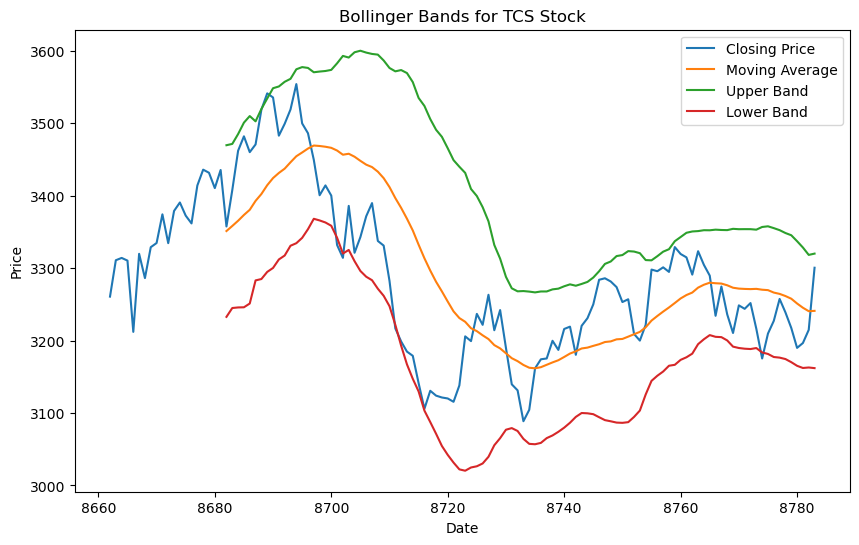

In [57]:
# Retrieve the necessary data for a specific stock (e.g., 'Security_Name_x')

stock_data = df_daily[df_daily['Security Code'] ==532540].copy()

# Define the parameters
period = 21  # Number of days for the moving average
std_dev = 2  # Standard deviation multiplier for the bands

# Calculate the moving average
stock_data.loc[:, 'Moving_Average'] = stock_data['Close Price'].rolling(window=period).mean()

# Calculate the standard deviation
stock_data.loc[:, 'Std_Dev'] = stock_data['Close Price'].rolling(window=period).std()

# Calculate the upper and lower bands
stock_data.loc[:, 'Upper_Band'] = stock_data['Moving_Average'] + (std_dev * stock_data['Std_Dev'])
stock_data.loc[:, 'Lower_Band'] = stock_data['Moving_Average'] - (std_dev * stock_data['Std_Dev'])

# Plotting the Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close Price'], label='Closing Price')
plt.plot(stock_data['Moving_Average'], label='Moving Average')
plt.plot(stock_data['Upper_Band'], label='Upper Band')
plt.plot(stock_data['Lower_Band'], label='Lower Band')
plt.title('Bollinger Bands for TCS Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

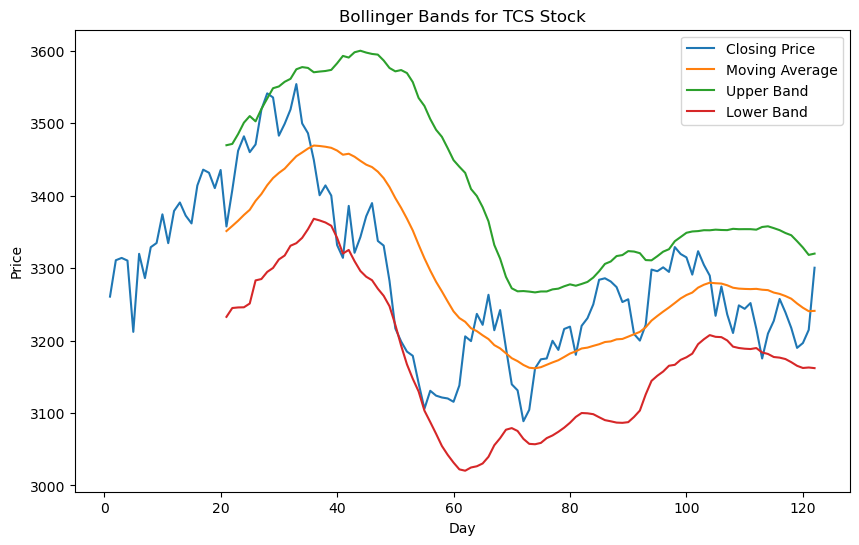

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve the necessary data for a specific stock (e.g., 'Security_Name_x')
stock_data = df_daily[df_daily['Security Code'] == 532540].copy()

# Define the parameters
period = 21  # Number of days for the moving average
std_dev = 2  # Standard deviation multiplier for the bands

# Calculate the moving average
stock_data.loc[:, 'Moving_Average'] = stock_data['Close Price'].rolling(window=period).mean()

# Calculate the standard deviation
stock_data.loc[:, 'Std_Dev'] = stock_data['Close Price'].rolling(window=period).std()

# Calculate the upper and lower bands
stock_data.loc[:, 'Upper_Band'] = stock_data['Moving_Average'] + (std_dev * stock_data['Std_Dev'])
stock_data.loc[:, 'Lower_Band'] = stock_data['Moving_Average'] - (std_dev * stock_data['Std_Dev'])

# Plotting the Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(stock_data['rank'], stock_data['Close Price'], label='Closing Price')
plt.plot(stock_data['rank'], stock_data['Moving_Average'], label='Moving Average')
plt.plot(stock_data['rank'], stock_data['Upper_Band'], label='Upper Band')
plt.plot(stock_data['rank'], stock_data['Lower_Band'], label='Lower Band')
plt.title('Bollinger Bands for TCS Stock')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


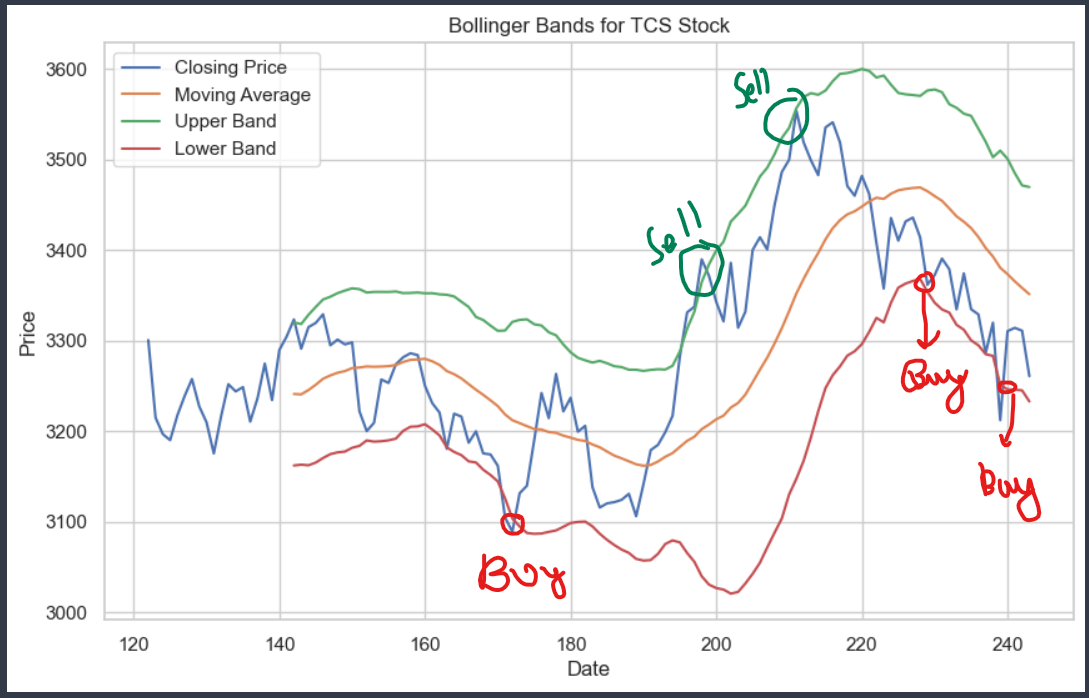

if lower_bound > Moving_Average ----> Buy 

elif upper_bound < Moving_Avergae ----> Sell 

In [63]:
# STock Code for top 10 compnies 

df_stock[['Security Code','Security Name']][:20]

Security Code                          Security Name
0          500325               RELIANCE INDUSTRIES LTD.
1          532540         TATA CONSULTANCY SERVICES LTD.
2          500180                          HDFC Bank Ltd
3          532174                        ICICI BANK LTD.
4          500696                HINDUSTAN UNILEVER LTD.
5          500875                               ITC LTD.
6          500209                           INFOSYS LTD.
7          500112                    STATE BANK OF INDIA
8          500010  HOUSING DEVELOPMENT FINANCE CORP.LTD.
9          532454                     BHARTI AIRTEL LTD.
10         500034                  Bajaj Finance Limited
11         543526    Life Insurance Corporation of India
12         500247               KOTAK MAHINDRA BANK LTD.
13         500510                   LARSEN & TOUBRO LTD.
14         500820                      ASIAN PAINTS LTD.
15         532281                  HCL TECHNOLOGIES LTD.
16         532215                         AXIS BANK LTD.
17         532500               MARUTI SUZUKI INDIA LTD.
18         500114                  Titan Company Limited
19         512599                 ADANI ENTERPRISES LTD.

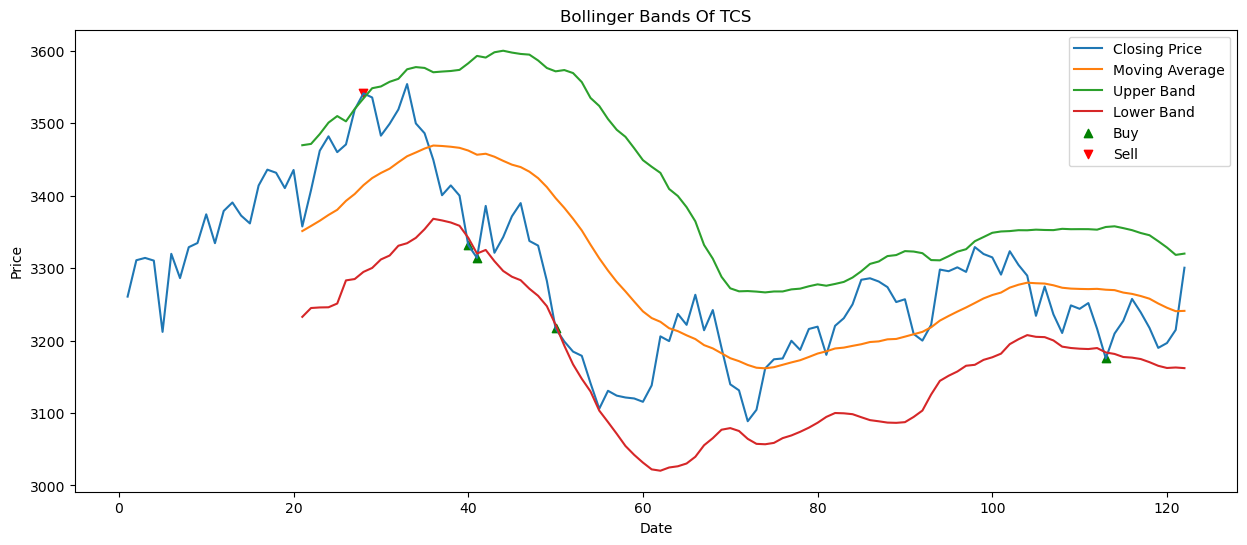

In [65]:
# Calculate Bollinger Bands
stock_data = df_daily[df_daily['Security Code'] ==532540].copy()
stock_data['Moving_Average'] = stock_data['Close Price'].rolling(window=period).mean()
stock_data['Std_Dev'] = stock_data['Close Price'].rolling(window=period).std()
stock_data['Upper_Band'] = stock_data['Moving_Average'] + (std_dev * stock_data['Std_Dev'])
stock_data['Lower_Band'] = stock_data['Moving_Average'] - (std_dev * stock_data['Std_Dev'])

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(stock_data['rank'], stock_data['Close Price'], label='Closing Price')
plt.plot(stock_data['rank'], stock_data['Moving_Average'], label='Moving Average')
plt.plot(stock_data['rank'], stock_data['Upper_Band'], label='Upper Band')
plt.plot(stock_data['rank'], stock_data['Lower_Band'], label='Lower Band')

# Add markers for buying and selling indicators
buy_signals = stock_data[stock_data['Close Price'] < stock_data['Lower_Band']]
sell_signals = stock_data[stock_data['Close Price'] > stock_data['Upper_Band']]
ax.scatter(buy_signals['rank'],buy_signals['Close Price'], marker='^', color='green', label='Buy')
ax.scatter(sell_signals['rank'],sell_signals['Close Price'], marker='v', color='red', label='Sell')

# Set the plot title, x-axis label, and y-axis label
ax.set_title('Bollinger Bands Of TCS')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Set the legend
ax.legend()

# Rotate x-axis tick labels for better visibility


# Display the plot
plt.show()


In [66]:
df_bollinger = df_daily.copy()
df_bollinger['Moving_Average'] = df_bollinger['Close Price'].rolling(window=period).mean()
df_bollinger['Std_Dev'] = df_bollinger['Close Price'].rolling(window=period).std()
df_bollinger['Upper_Band'] = df_bollinger['Moving_Average'] + (std_dev * df_bollinger['Std_Dev'])
df_bollinger['Lower_Band'] = df_bollinger['Moving_Average'] - (std_dev * df_bollinger['Std_Dev'])

In [67]:
def enc(x):
    if x['Upper_Band']<x['Close Price']:
        return "SELL"
    elif x['Lower_Band']>x['Close Price']:
        return "BUY"
    else:
        return "No Indicator"
    
df_bollinger['indicator']=df_bollinger[['Upper_Band','Lower_Band','Close Price']].apply(enc,axis = 1)

In [70]:
df_bollinger[(df_bollinger['indicator']=='SELL')&(df_daily['Security Code'] ==532540)].head(5)

Date  Open Price  High Price  Low Price  Close Price         WAP  \
8689  2023-02-09      3518.7     3547.95     3504.0      3541.15  3532.24248   

      No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
8689         32844           4072           116012972.0                 12822   

      ...          MA7  MA30  MA50  Volatility  rank  Moving_Average  \
8689  ...  3477.421429   NaN   NaN    0.010252  28.0     3414.385714   

        Std_Dev  Upper_Band   Lower_Band  indicator  
8689  59.824868  3534.03545  3294.735979       SELL  

[1 rows x 28 columns]

<details>
  <summary>Fibonacci Retracement Definition</summary>

  Fibonacci Retracement is a popular technical analysis tool used to identify potential levels of support and resistance in financial markets. It is based on the Fibonacci sequence, a mathematical sequence where each number is the sum of the two preceding ones: 0, 1, 1, 2, 3, 5, 8, 13, 21, and so on.

  In Fibonacci Retracement, these numbers are used as percentages to identify potential retracement levels in a price trend. The main levels used are:

  - 23.6% (0.236)
  - 38.2% (0.382)
  - 50% (0.5)
  - 61.8% (0.618)

  These levels are derived from dividing a number in the Fibonacci sequence by the number that follows it. For example, 8 divided by 13 is approximately 0.615 (or 61.5%), which is rounded to 61.8% in Fibonacci Retracement.

  The basic idea behind Fibonacci Retracement is that after a significant price movement (either up or down), the price often retraces or pulls back before continuing in the original direction. Traders and analysts use Fibonacci levels to identify potential support or resistance areas where price reversals or trend continuation might occur.

  In practice, Fibonacci Retracement is applied by selecting two extreme points on a price chart, typically a swing high and a swing low. The retracement levels are then drawn as horizontal lines based on the Fibonacci percentages, extending from the low to the high (or vice versa) of the price movement.

  Traders look for confluences of Fibonacci levels with other technical analysis tools, such as trendlines, moving averages, or chart patterns, to make more informed trading decisions. The Fibonacci levels can help identify potential entry points, exit points, stop-loss levels, or profit targets.

  It's important to note that Fibonacci Retracement is not a foolproof indicator, and its effectiveness can vary in different market conditions. Therefore, it's often used in conjunction with other analysis techniques and risk management strategies to enhance trading decisions.

</details>


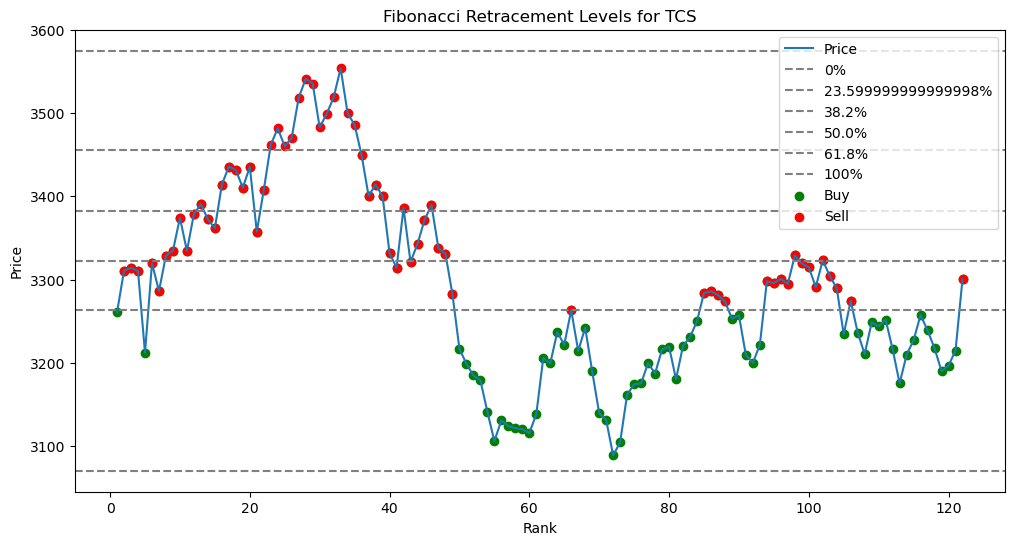

In [72]:
plt.figure(figsize=(12, 6))
df_company = df_daily[df_daily['Security Code'] == 532540]

recent_high = df_company['High Price'].max()
recent_low = df_company['Low Price'].min()
price_range = recent_high - recent_low

fibonacci_levels = [0, 0.236, 0.382, 0.5, 0.618, 1]
fibonacci_values = [recent_high - (fib * price_range) for fib in fibonacci_levels]

# Plot the Fibonacci levels for the current company
plt.plot(df_company['rank'], df_company['Close Price'], label='Price')  # Use 'rank' as x-axis
for level, value in zip(fibonacci_levels, fibonacci_values):
    plt.axhline(value, linestyle='--', color='gray', label=f'{level * 100}%')

# Add buy and sell indicators
buy_indicator = df_company['Close Price'] < fibonacci_values[1]  # Example condition for a buy indicator
sell_indicator = df_company['Close Price'] > fibonacci_values[4]  # Example condition for a sell indicator
plt.scatter(df_company['rank'][buy_indicator], df_company['Close Price'][buy_indicator], color='green', label='Buy')  # Use 'rank' as x-axis
plt.scatter(df_company['rank'][sell_indicator], df_company['Close Price'][sell_indicator], color='red', label='Sell')  # Use 'rank' as x-axis

# Set the title and labels for the current company's plot
security_name = "TCS"
plt.title(f'Fibonacci Retracement Levels for {security_name}')
plt.xlabel('Rank')  # Update x-axis label to 'Rank'
plt.ylabel('Price')
plt.legend()
plt.show()


####  Stock Open and Clsoe (net gain over last 6 month) Analysis 

In [74]:
query="Select * FROM `stocks-392220.stocks_top_hun.sector` as s  LIMIT 10"
runner(query)

Security_Code                             Security_Name_x  Close__  \
0         532155                           GAIL (INDIA) LTD.   110.85   
1         542066                         Adani Total Gas Ltd   648.60   
2         500312         Oil and Natural Gas Corporation Ltd   165.40   
3         533278                             COAL INDIA LTD.   234.55   
4         500325                    RELIANCE INDUSTRIES LTD.  2638.35   
5         530965                 INDIAN OIL CORPORATION LTD.    98.60   
6         500547           BHARAT PETROLEUM CORPORATION LTD.   393.10   
7         539448                     InterGlobe Aviation Ltd  2698.15   
8         532921  ADANI PORTS AND SPECIAL ECONOMIC ZONE LTD.   740.05   
9         532555                                   NTPC LTD.   196.55   

   Market_Capitalization__Cr__                                Issuer_Name  \
0                     72884.98                          Gail (India) Ltd.   
1                     71333.68                    ADANI TOTAL GAS LIMITED   
2                    208077.82        Oil And Natural Gas Corporation Ltd   
3                    144546.79                         Coal India Limited   
4                   1785005.19                    Reliance Industries Ltd   
5                    139235.41                Indian Oil Corporation Ltd.   
6                     85273.33              Bharat Petroleum Corpn. Ltd.,   
7                    104026.39                InterGlobe Aviation Limited   
8                    159861.08  Adani Ports and Special Economic Zone Ltd   
9                    190587.97                               NTPC Limited   

  Security_Id                             Security_Name_y  Status Group  \
0        GAIL                           GAIL (INDIA) LTD.  Active    A    
1        ATGL                         Adani Total Gas Ltd  Active    A    
2        ONGC         Oil and Natural Gas Corporation Ltd  Active    A    
3   COALINDIA                             COAL INDIA LTD.  Active    A    
4    RELIANCE                    RELIANCE INDUSTRIES LTD.  Active    A    
5         IOC                 INDIAN OIL CORPORATION LTD.  Active    A    
6        BPCL           BHARAT PETROLEUM CORPORATION LTD.  Active    A    
7      INDIGO                     InterGlobe Aviation Ltd  Active    A    
8  ADANIPORTS  ADANI PORTS AND SPECIAL ECONOMIC ZONE LTD.  Active    A    
9        NTPC                                   NTPC LTD.  Active    A    

   Face_Value       ISIN_No                      Industry Instrument  \
0        10.0  INE129A01019    Gas Transmission/Marketing     Equity   
1         1.0  INE399L01023      LPG/CNG/PNG/LNG Supplier     Equity   
2         5.0  INE213A01029  Oil Exploration & Production     Equity   
3        10.0  INE522F01014                          Coal     Equity   
4        10.0  INE002A01018        Refineries & Marketing     Equity   
5        10.0  INE242A01010        Refineries & Marketing     Equity   
6        10.0  INE029A01011        Refineries & Marketing     Equity   
7        10.0  INE646L01027                       Airline     Equity   
8         2.0  INE742F01042          Port & Port services     Equity   
9        10.0  INE733E01010              Power Generation     Equity   

  Sector_Name            Industry_New_Name               Igroup_Name  \
0      Energy  Oil, Gas & Consumable Fuels                       Gas   
1      Energy  Oil, Gas & Consumable Fuels                       Gas   
2      Energy  Oil, Gas & Consumable Fuels                       Oil   
3      Energy  Oil, Gas & Consumable Fuels          Consumable Fuels   
4      Energy  Oil, Gas & Consumable Fuels        Petroleum Products   
5      Energy  Oil, Gas & Consumable Fuels        Petroleum Products   
6      Energy  Oil, Gas & Consumable Fuels        Petroleum Products   
7    Services                     Services        Transport Services   
8    Services                     Services  Transport Infrastructure   
9   Utilitie

In [78]:
query='''
with cte as (
SELECT s.Security_Name_x as Security_Name , s.Industry_New_Name,s.Security_Code,d.Open_Price, d.Close_Price,d.Date,
RANK() OVER( PARTITION BY s.Security_Name_x ORDER BY d.DATE ) as open_rank,
RANK() OVER( PARTITION BY s.Security_Name_x ORDER BY d.DATE DESC) as close_rank,
AVG(d.Close_Price) OVER( PARTITION BY s.Security_Name_x) as avg_price 
FROM `stocks-392220.stocks_top_hun.sector` as s 
Inner Join  `stocks-392220.stocks_top_hun.daily` as d 
ON s.Security_Code=d.Security_Code) 
, cte_close_price as (
SELECT cte.Security_Name, cte.Industry_New_Name,cte.Security_Code, cte.Close_Price, cte.Date as close_date
FROM cte where cte.close_rank=1)
, cte_open_price as (
SELECT cte.Security_Name, cte.Security_Code, cte.Open_Price, cte.avg_price ,cte.Date as open_date
FROM cte where cte.open_rank=1)
SELECT cte_close_price.Security_Name,cte_close_price.Industry_New_Name,cte_close_price.Security_Code,  cte_close_price.Close_Price , cte_open_price.Open_Price,cte_open_price.avg_price,
cte_open_price.open_date,
cte_close_price.close_date
FROM cte_open_price INNER JOIN cte_close_price ON cte_open_price.Security_Code=cte_close_price.Security_Code
'''
df_stock_performance = runner(query)

In [80]:
df_stock_performance.head()

Security_Name            Industry_New_Name  \
0  CG Power and Industrial Solutions Ltd                Capital Goods   
1                      GAIL (INDIA) LTD.  Oil, Gas & Consumable Fuels   
2   POWER GRID CORPORATION OF INDIA LTD.                        Power   
3                    STATE BANK OF INDIA           Financial Services   
4                     BHARTI AIRTEL LTD.            Telecommunication   

   Security_Code  Close_Price  Open_Price   avg_price   open_date  close_date  
0         500093       378.40      265.60  321.535656  2023-01-02  2023-06-30  
1         532155       105.00       96.40  103.755738  2023-01-02  2023-06-30  
2         532898       255.10      214.05  228.589344  2023-01-02  2023-06-30  
3         500112       572.80      615.00  559.626230  2023-01-02  2023-06-30  
4         532454       878.15      807.00  788.501230  2023-01-02  2023-06-30

In [81]:
df_stock_performance['total_change']=df_stock_performance['Close_Price']-df_stock_performance['Open_Price']

In [82]:
df_stock_performance['pct_caange']=round(df_stock_performance['total_change']*100/df_stock_performance['Open_Price'],2)

In [83]:
df_stock_performance.head()

Security_Name            Industry_New_Name  \
0  CG Power and Industrial Solutions Ltd                Capital Goods   
1                      GAIL (INDIA) LTD.  Oil, Gas & Consumable Fuels   
2   POWER GRID CORPORATION OF INDIA LTD.                        Power   
3                    STATE BANK OF INDIA           Financial Services   
4                     BHARTI AIRTEL LTD.            Telecommunication   

   Security_Code  Close_Price  Open_Price   avg_price   open_date  close_date  \
0         500093       378.40      265.60  321.535656  2023-01-02  2023-06-30   
1         532155       105.00       96.40  103.755738  2023-01-02  2023-06-30   
2         532898       255.10      214.05  228.589344  2023-01-02  2023-06-30   
3         500112       572.80      615.00  559.626230  2023-01-02  2023-06-30   
4         532454       878.15      807.00  788.501230  2023-01-02  2023-06-30   

   total_change  pct_caange  
0        112.80       42.47  
1          8.60        8.92  
2         41.05       19.18  
3        -42.20       -6.86  
4         71.15        8.82

In [84]:
# list of compnies that showed great depreciation over last 6 months 
df_stock_performance.sort_values(by='pct_caange')[:10]

Security_Name            Industry_New_Name  Security_Code  \
84       Adani Total Gas Ltd  Oil, Gas & Consumable Fuels         542066   
24    Adani Transmission Ltd                        Power         539254   
25    Adani Green Energy Ltd                        Power         541450   
97       Varun Beverages Ltd   Fast Moving Consumer Goods         540180   
89    ADANI ENTERPRISES LTD.              Metals & Mining         512599   
96  Macrotech Developers Ltd                       Realty         543287   
44       AMBUJA CEMENTS LTD.       Construction Materials         500425   
6           ADANI POWER LTD.                        Power         533096   
10              INFOSYS LTD.       Information Technology         500209   
75  HINDALCO INDUSTRIES LTD.              Metals & Mining         500440   

    Close_Price  Open_Price    avg_price   open_date  close_date  \
84       653.90     3695.25  1335.229098  2023-01-02  2023-06-30   
24       767.50     2610.00  1206.830738  2023-01-02  2023-06-30   
25       945.60     1932.10  1027.606557  2023-01-02  2023-06-30   
97       800.50     1345.70  1341.967623  2023-01-02  2023-06-30   
89      2383.60     3874.70  2245.239344  2023-01-02  2023-06-30   
96       677.95     1089.95   894.822131  2023-01-02  2023-06-30   
44       425.85      525.70   411.589754  2023-01-02  2023-06-30   
6        249.95      300.60   223.481148  2023-01-02  2023-06-30   
10      1335.20     1513.00  1400.280738  2023-01-02  2023-06-30   
75       420.90      475.00   429.947131  2023-01-02  2023-06-30   

    total_change  pct_caange  
84      -3041.35      -82.30  
24      -1842.50      -70.59  
25       -986.50      -51.06  
97       -545.20      -40.51  
89      -1491.10      -38.48  
96       -412.00      -37.80  
44        -99.85      -18.99  
6         -50.65      -16.85  
10       -177.80      -11.75  
75        -54.10      -11.39

In [85]:
df_stock_performance.sort_values(by='pct_caange',ascending=False)[:10]

Security_Name  \
16                                 ABB India Limited   
98  Cholamandalam Investment and Finance Company Ltd   
78                                  TATA MOTORS LTD.   
92                         Hindustan Aeronautics Ltd   
0              CG Power and Industrial Solutions Ltd   
36                            Zydus Lifesciences Ltd   
62                                          ITC LTD.   
7                       Max Healthcare Institute Ltd   
90                                      SIEMENS LTD.   
54                                Mankind Pharma Ltd   

                 Industry_New_Name  Security_Code  Close_Price  Open_Price  \
16                   Capital Goods         500002      4421.25     2675.20   
98              Financial Services         511243      1141.75      723.05   
78  Automobile and Auto Components         500570       595.50      392.00   
92                   Capital Goods         541154      3790.95     2548.90   
0                    Capital Goods         500093       378.40      265.60   
36                      Healthcare         532321       582.75      416.70   
62      Fast Moving Consumer Goods         500875       451.65      331.50   
7                       Healthcare         543220       599.25      440.30   
90                   Capital Goods         500550      3766.20     2861.45   
54                      Healthcare         543904      1706.30     1300.00   

      avg_price   open_date  close_date  total_change  pct_caange  
16  3452.336066  2023-01-02  2023-06-30       1746.05       65.27  
98   862.451639  2023-01-02  2023-06-30        418.70       57.91  
78   468.893443  2023-01-02  2023-06-30        203.50       51.91  
92  2864.486885  2023-01-02  2023-06-30       1242.05       48.73  
0    321.535656  2023-01-02  2023-06-30        112.80       42.47  
36   489.408607  2023-01-02  2023-06-30        166.05       39.85  
62   395.640984  2023-01-02  2023-06-30        120.15       36.24  
7    480.474590  2023-01-02  2023-06-30        158.95       36.10  
90  3345.554098  2023-01-02  2023-06-30        904.75       31.62  
54  1486.173684  2023-05-09  2023-06-30        406.30       31.25

In [87]:
df2=df_daily.copy()

ADANI ENTERPRISES LTD.
Varun Beverages Ltd
Adani Green Energy Ltd
Adani Transmission Ltd
Adani Total Gas Ltd


Text(0.5, 0, 'day')

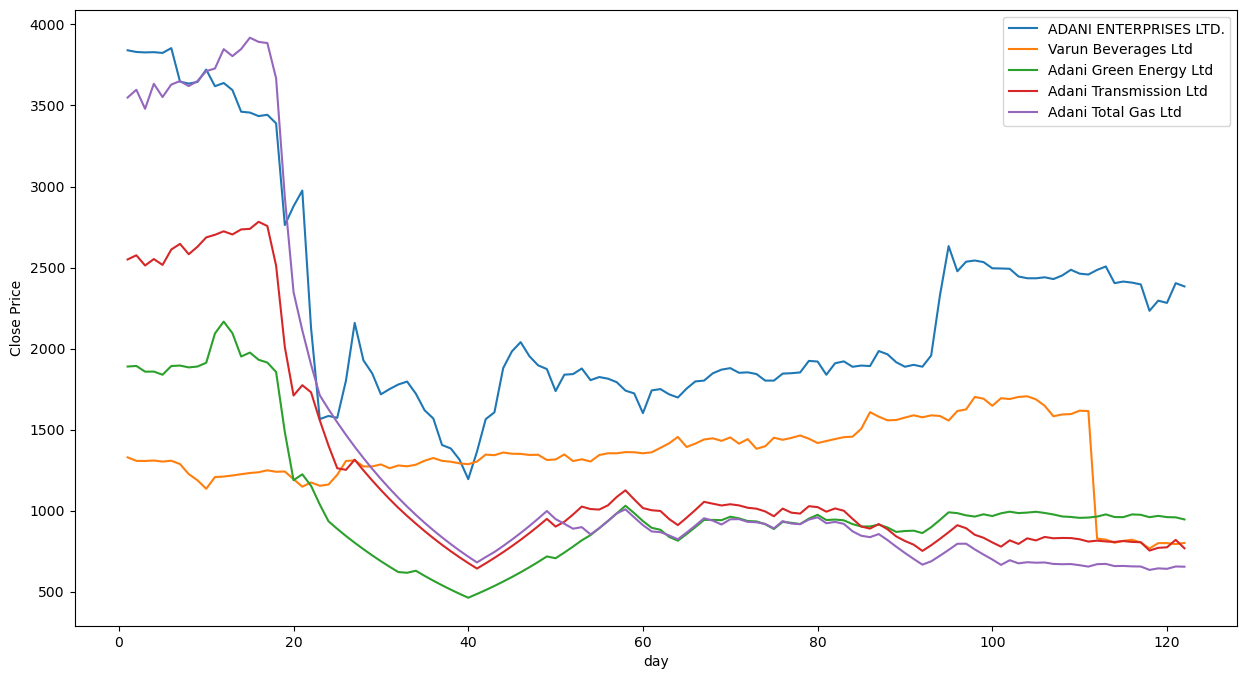

In [88]:
#5 underperforming companies
plt.figure(figsize=(15,8))
underperformers=df_stock_performance.sort_values(by='pct_caange',ascending=False)[95:]
underperformers['Security_Code'].unique()
for i in underperformers['Security_Code'].unique():
    security_name=df_stock[df_stock['Security Code']==i]['Security Name'].values[0]
    print(security_name)
    sns.lineplot(x=df2[df2['Security Code']==i]['rank'],y=df2[df2['Security Code']==i]['Close Price'],label=security_name)
plt.xlabel('day')

Adani Total Gas Ltd
Adani Transmission Ltd
Adani Green Energy Ltd
Varun Beverages Ltd
ADANI ENTERPRISES LTD.
Macrotech Developers Ltd


<Figure size 1200x800 with 0 Axes>

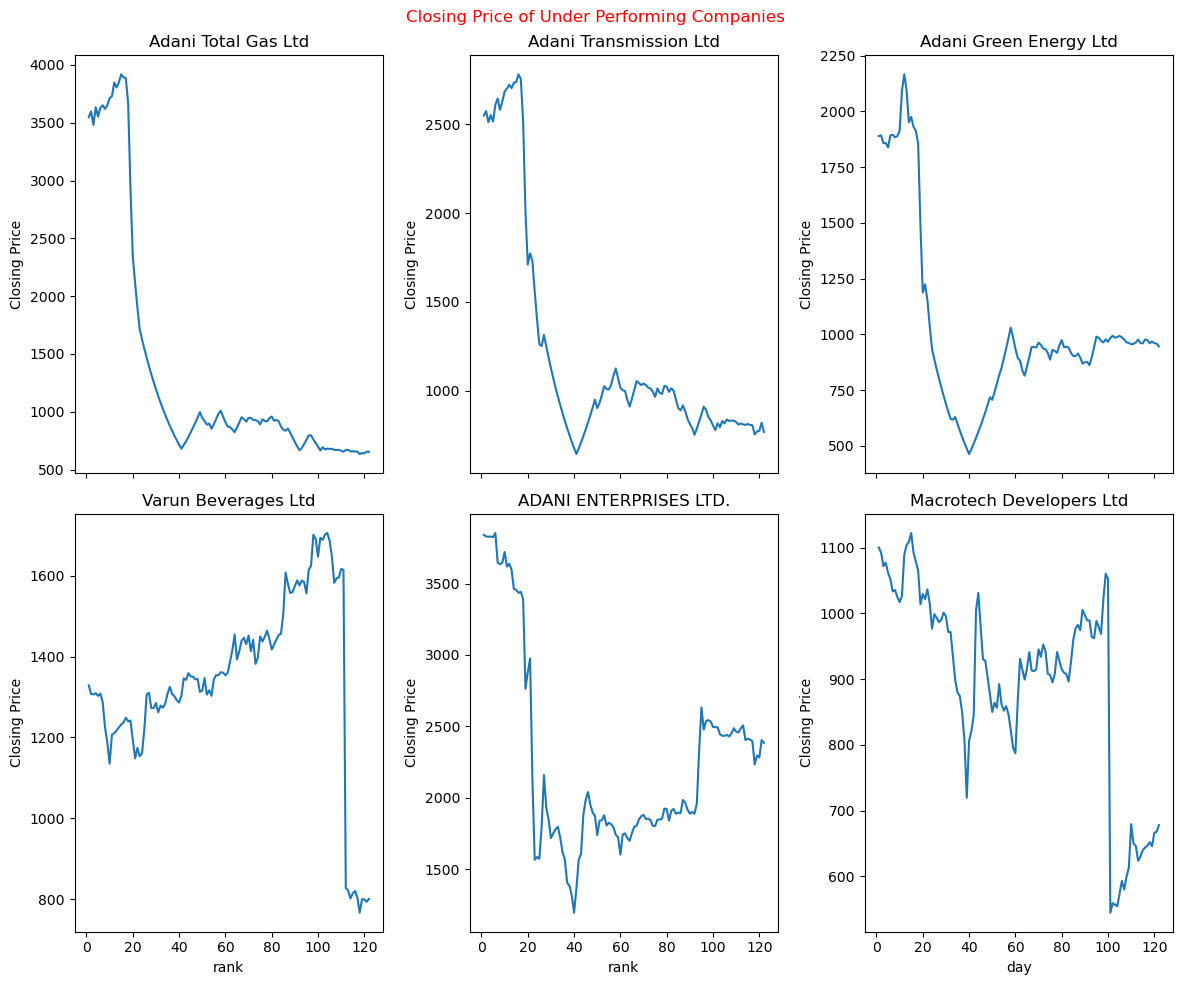

In [201]:
plt.figure(figsize=(12, 8))

underperformers = df_stock_performance.sort_values(by='pct_caange')[:6]
security_codes = underperformers['Security_Code'].unique()

# Creating subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10), sharex=True)

# Reshape axes to flatten the 2D array
axes = axes.flatten()

for i, security_code in enumerate(security_codes):
    security_name = df_stock[df_stock['Security Code'] == security_code]['Security Name'].values[0]
    print(security_name)

    # Plotting on the respective subplot
    sns.lineplot(ax=axes[i], x=df2[df2['Security Code'] == security_code]['rank'],
                 y=df2[df2['Security Code'] == security_code]['Close Price'])
    axes[i].set_ylabel('Closing Price')
    axes[i].set_title(security_name)

# Removing unused subplots if there are less than 4 security codes
if len(security_codes) < 4:
    for j in range(len(security_codes), 4):
        fig.delaxes(axes[j])


plt.xlabel('day')
plt.suptitle('Closing Price of Under Performing Companies',color='r')
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

Adani Total Gas Ltd
Adani Transmission Ltd
Adani Green Energy Ltd
Varun Beverages Ltd
ADANI ENTERPRISES LTD.
Macrotech Developers Ltd


<Figure size 1500x1000 with 0 Axes>

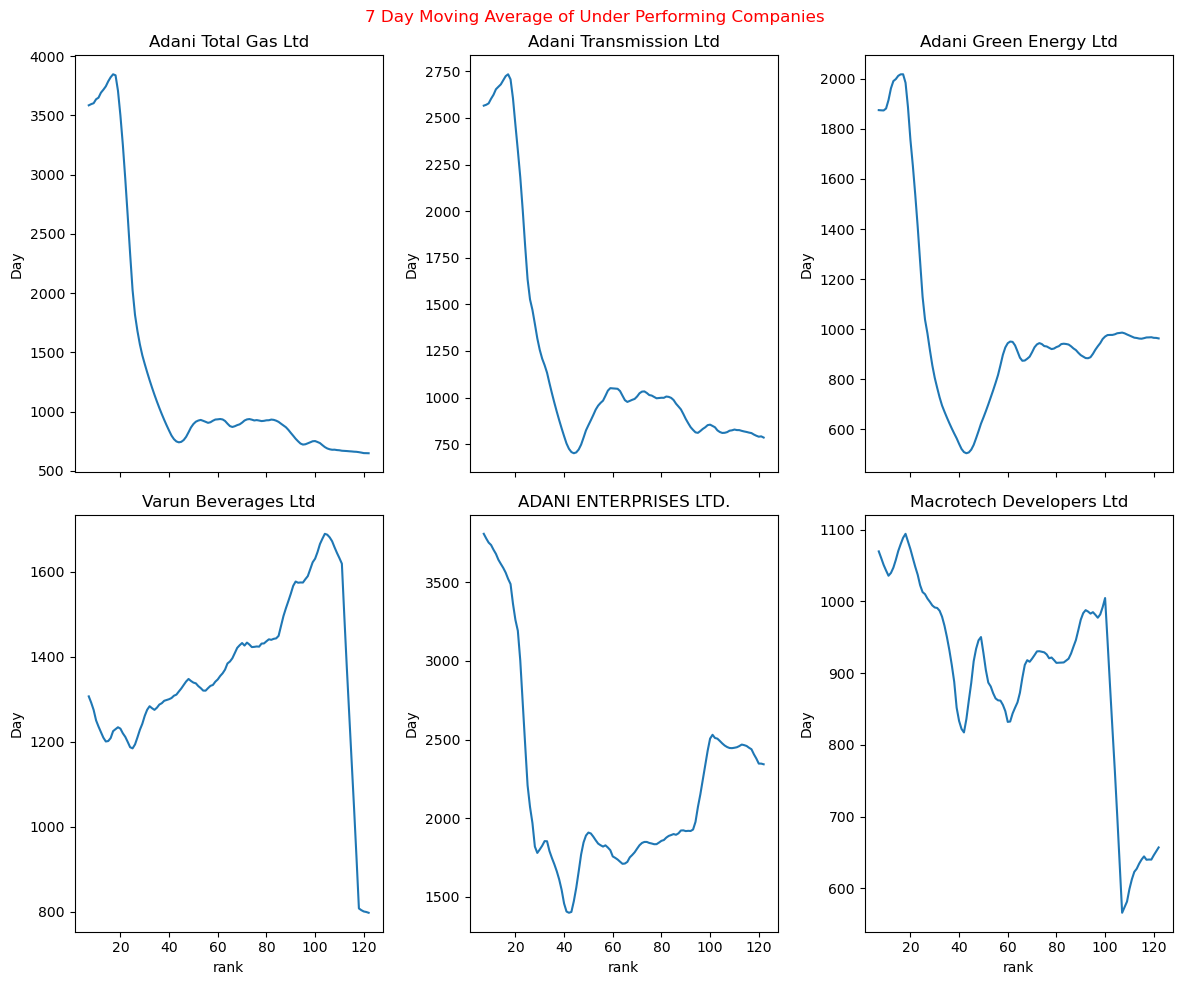

In [90]:
plt.figure(figsize=(15, 10))

underperformers = df_stock_performance.sort_values(by='pct_caange')[:6]
security_codes = underperformers['Security_Code'].unique()

# Creating subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10), sharex=True)

# Reshape axes to flatten the 2D array
axes = axes.flatten()

for i, security_code in enumerate(security_codes):
    security_name = df_stock[df_stock['Security Code'] == security_code]['Security Name'].values[0]
    print(security_name)

    # Plotting on the respective subplot
    sns.lineplot(ax=axes[i], x=df2[df2['Security Code'] == security_code]['rank'],
                 y=df2[df2['Security Code'] == security_code]['MA7'])
    axes[i].set_ylabel('Volatility')
    axes[i].set_ylabel('Day')
    axes[i].set_title(security_name)

# Removing unused subplots if there are less than 4 security codes
if len(security_codes) < 4:
    for j in range(len(security_codes), 4):
        fig.delaxes(axes[j])


plt.suptitle('7 Day Moving Average of Under Performing Companies',color='r')
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

Adani Total Gas Ltd
Adani Transmission Ltd
Adani Green Energy Ltd
Varun Beverages Ltd
ADANI ENTERPRISES LTD.
Macrotech Developers Ltd


<Figure size 1500x1000 with 0 Axes>

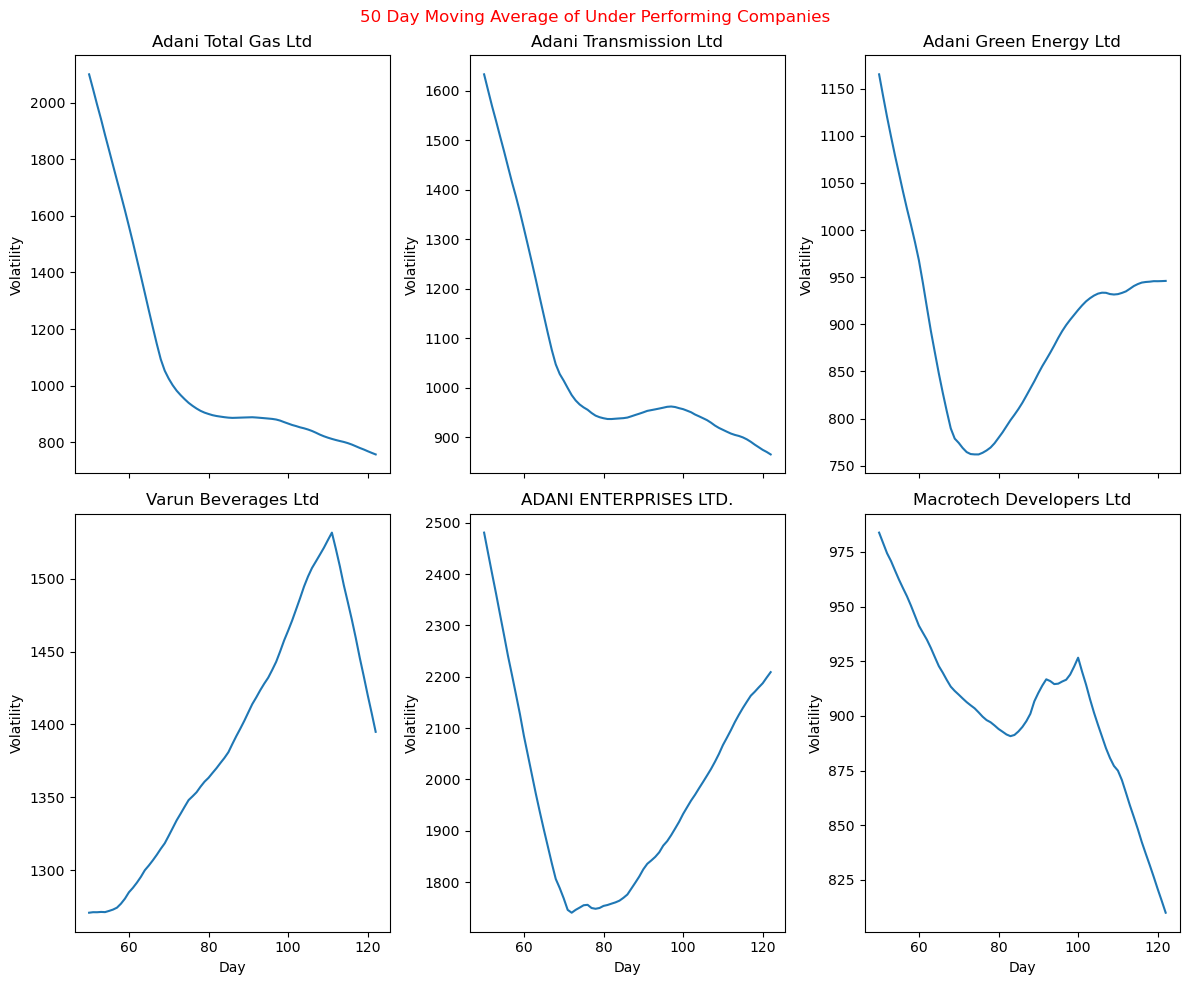

In [91]:
plt.figure(figsize=(15, 10))

underperformers = df_stock_performance.sort_values(by='pct_caange')[:6]
security_codes = underperformers['Security_Code'].unique()

# Creating subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10), sharex=True)

# Reshape axes to flatten the 2D array
axes = axes.flatten()

for i, security_code in enumerate(security_codes):
    security_name = df_stock[df_stock['Security Code'] == security_code]['Security Name'].values[0]
    print(security_name)

    # Plotting on the respective subplot
    sns.lineplot(ax=axes[i], x=df2[df2['Security Code'] == security_code]['rank'],
                 y=df2[df2['Security Code'] == security_code]['MA50'])
    axes[i].set_ylabel('Volatility')
    axes[i].set_xlabel('Day')
    axes[i].set_title(security_name)

# Removing unused subplots if there are less than 4 security codes
if len(security_codes) < 4:
    for j in range(len(security_codes), 4):
        fig.delaxes(axes[j])



plt.suptitle('50 Day Moving Average of Under Performing Companies',color='r')
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

## Analysis of top performing Compnies 

ABB India Limited
Cholamandalam Investment and Finance Company Ltd
TATA MOTORS LTD.
Hindustan Aeronautics Ltd
CG Power and Industrial Solutions Ltd


Text(0.5, 0, 'day')

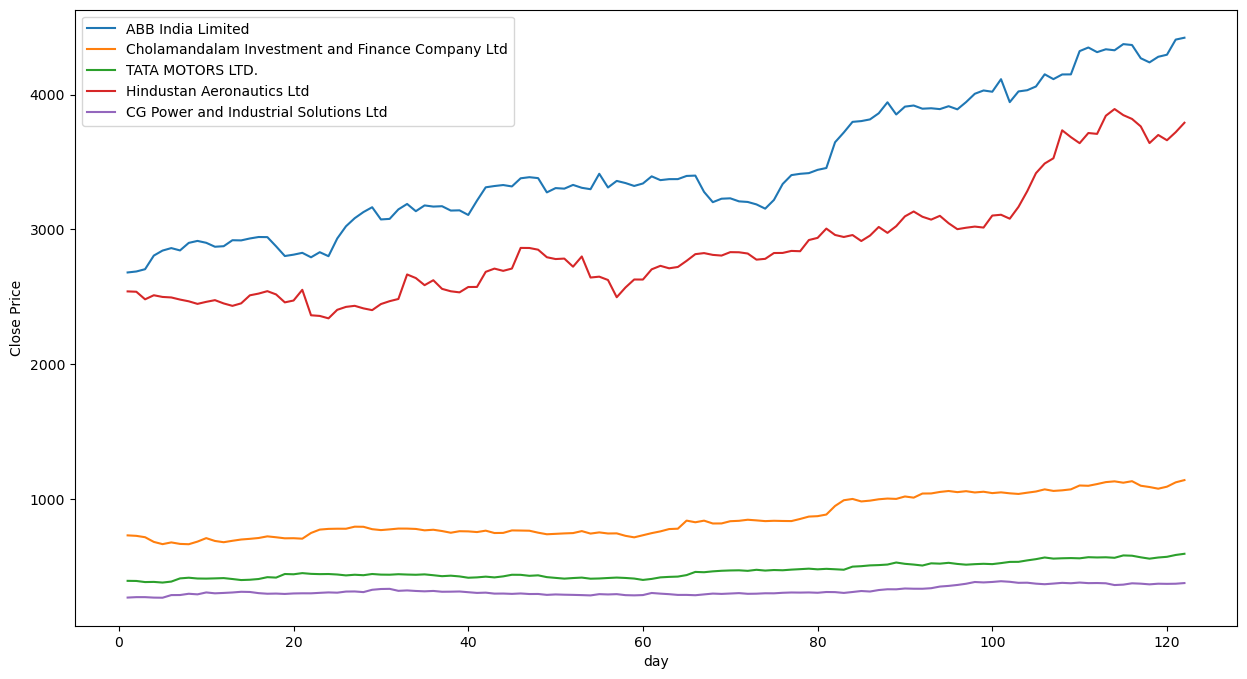

In [92]:
#5 Top-performing companies
plt.figure(figsize=(15,8))
topperformers=df_stock_performance.sort_values(by='pct_caange',ascending=False)[:5]
topperformers['Security_Code'].unique()
for i in topperformers['Security_Code'].unique():
    security_name=df_stock[df_stock['Security Code']==i]['Security Name'].values[0]
    print(security_name)
    sns.lineplot(x=df2[df2['Security Code']==i]['rank'],y=df2[df2['Security Code']==i]['Close Price'],label=security_name)
plt.xlabel('day')

ABB India Limited
Cholamandalam Investment and Finance Company Ltd
TATA MOTORS LTD.
Hindustan Aeronautics Ltd
CG Power and Industrial Solutions Ltd


Text(0.5, 0, 'day')

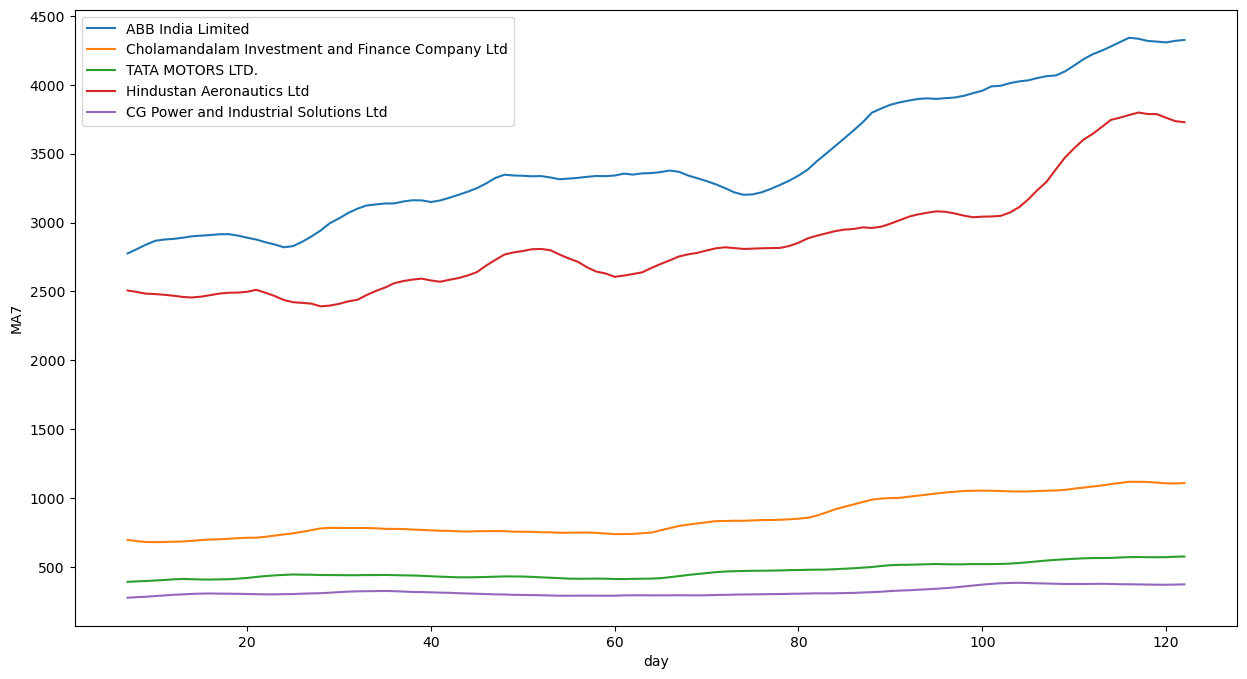

In [93]:
# 7 Day Moving Average of Top performing Compnies 
plt.figure(figsize=(15,8))
topperformers=df_stock_performance.sort_values(by='pct_caange',ascending=False)[:5]
topperformers['Security_Code'].unique()
for i in topperformers['Security_Code'].unique():
    security_name=df_stock[df_stock['Security Code']==i]['Security Name'].values[0]
    print(security_name)
    sns.lineplot(x=df2[df2['Security Code']==i]['rank'],y=df2[df2['Security Code']==i]['MA7'],label=security_name)
plt.xlabel('day')

ABB India Limited
Cholamandalam Investment and Finance Company Ltd
TATA MOTORS LTD.
Hindustan Aeronautics Ltd
CG Power and Industrial Solutions Ltd
Zydus Lifesciences Ltd


<Figure size 1500x1000 with 0 Axes>

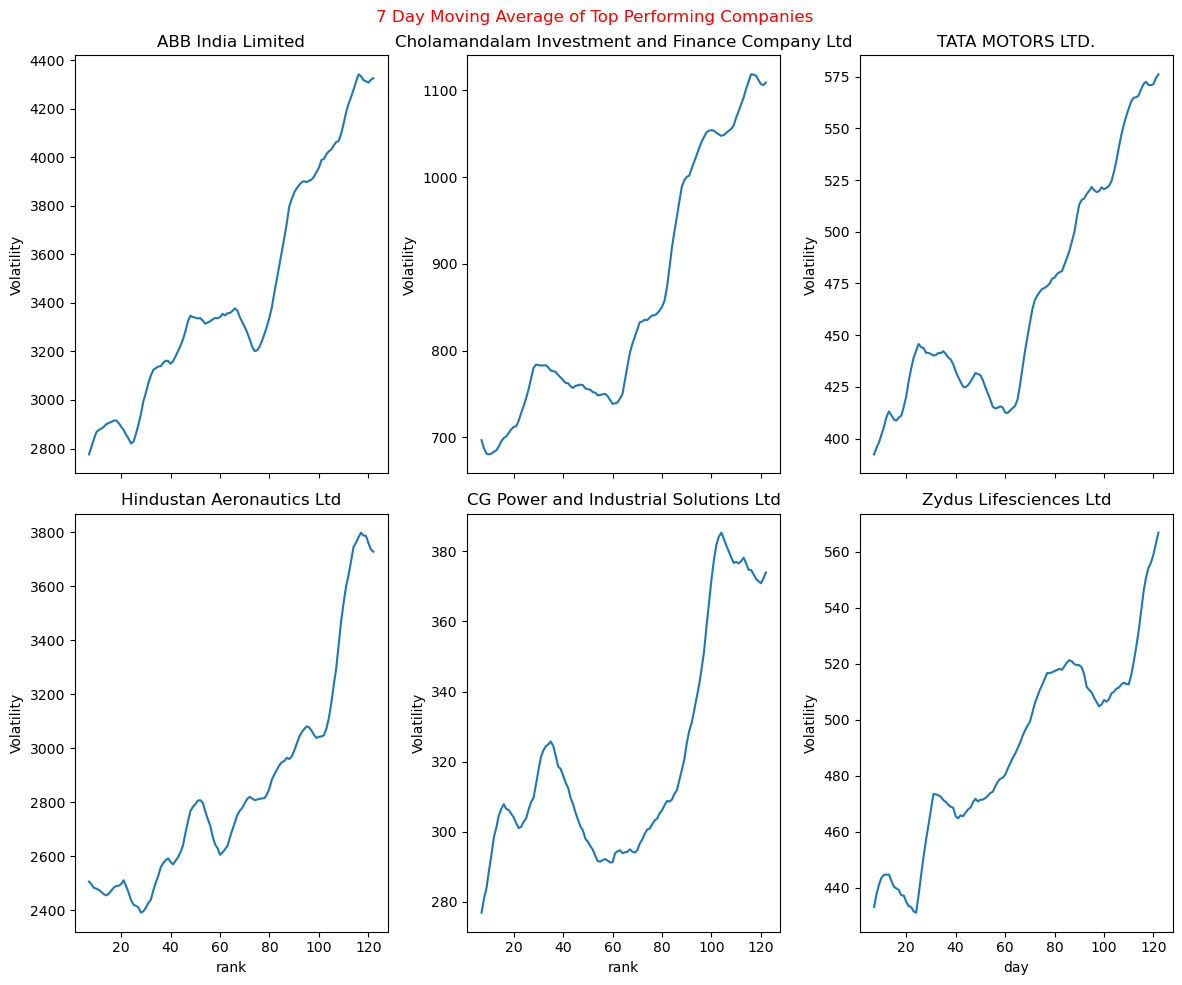

In [94]:
plt.figure(figsize=(15, 10))

topperformers = df_stock_performance.sort_values(by='pct_caange', ascending=False)[:6]
security_codes = topperformers['Security_Code'].unique()

# Creating subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10), sharex=True)

# Reshape axes to flatten the 2D array
axes = axes.flatten()

for i, security_code in enumerate(security_codes):
    security_name = df_stock[df_stock['Security Code'] == security_code]['Security Name'].values[0]
    print(security_name)

    # Plotting on the respective subplot
    sns.lineplot(ax=axes[i], x=df2[df2['Security Code'] == security_code]['rank'],
                 y=df2[df2['Security Code'] == security_code]['MA7'])
    axes[i].set_ylabel('Volatility')
    axes[i].set_title(security_name)

# Removing unused subplots if there are less than 4 security codes
if len(security_codes) < 4:
    for j in range(len(security_codes), 4):
        fig.delaxes(axes[j])


plt.xlabel('day')
plt.suptitle('7 Day Moving Average of Top Performing Companies',color='r')
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

ABB India Limited
Cholamandalam Investment and Finance Company Ltd
TATA MOTORS LTD.
Hindustan Aeronautics Ltd
CG Power and Industrial Solutions Ltd
Zydus Lifesciences Ltd


<Figure size 1500x1000 with 0 Axes>

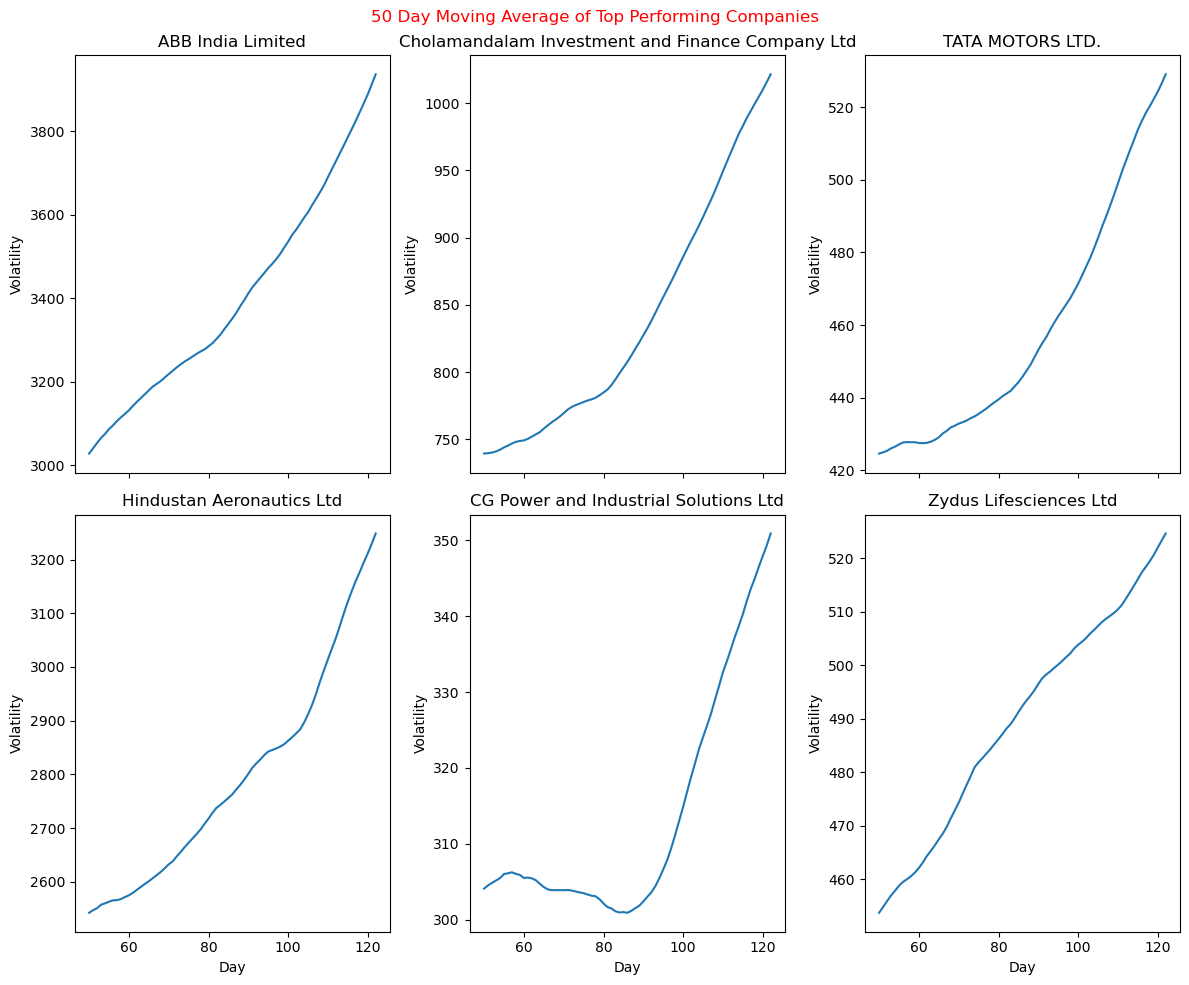

In [95]:
plt.figure(figsize=(15, 10))

topperformers = df_stock_performance.sort_values(by='pct_caange', ascending=False)[:6]
security_codes = topperformers['Security_Code'].unique()

# Creating subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10), sharex=True)

# Reshape axes to flatten the 2D array
axes = axes.flatten()

for i, security_code in enumerate(security_codes):
    security_name = df_stock[df_stock['Security Code'] == security_code]['Security Name'].values[0]
    print(security_name)

    # Plotting on the respective subplot
    sns.lineplot(ax=axes[i], x=df2[df2['Security Code'] == security_code]['rank'],
                 y=df2[df2['Security Code'] == security_code]['MA50'])
    axes[i].set_ylabel('Volatility')
    axes[i].set_xlabel('Day')
    axes[i].set_title(security_name)

# Removing unused subplots if there are less than 4 security codes
if len(security_codes) < 4:
    for j in range(len(security_codes), 4):
        fig.delaxes(axes[j])


#plt.xlabel('day')
plt.suptitle('50 Day Moving Average of Top Performing Companies',color='r')
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

ABB India Limited
Cholamandalam Investment and Finance Company Ltd
TATA MOTORS LTD.
Hindustan Aeronautics Ltd
CG Power and Industrial Solutions Ltd


Text(0.5, 0, 'day')

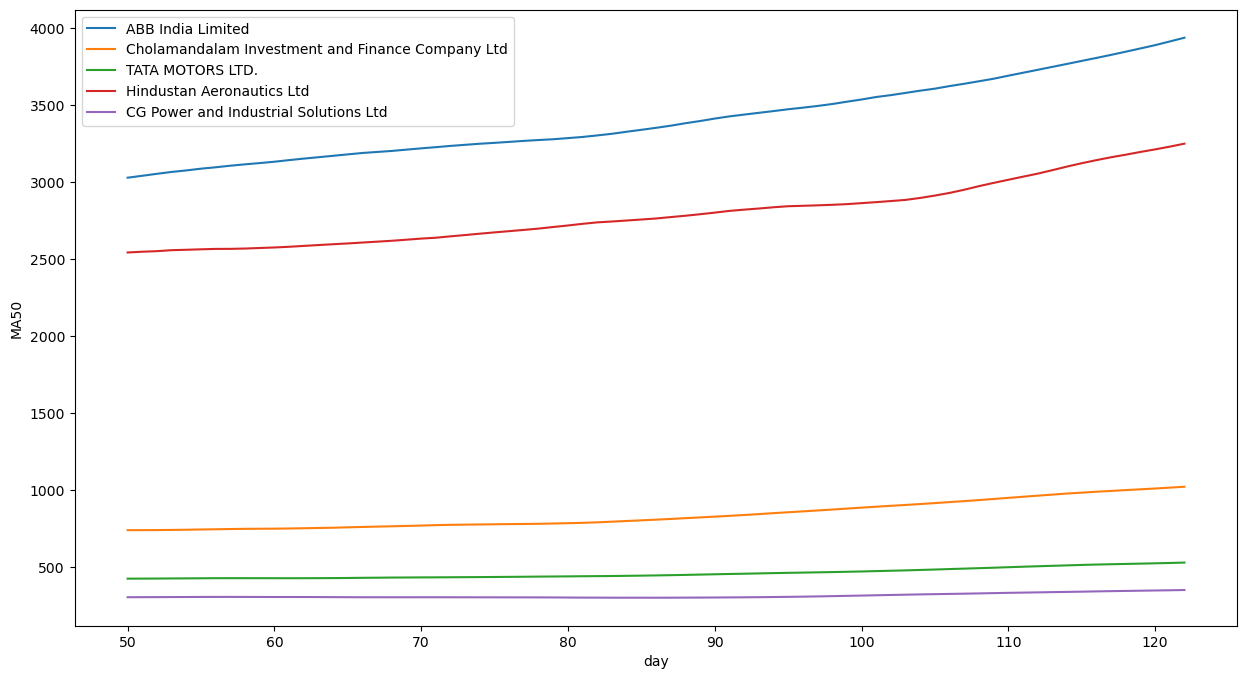

In [96]:
# 50 Day Moving Average of Top performing Compnies 
plt.figure(figsize=(15,8))
topperformers=df_stock_performance.sort_values(by='pct_caange',ascending=False)[:5]
topperformers['Security_Code'].unique()
for i in topperformers['Security_Code'].unique():
    security_name=df_stock[df_stock['Security Code']==i]['Security Name'].values[0]
    print(security_name)
    sns.lineplot(x=df2[df2['Security Code']==i]['rank'],y=df2[df2['Security Code']==i]['MA50'],label=security_name)
plt.xlabel('day')

ABB India Limited
Cholamandalam Investment and Finance Company Ltd
TATA MOTORS LTD.
Hindustan Aeronautics Ltd
CG Power and Industrial Solutions Ltd
Zydus Lifesciences Ltd


<Figure size 1500x1000 with 0 Axes>

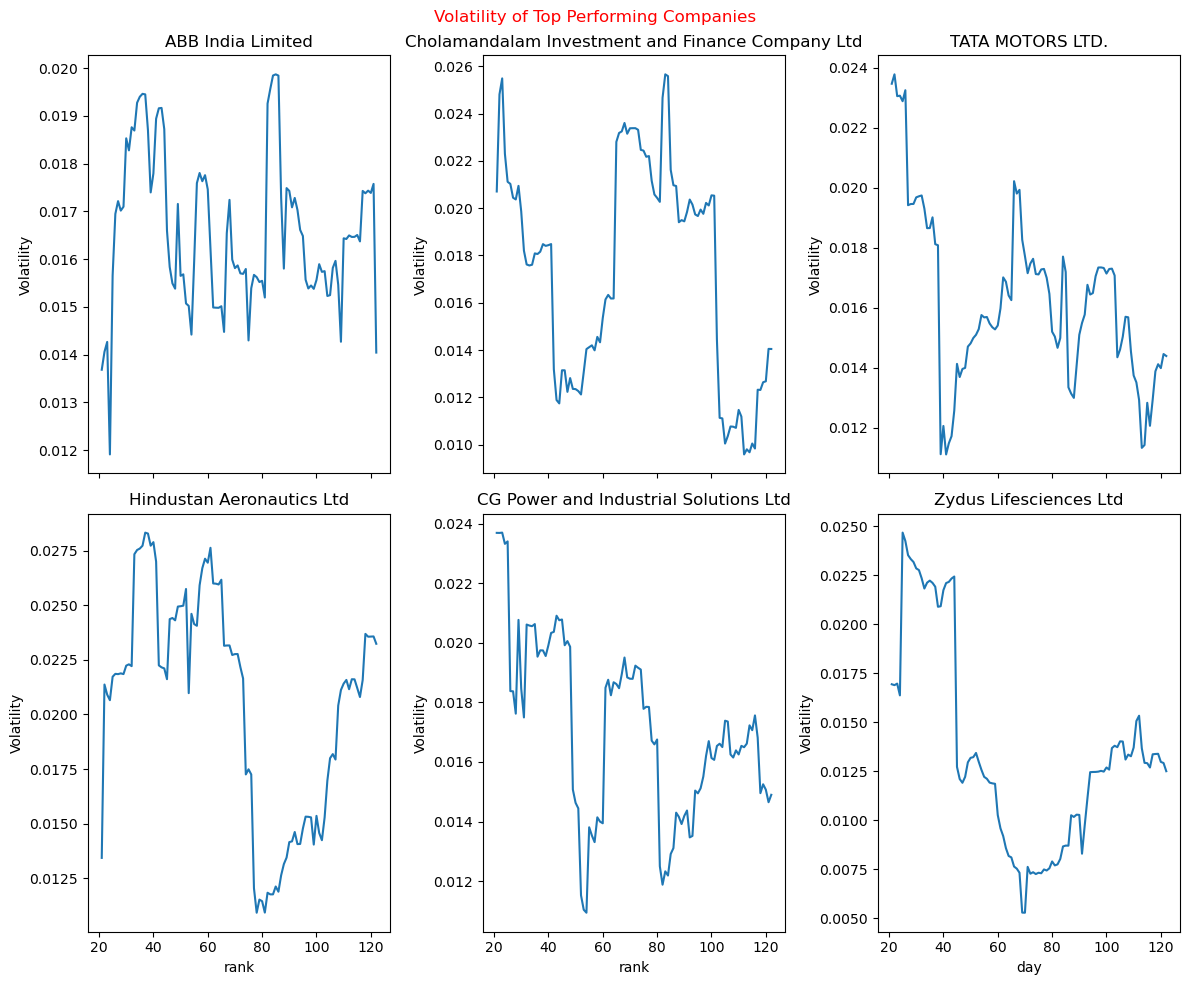

In [97]:
plt.figure(figsize=(15, 10))

topperformers = df_stock_performance.sort_values(by='pct_caange', ascending=False)[:6]
security_codes = topperformers['Security_Code'].unique()

# Creating subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10), sharex=True)

# Reshape axes to flatten the 2D array
axes = axes.flatten()

for i, security_code in enumerate(security_codes):
    security_name = df_stock[df_stock['Security Code'] == security_code]['Security Name'].values[0]
    print(security_name)

    # Plotting on the respective subplot
    sns.lineplot(ax=axes[i], x=df2[df2['Security Code'] == security_code]['rank'],
                 y=df2[df2['Security Code'] == security_code]['Volatility'])
    axes[i].set_ylabel('Volatility')
    axes[i].set_title(security_name)

# Removing unused subplots if there are less than 4 security codes
if len(security_codes) < 4:
    for j in range(len(security_codes), 4):
        fig.delaxes(axes[j])


plt.xlabel('day')
plt.suptitle('Volatility of Top Performing Companies',color='r')
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


[]

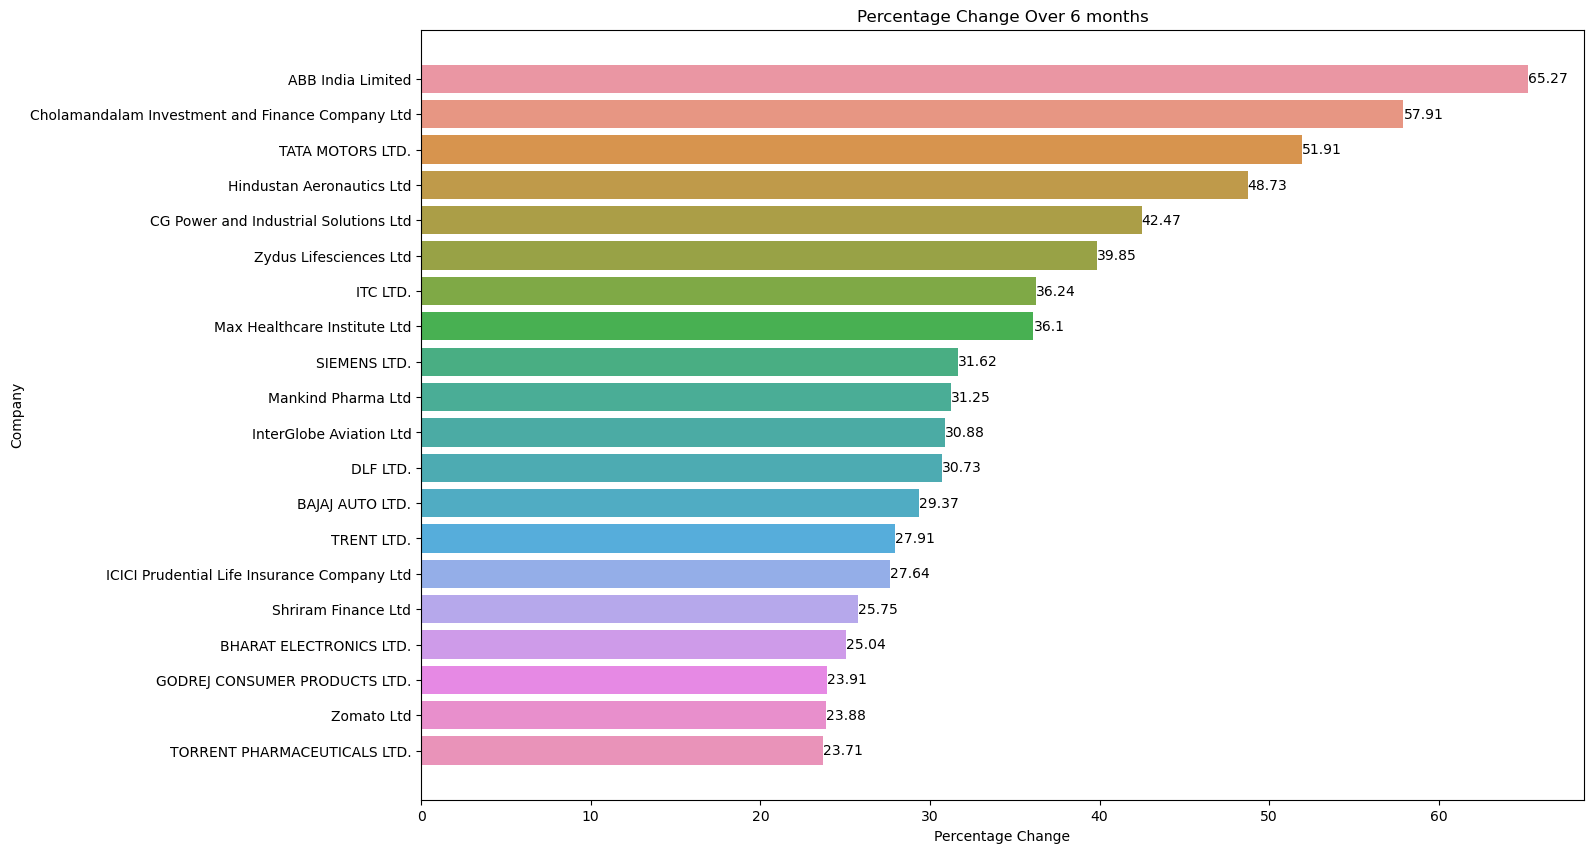

In [98]:
plt.figure(figsize=(15, 10))
df_plt=df_stock_performance.sort_values(by='pct_caange',ascending=False).reset_index()
ax=sns.barplot(y=df_plt['Security_Name'][:20],x=df_plt['pct_caange'][:20])
ax.bar_label(ax.containers[0])
plt.xlabel('Percentage Change')
plt.ylabel('Company')
plt.title('Percentage Change Over 6 months')
plt.plot()

[]

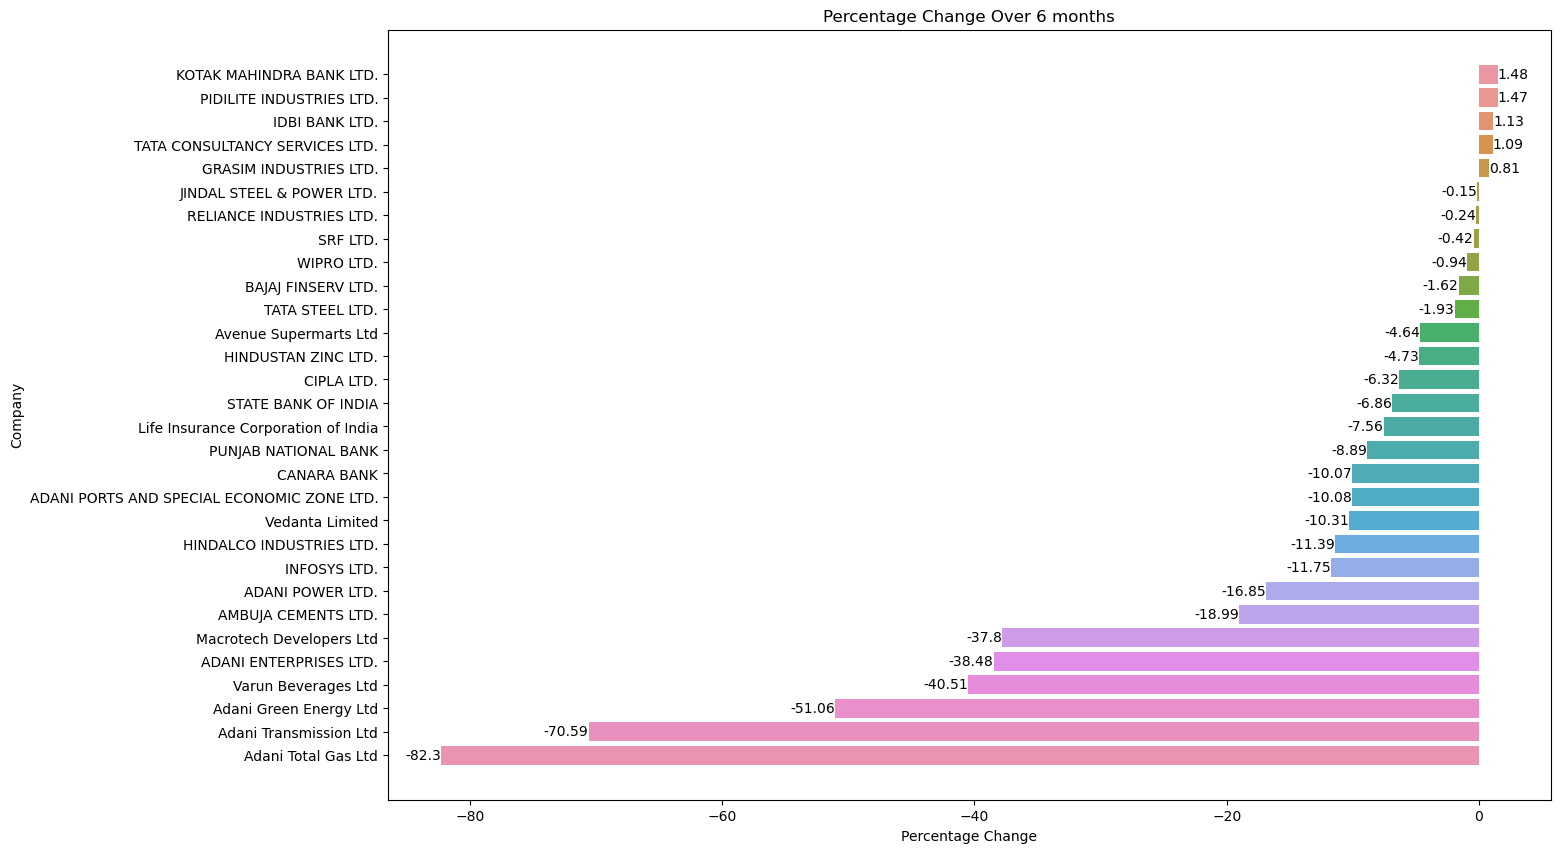

In [99]:
plt.figure(figsize=(15, 10))
df_plt=df_stock_performance.sort_values(by='pct_caange',ascending=False).reset_index()
ax=sns.barplot(y=df_plt['Security_Name'][70:],x=df_plt['pct_caange'][70:])
ax.bar_label(ax.containers[0])
plt.xlabel('Percentage Change')
plt.ylabel('Company')
plt.title('Percentage Change Over 6 months')
plt.plot()

### Stock and Sectorwise analysis 

In [100]:
df_plt=df_stock_performance.sort_values(by='pct_caange',ascending=False)[:20].reset_index()
df_x=df_plt['Industry_New_Name'].value_counts()
df_x

Capital Goods                     5
Healthcare                        4
Financial Services                3
Automobile and Auto Components    2
Fast Moving Consumer Goods        2
Consumer Services                 2
Services                          1
Realty                            1
Name: Industry_New_Name, dtype: int64

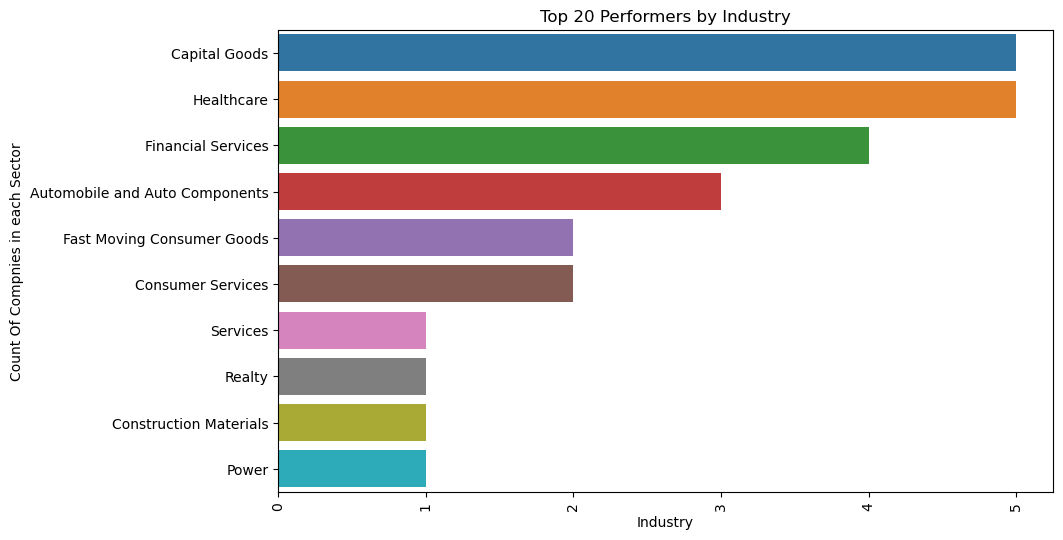

In [101]:
df_plt = df_stock_performance.sort_values(by='pct_caange', ascending=False)[:25].reset_index()
df_x = df_plt['Industry_New_Name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=df_x.index, x=df_x.values)
plt.xlabel('Industry')
plt.ylabel('Count Of Compnies in each Sector')
plt.title('Top 20 Performers by Industry')
plt.xticks(rotation=90)
plt.show()

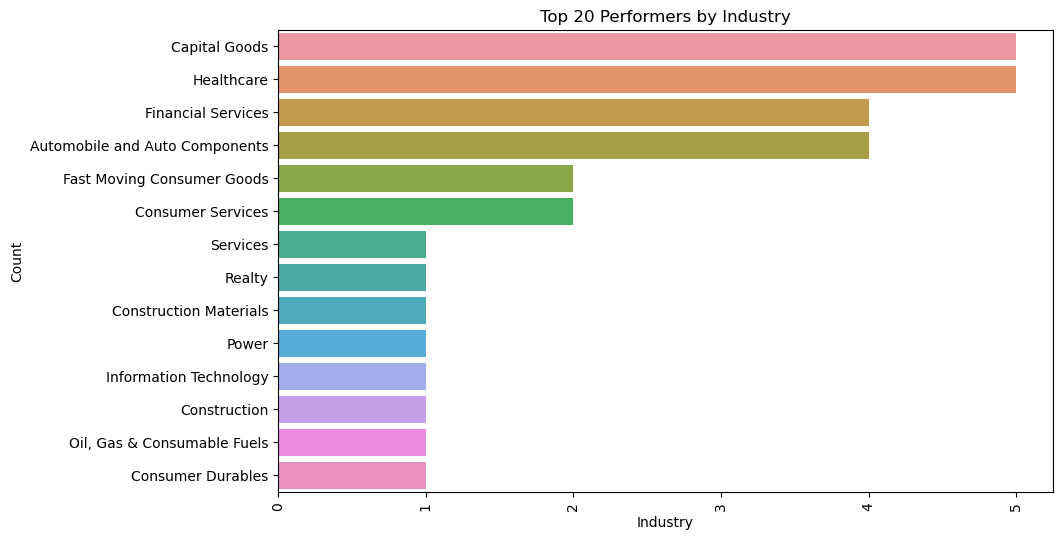

In [102]:
df_plt = df_stock_performance.sort_values(by='pct_caange', ascending=False)[:30].reset_index()
df_x = df_plt['Industry_New_Name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=df_x.index, x=df_x.values)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Top 20 Performers by Industry')
plt.xticks(rotation=90)
plt.show()

In [103]:
df_plt=df_stock_performance.sort_values(by='pct_caange',ascending=False)[80:].reset_index()
df_plt['Industry_New_Name'].value_counts()

Metals & Mining                5
Financial Services             4
Power                          3
Consumer Services              1
Healthcare                     1
Services                       1
Information Technology         1
Construction Materials         1
Realty                         1
Fast Moving Consumer Goods     1
Oil, Gas & Consumable Fuels    1
Name: Industry_New_Name, dtype: int64

In [104]:
query='''
with cte as (
SELECT s.Industry_New_Name,s.Security_Name_x, s.Security_Code,d.Open_Price, d.Close_Price,d.Date,
RANK() OVER( PARTITION BY s.Industry_New_Name ORDER BY d.DATE ) as open_rank,
RANK() OVER( PARTITION BY s.Industry_New_Name ORDER BY d.DATE DESC) as close_rank,
AVG(d.Close_Price) OVER( PARTITION BY s.Industry_New_Name) as avg_price 
FROM `stocks-392220.stocks_top_hun.sector` as s 
Inner Join  `stocks-392220.stocks_top_hun.daily` as d 
ON s.Security_Code=d.Security_Code
ORDER BY s.Industry_New_Name) 
,cte_open_price_sector as (
SELECT cte.Industry_New_Name, AVG(cte.Open_Price) as avg_open_price
from cte where cte.open_rank=1
GROUP BY cte.Industry_New_Name )
,cte_close_price_sector as (
SELECT cte.Industry_New_Name, AVG(cte.Close_Price) as avg_closing_price,COUNT(DISTINCT(Security_Code)) as total_compnies
from cte where cte.close_rank=1
GROUP BY cte.Industry_New_Name
), 
cte_avg_sector as (
SELECT cte.Industry_New_Name, AVG(cte.avg_price) as avg_sector_price from cte GROUP BY cte.Industry_New_Name)
SELECT cte_open_price_sector.Industry_New_Name, ROUND(cte_open_price_sector.avg_open_price,2) as avg_open_price,ROUND(cte_close_price_sector.avg_closing_price,2) as avg_closing_price, 
ROUND(cte_avg_sector.avg_sector_price,2) as avg_sector_price, cte_close_price_sector.total_compnies 
FROM cte_open_price_sector INNER JOIN cte_close_price_sector ON cte_open_price_sector.Industry_New_Name=cte_close_price_sector.Industry_New_Name 
INNER JOIN cte_avg_sector ON cte_avg_sector.Industry_New_Name=cte_open_price_sector.Industry_New_Name
'''
df_sector_wise=runner(query)

In [105]:
df_sector_wise

Industry_New_Name  avg_open_price  avg_closing_price  \
0                  Metals & Mining          920.89             695.34   
1       Fast Moving Consumer Goods         3182.88            3579.24   
2                Consumer Durables         1846.63            2092.63   
3   Automobile and Auto Components         2616.94            3066.96   
4                    Capital Goods         1690.36            2496.53   
5                            Power          905.33             438.18   
6                Consumer Services         1839.33            1909.32   
7               Financial Services         1421.28            1579.82   
8                       Healthcare         2079.40            2299.44   
9                         Services         1414.35            1682.88   
10                    Construction         2088.00            2474.50   
11               Telecommunication          807.00             878.15   
12          Construction Materials         8098.98            8586.25   
13     Oil, Gas & Consumable Fuels         1018.59             593.79   
14                       Chemicals         2429.97            2443.95   
15                          Realty          732.58             584.23   
16          Information Technology         1933.78            2090.22   

    avg_sector_price  total_compnies  
0             668.75               7  
1            3270.82              10  
2            1846.09               4  
3            2728.03               9  
4            2017.41               5  
5             511.15               6  
6            1673.85               3  
7            1416.97              22  
8            2078.18               9  
9            1391.24               2  
10           2226.03               1  
11            788.50               1  
12           8608.21               4  
13            665.90               7  
14           2399.96               2  
15            650.56               2  
16           1983.60               6

In [106]:
df_sector_wise['total_change']=df_sector_wise['avg_closing_price']-df_sector_wise['avg_open_price']

In [107]:
df_sector_wise['pct_change']=round(df_sector_wise['total_change']*100/df_sector_wise['avg_open_price'],2)

In [108]:
df_sector_wise

Industry_New_Name  avg_open_price  avg_closing_price  \
0                  Metals & Mining          920.89             695.34   
1       Fast Moving Consumer Goods         3182.88            3579.24   
2                Consumer Durables         1846.63            2092.63   
3   Automobile and Auto Components         2616.94            3066.96   
4                    Capital Goods         1690.36            2496.53   
5                            Power          905.33             438.18   
6                Consumer Services         1839.33            1909.32   
7               Financial Services         1421.28            1579.82   
8                       Healthcare         2079.40            2299.44   
9                         Services         1414.35            1682.88   
10                    Construction         2088.00            2474.50   
11               Telecommunication          807.00             878.15   
12          Construction Materials         8098.98            8586.25   
13     Oil, Gas & Consumable Fuels         1018.59             593.79   
14                       Chemicals         2429.97            2443.95   
15                          Realty          732.58             584.23   
16          Information Technology         1933.78            2090.22   

    avg_sector_price  total_compnies  total_change  pct_change  
0             668.75               7       -225.55      -24.49  
1            3270.82              10        396.36       12.45  
2            1846.09               4        246.00       13.32  
3            2728.03               9        450.02       17.20  
4            2017.41               5        806.17       47.69  
5             511.15               6       -467.15      -51.60  
6            1673.85               3         69.99        3.81  
7            1416.97              22        158.54       11.15  
8            2078.18               9        220.04       10.58  
9            1391.24               2        268.53       18.99  
10           2226.03               1        386.50       18.51  
11            788.50               1         71.15        8.82  
12           8608.21               4        487.27        6.02  
13            665.90               7       -424.80      -41.70  
14           2399.96               2         13.98        0.58  
15            650.56               2       -148.35      -20.25  
16           1983.60               6        156.44        8.09

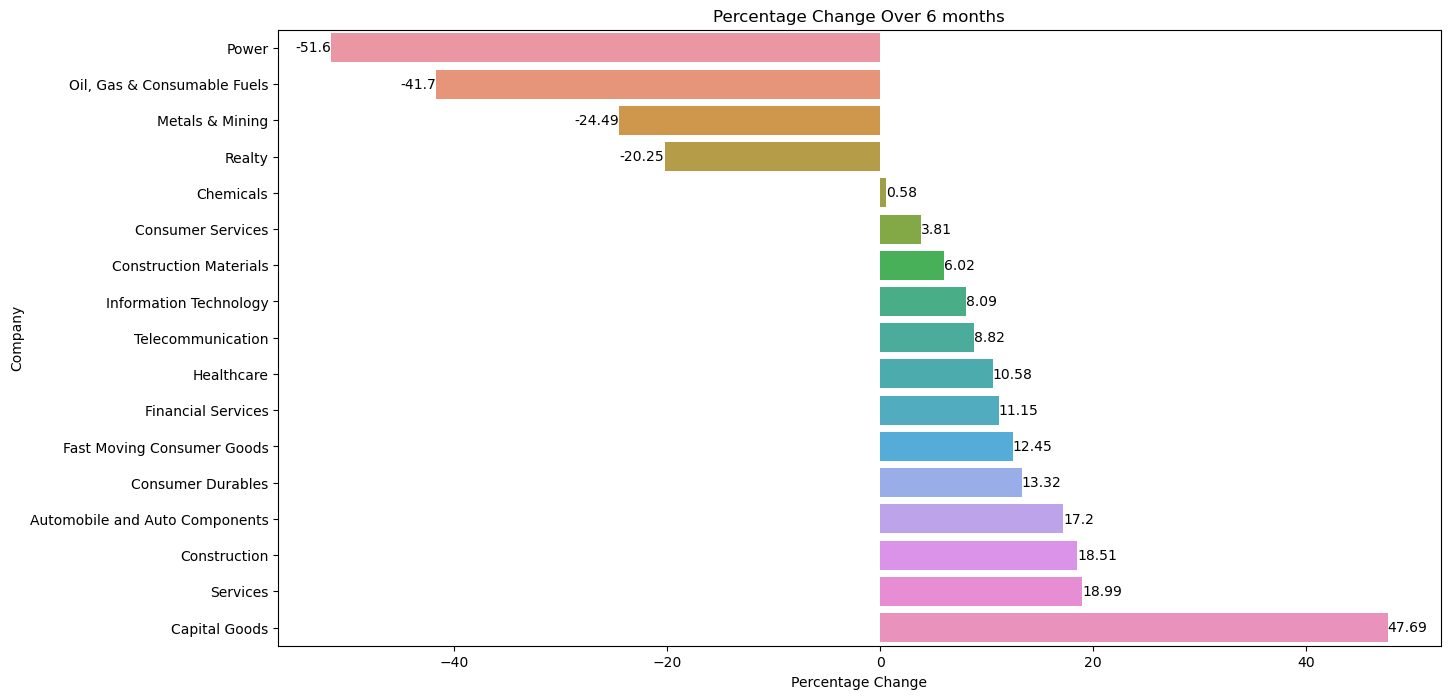

In [109]:
df_plt=df_sector_wise.sort_values(by='pct_change').reset_index(drop=True)
plt.figure(figsize=(15,8))
ax=sns.barplot(y=df_plt['Industry_New_Name'], x=df_plt['pct_change'])
ax.bar_label(ax.containers[0])
plt.xlabel('Percentage Change')
plt.ylabel('Company')
plt.title('Percentage Change Over 6 months')
plt.show()

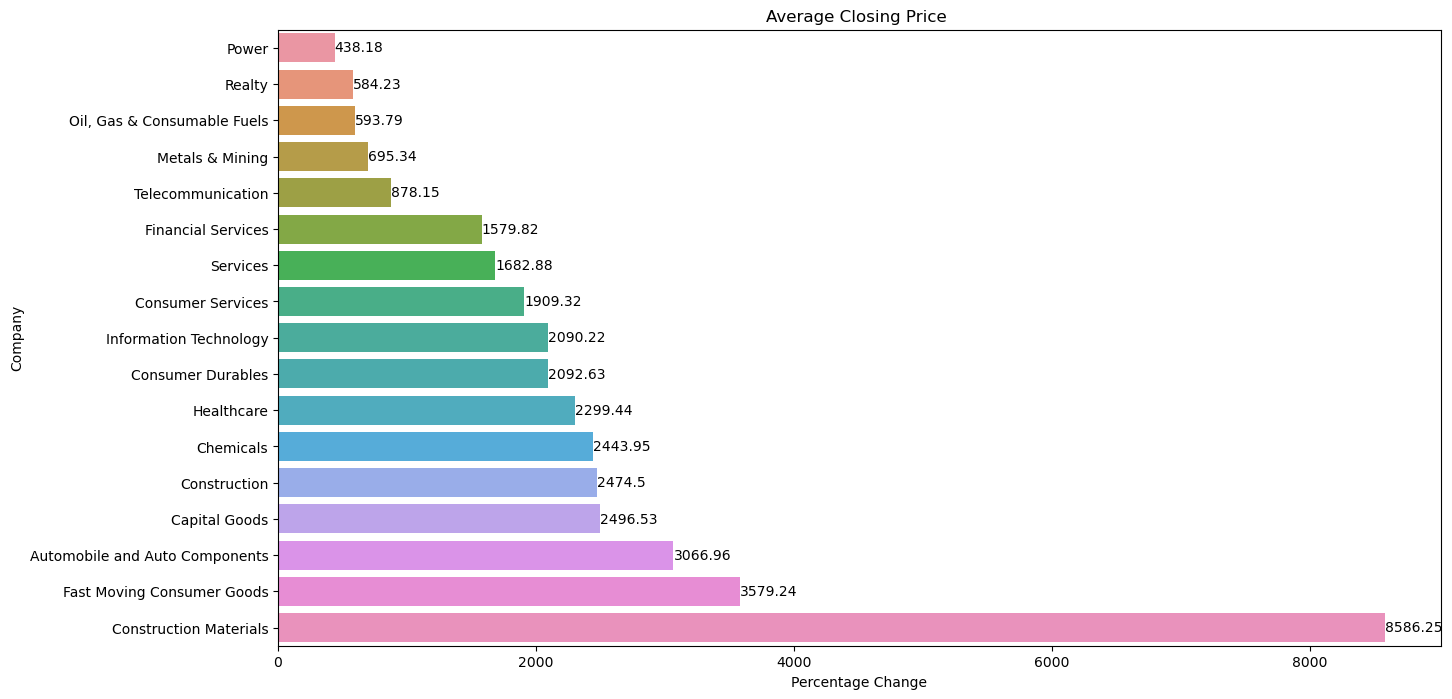

In [110]:
df_plt=df_sector_wise.sort_values(by='avg_closing_price').reset_index(drop=True)
plt.figure(figsize=(15,8))
ax=sns.barplot(y=df_plt['Industry_New_Name'], x=df_plt['avg_closing_price'])
ax.bar_label(ax.containers[0])
plt.xlabel('Percentage Change')
plt.ylabel('Company')
plt.title('Average Closing Price ')
plt.show()

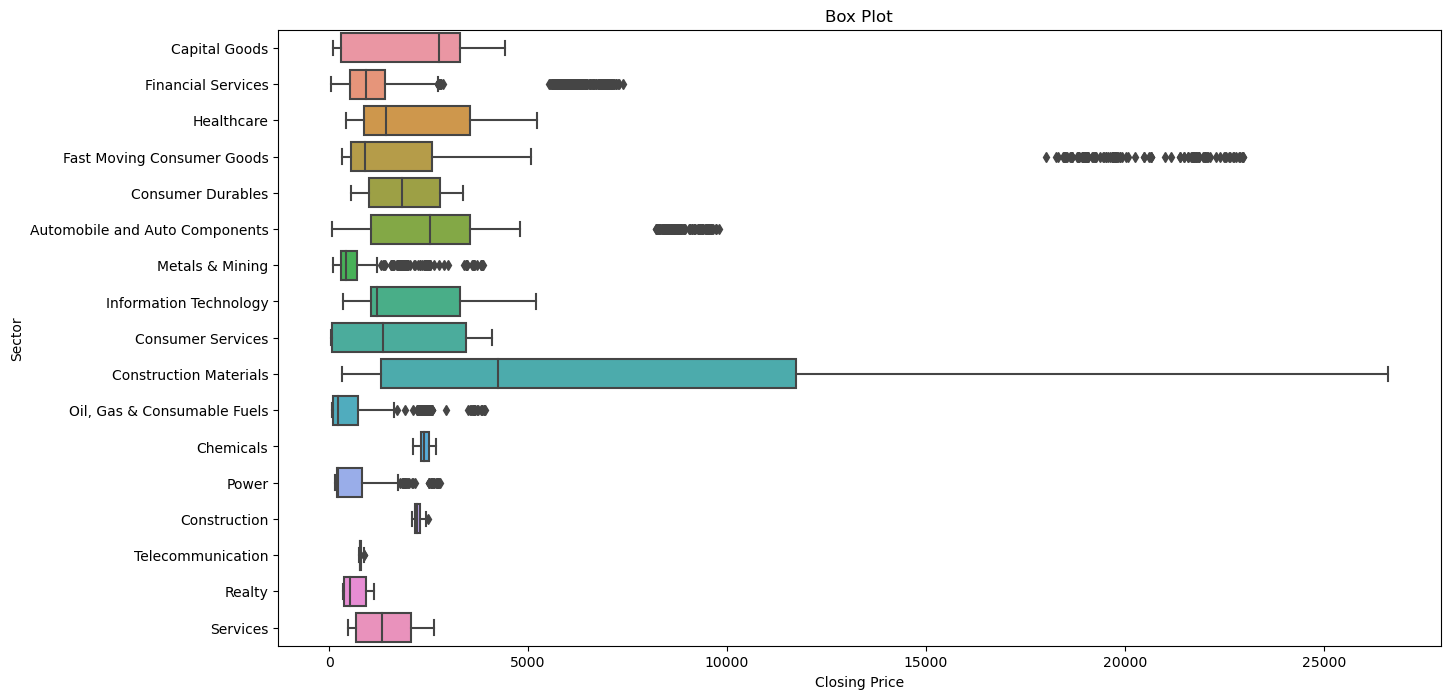

In [161]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df_stock_sector['Industry New Name'], x=df_stock_sector['Close Price'])
plt.xlabel('Closing Price')
plt.ylabel('Sector')
plt.title('Box Plot')
plt.show()

In [407]:
df_sector.head()

Security Code                 Security Name_x  \
0         500325        RELIANCE INDUSTRIES LTD.   
1         532540  TATA CONSULTANCY SERVICES LTD.   
2         500180                   HDFC Bank Ltd   
3         532174                 ICICI BANK LTD.   
4         500696         HINDUSTAN UNILEVER LTD.   

                      Issuer Name Security Id                 Security Name_y  \
0         Reliance Industries Ltd    RELIANCE        RELIANCE INDUSTRIES LTD.   
1  Tata Consultancy Services Ltd.         TCS  TATA CONSULTANCY SERVICES LTD.   
2                  HDFC Bank Ltd.    HDFCBANK                   HDFC Bank Ltd   
3                 ICICI Bank Ltd.   ICICIBANK                 ICICI BANK LTD.   
4        Hindustan Unilever Ltd.,  HINDUNILVR         HINDUSTAN UNILEVER LTD.   

   Status Group  Face Value       ISIN No                           Industry  \
0  Active    A         10.0  INE002A01018             Refineries & Marketing   
1  Active    A          1.0  INE467B01029  Computers - Software & Consulting   
2  Active    A          1.0  INE040A01034                Private Sector Bank   
3  Active    A          2.0  INE090A01021                Private Sector Bank   
4  Active    A          1.0  INE030A01027                   Diversified FMCG   

  Instrument                 Sector Name            Industry New Name  \
0     Equity                      Energy  Oil, Gas & Consumable Fuels   
1     Equity      Information Technology       Information Technology   
2     Equity          Financial Services           Financial Services   
3     Equity          Financial Services           Financial Services   
4     Equity  Fast Moving Consumer Goods   Fast Moving Consumer Goods   

          Igroup Name                     ISubgroup Name  
0  Petroleum Products             Refineries & Marketing  
1       IT - Software  Computers - Software & Consulting  
2               Banks                Private Sector Bank  
3               Banks                Private Sector Bank  
4    Diversified FMCG                   Diversified FMCG

In [146]:
# Calculate percent change
df_new=df_daily.copy()

df_new['Percent_Change'] = ((df_new['Close Price'] - df_new['Open Price']) / df_new['Open Price']) * 100

# Calculate average percent change
avg_percent_change = df_new['Percent_Change'].mean()

# Calculate relative strength
df_new['Relative_Strength'] = df_new['Percent_Change'] / avg_percent_change

# Rank the companies based on percent change
df_new['Percent_Change_Rank'] = df_new['Percent_Change'].rank(ascending=False)

# Rank the companies based on relative strength
df_new['Relative_Strength_Rank'] = df_new['Relative_Strength'].rank(ascending=False)

# Get the top-performing companies
top_performers = df_new[df_new['Percent_Change_Rank'] <= 10]

# Get the underperforming companies
underperformers = df_new[df_new['Percent_Change_Rank'] >= len(df_new) - 10]


AMBUJA CEMENTS LTD.
ADANI ENTERPRISES LTD.
DIVI'S LABORATORIES LTD.
ADANI PORTS AND SPECIAL ECONOMIC ZONE LTD.
Adani Transmission Ltd
Adani Green Energy Ltd


Text(0.5, 0, 'day')

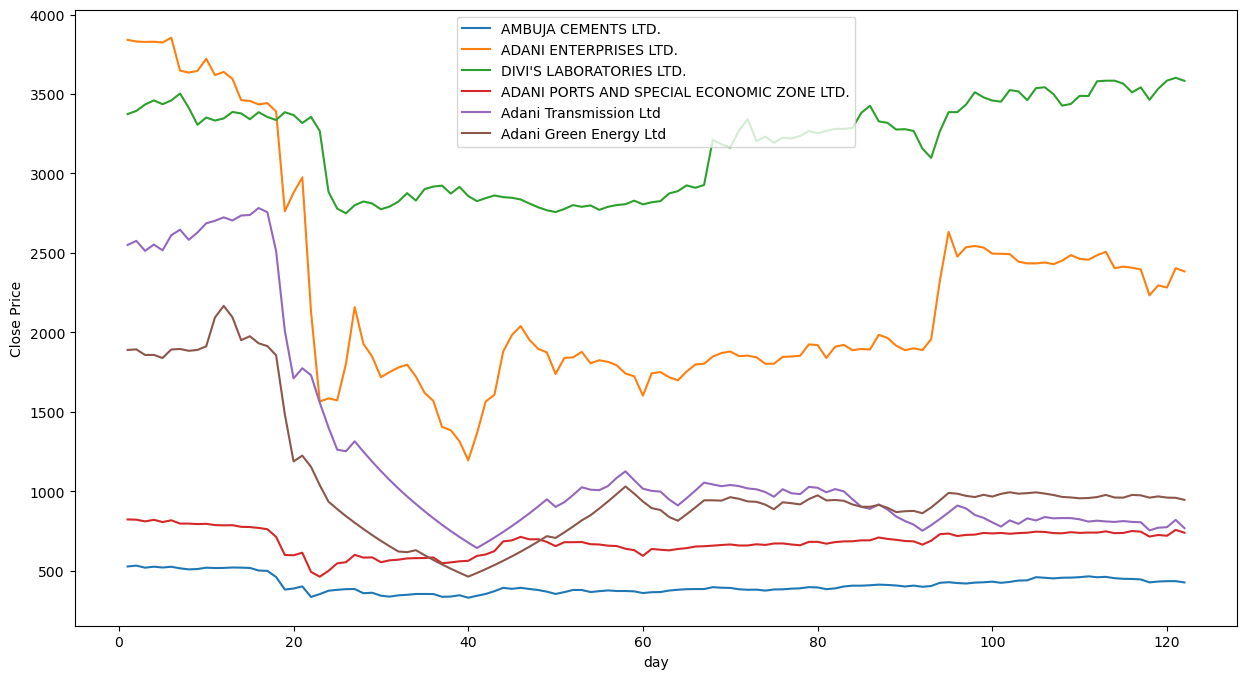

In [147]:
#underperforming companies
plt.figure(figsize=(15,8))
underperformers['Security Code'].unique()
for i in underperformers['Security Code'].unique():
    security_name=df_stock[df_stock['Security Code']==i]['Security Name'].values[0]
    print(security_name)
    sns.lineplot(x=df2[df2['Security Code']==i]['rank'],y=df2[df2['Security Code']==i]['Close Price'],label=security_name)
plt.xlabel('day')

In [148]:
top_performers['Security Code'].unique()

array([512599, 541450, 543287], dtype=int64)

ADANI ENTERPRISES LTD.
Adani Green Energy Ltd
Macrotech Developers Ltd


Text(0.5, 0, 'day')

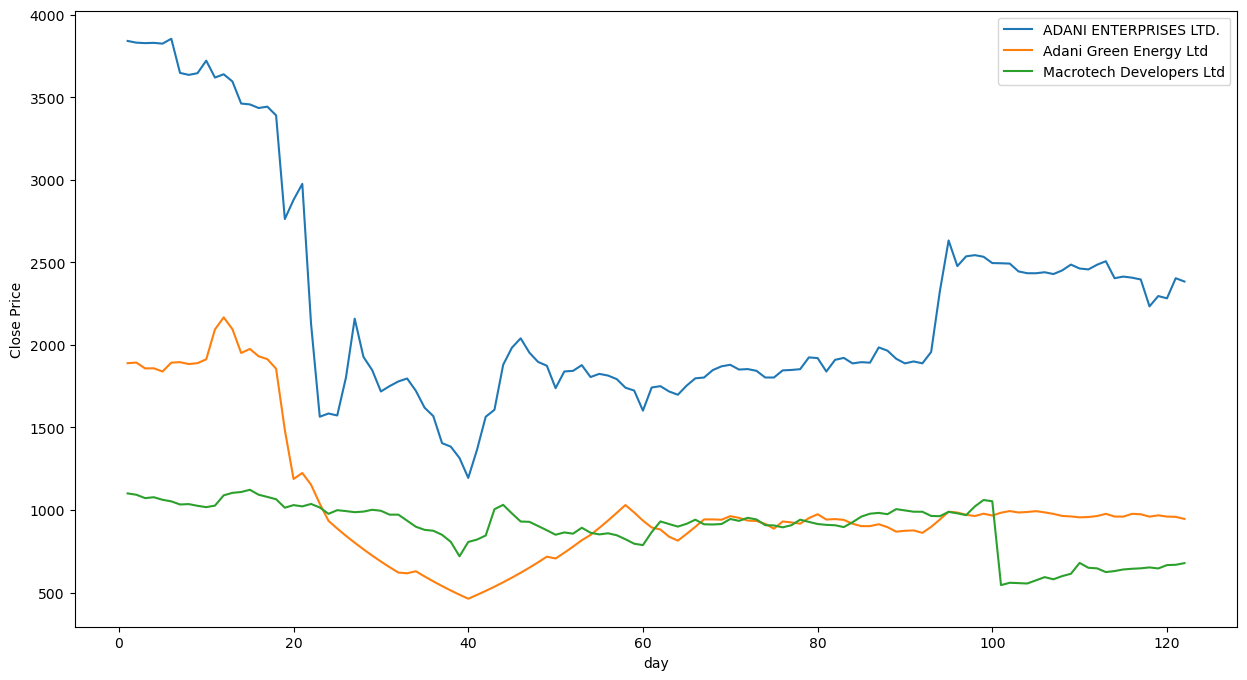

In [150]:
#top-performing companies
plt.figure(figsize=(15,8))
top_performers['Security Code'].unique()
for i in top_performers['Security Code'].unique():
    security_name=df_stock[df_stock['Security Code']==i]['Security Name'].values[0]
    print(security_name)
    sns.lineplot(x=df2[df2['Security Code']==i]['rank'],y=df2[df2['Security Code']==i]['Close Price'],label=security_name)
plt.xlabel('day')

In [104]:
df_stock[df_stock['Security Name']=='Adani Total Gas Ltd']

Security Code        Security Name  Close()  Market Capitalization( Cr.)
77         542066  Adani Total Gas Ltd    648.6                     71333.68

<Axes: xlabel='rank', ylabel='Close Price'>

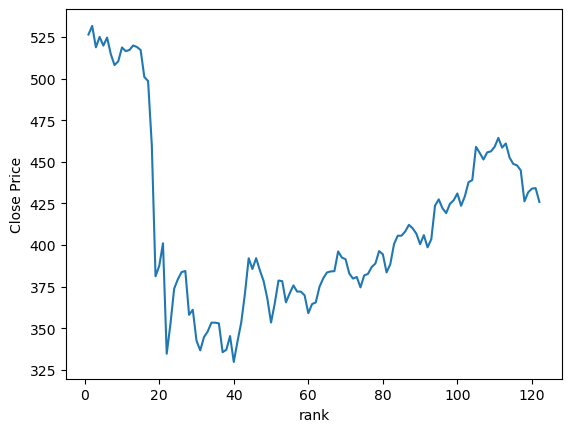

In [111]:
df2=df_daily.copy()
sns.lineplot(x=df2[df2['Security Code']==500425]['rank'],y=df2[df2['Security Code']==500425]['Close Price'])

In [112]:
df_stock_sector=df_daily.merge(df_sector, how='inner', on='Security Code')

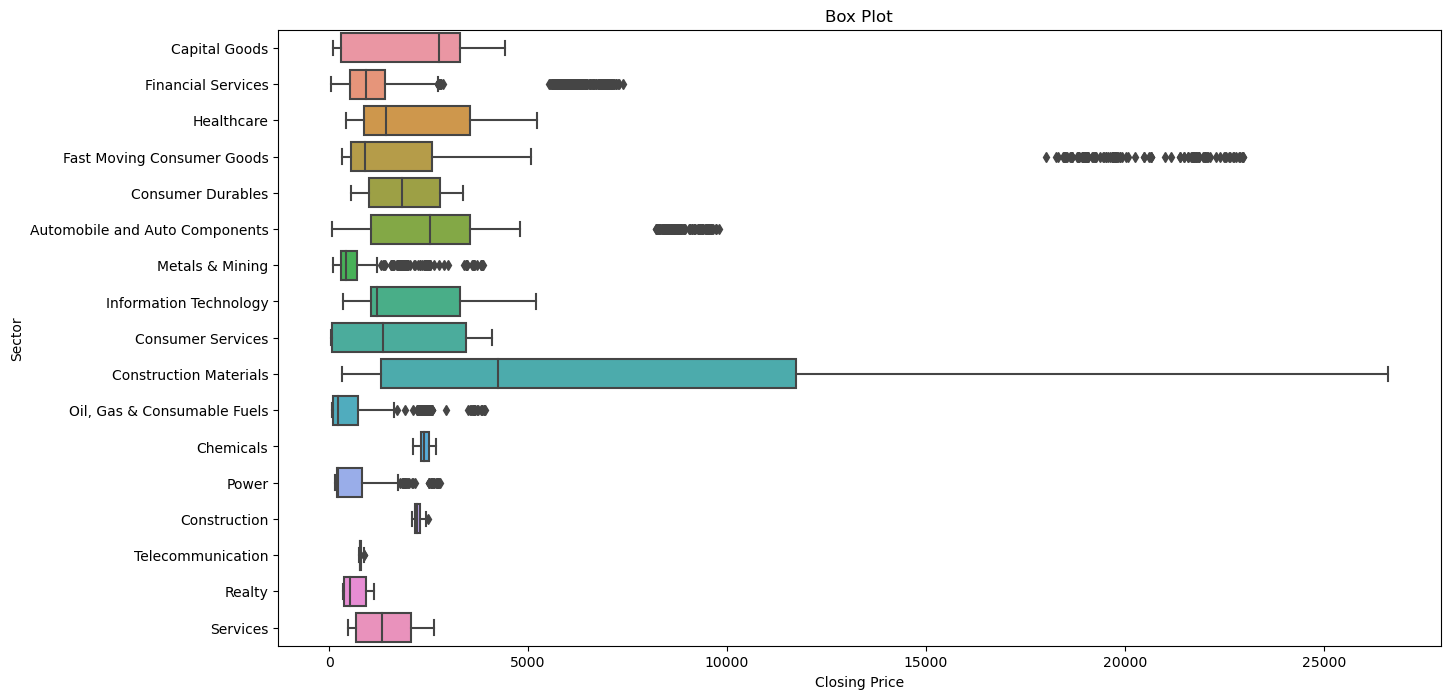

In [113]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df_stock_sector['Industry New Name'], x=df_stock_sector['Close Price'])
plt.xlabel('Closing Price')
plt.ylabel('Sector')
plt.title('Box Plot')
plt.show()

<Axes: xlabel='rank', ylabel='Close Price'>

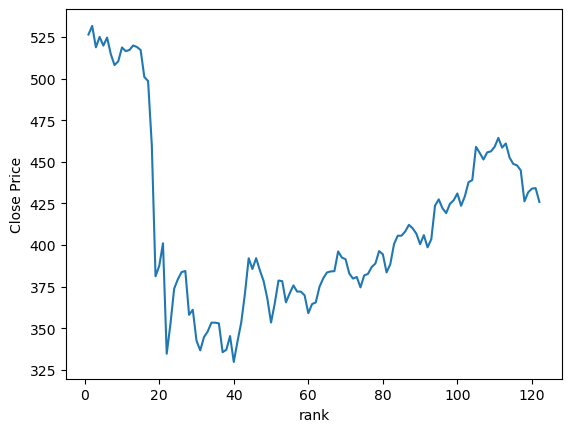

In [115]:
sns.lineplot(y=df2[df2['Security Code']==500425]['Close Price'], x=df2[df2['Security Code']==500425]['rank'])

In [116]:
df_daily['Daily_Return']

0             NaN
1        0.002723
2        0.006287
3        0.037336
4        0.013221
           ...   
12111    0.007971
12112    0.005666
12113   -0.015053
12114    0.012840
12115    0.003765
Name: Daily_Return, Length: 12116, dtype: float64

In [117]:
df_sector[df_sector['Industry New Name']=='Information Technology']

Security Code                 Security Name_x  \
1          532540  TATA CONSULTANCY SERVICES LTD.   
6          500209                    INFOSYS LTD.   
15         532281           HCL TECHNOLOGIES LTD.   
25         507685                      WIPRO LTD.   
33         540005                 LTIMindtree Ltd   
48         532755              TECH MAHINDRA LTD.   

    Market Capitalization( Cr.)                     Issuer Name Security Id  \
1                    1215847.89  Tata Consultancy Services Ltd.         TCS   
6                     557701.66                     Infosys Ltd        INFY   
15                    320321.03            HCL Technologies Ltd     HCLTECH   
25                    217385.59                    Wipro  Ltd.,       WIPRO   
33                    153236.07             LTIMindtree Limited        LTIM   
48                    114868.33           Tech Mahindra Limited       TECHM   

                   Security Name_y  Status Group  Face Value       ISIN No  \
1   TATA CONSULTANCY SERVICES LTD.  Active    A          1.0  INE467B01029   
6                     INFOSYS LTD.  Active    A          5.0  INE009A01021   
15           HCL TECHNOLOGIES LTD.  Active    A          2.0  INE860A01027   
25                      WIPRO LTD.  Active    A          2.0  INE075A01022   
33                 LTIMindtree Ltd  Active    A          1.0  INE214T01019   
48              TECH MAHINDRA LTD.  Active    A          5.0  INE669C01036   

                             Industry Instrument             Sector Name  \
1   Computers - Software & Consulting     Equity  Information Technology   
6   Computers - Software & Consulting     Equity  Information Technology   
15  Computers - Software & Consulting     Equity  Information Technology   
25  Computers - Software & Consulting     Equity  Information Technology   
33  Computers - Software & Consulting     Equity  Information Technology   
48  Computers - Software & Consulting     Equity  Information Technology   

         Industry New Name    Igroup Name                     ISubgroup Name  
1   Information Technology  IT - Software  Computers - Software & Consulting  
6   Information Technology  IT - Software  Computers - Software & Consulting  
15  Information Technology  IT - Software  Computers - Software & Consulting  
25  Information Technology  IT - Software  Computers - Software & Consulting  
33  Information Technology  IT - Software  Computers - Software & Consulting  
48  Information Technology  IT - Software  Computers - Software & Consulting

In [118]:
import pandas as pd

# Assuming you have already loaded the df_daily DataFrame

# Select the columns of interest for correlation analysis
columns_of_interest = ['Open Price', 'High Price', 'Low Price', 'Close Price']

# Calculate the correlation matrix
correlation_matrix = df_daily[columns_of_interest].corr()

# Print the correlation matrix
print(correlation_matrix)

             Open Price  High Price  Low Price  Close Price
Open Price     1.000000    0.999921   0.999930     0.999860
High Price     0.999921    1.000000   0.999903     0.999940
Low Price      0.999930    0.999903   1.000000     0.999939
Close Price    0.999860    0.999940   0.999939     1.000000


In [122]:
area_of_intrest=[]
for i in df_stock_sector[df_stock_sector['Industry New Name']=='Information Technology']['Security Name_x'].unique():
    area_of_intrest.append(i)
area_of_intrest

['INFOSYS LTD.',
 'WIPRO LTD.',
 'HCL TECHNOLOGIES LTD.',
 'TATA CONSULTANCY SERVICES LTD.',
 'TECH MAHINDRA LTD.',
 'LTIMindtree Ltd']

In [123]:
var1=df_stock_sector[df_stock_sector['Security Name_x']=='TATA CONSULTANCY SERVICES LTD.']['Close Price']
var2=df_stock_sector[df_stock_sector['Security Name_x']=='INFOSYS LTD.']['Close Price']
var3=df_stock_sector[df_stock_sector['Security Name_x']=='HCL TECHNOLOGIES LTD.']['Close Price']
np.corrcoef(var1, var3)

array([[1.        , 0.42067895],
       [0.42067895, 1.        ]])

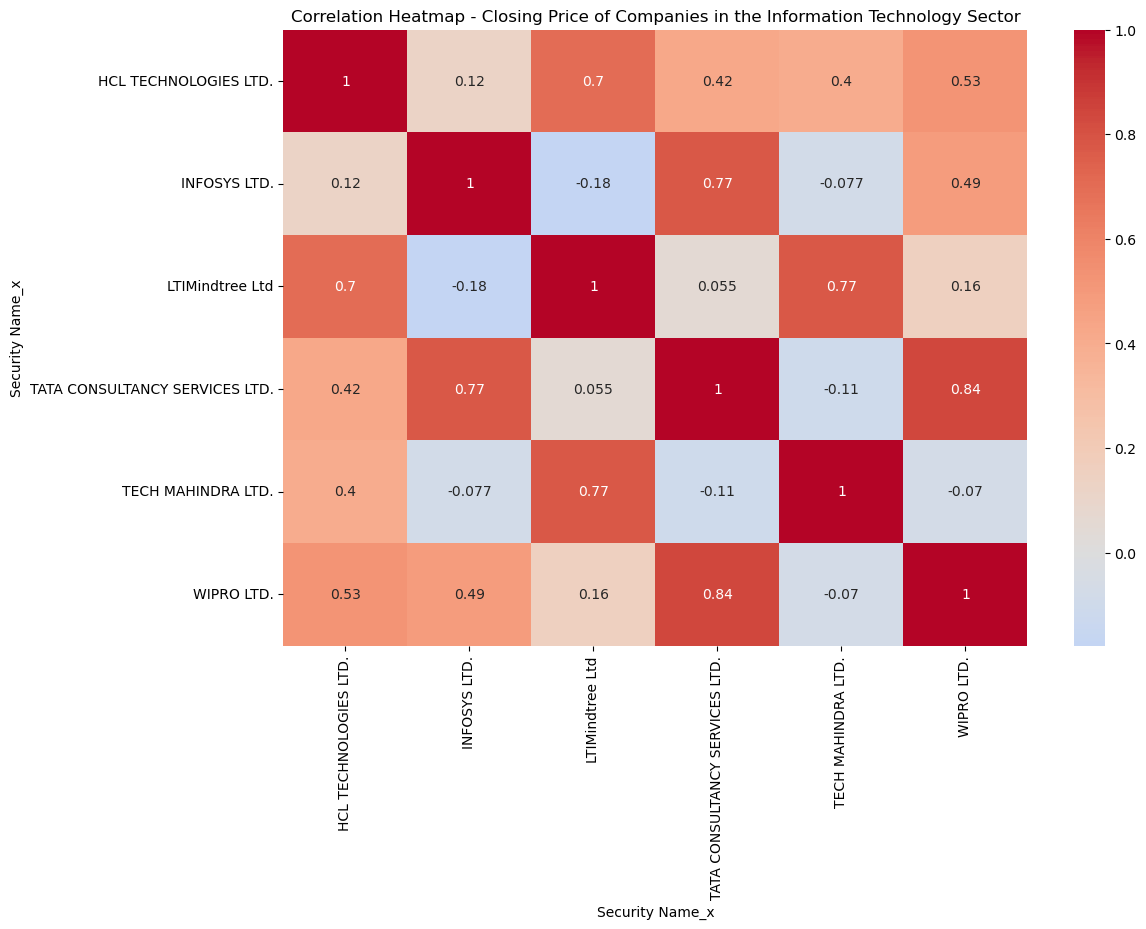

In [144]:
# Filter data for the specific sector (e.g., Information Technology)
sector_name = 'Information Technology'
sector_data = df_stock_sector[df_stock_sector['Sector Name'] == sector_name]

# Pivot the data to have companies as columns and closing prices as values
pivot_data = sector_data.pivot_table(index='Date', columns='Security Name_x', values='Close Price')

# Calculate the correlation between the closing prices of companies within the sector
correlation_data = pivot_data.corr()

# Drop rows and columns with NaN values
correlation_data = correlation_data.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Check if correlation_data is empty before creating the heatmap
if correlation_data.empty:
    print("No valid data for correlation calculation.")
else:
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0)
    plt.title(f"Correlation Heatmap - Closing Price of Companies in the {sector_name} Sector")
    plt.show()

    

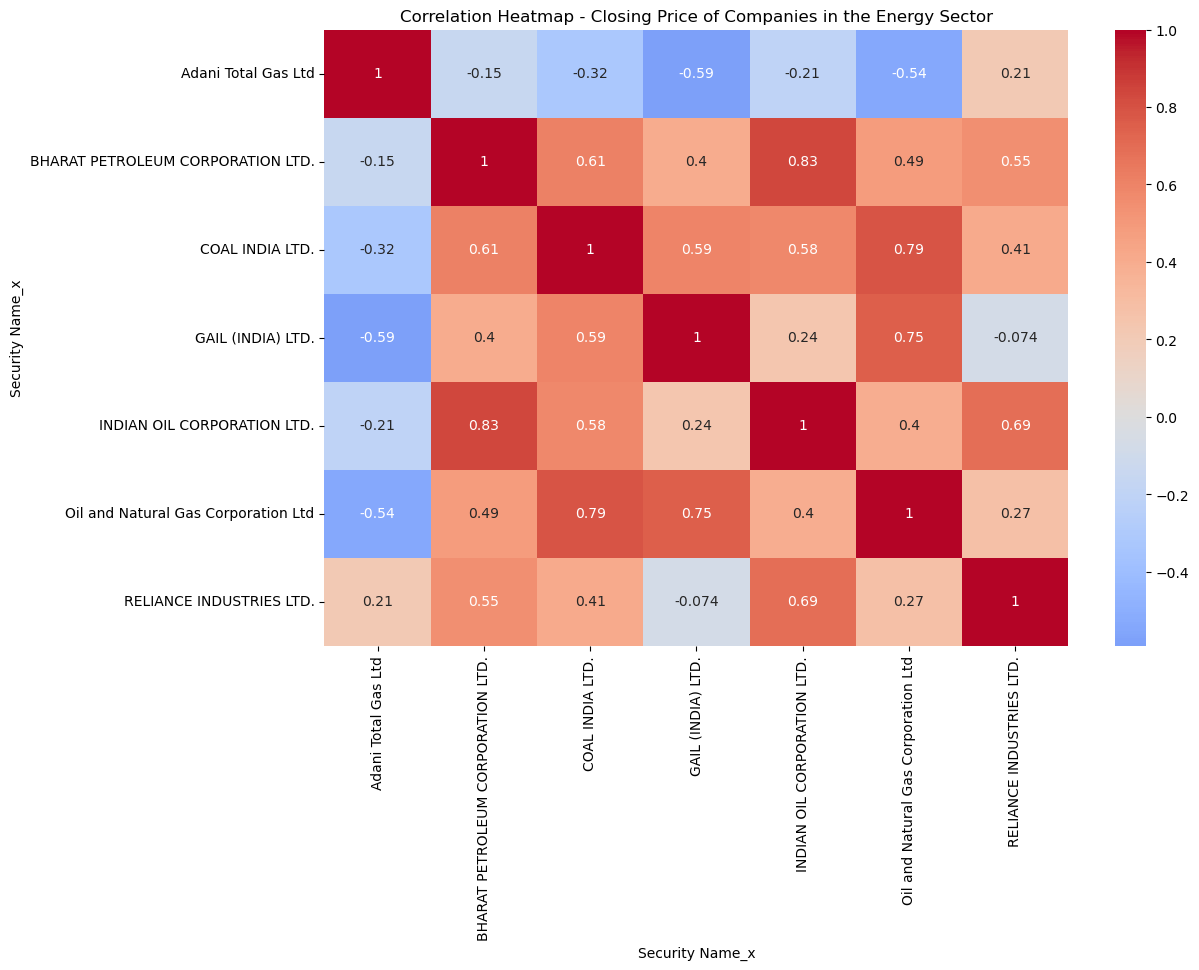

In [148]:

# Filter data for the specific sector (e.g., Information Technology)
sector_name = 'Energy'
sector_data = df_stock_sector[df_stock_sector['Sector Name'] ==sector_name]

# Pivot the data to have companies as columns and closing prices as values
pivot_data = sector_data.pivot_table(index='Date', columns='Security Name_x', values='Close Price')

# Calculate the correlation between the closing prices of companies within the sector
correlation_data = pivot_data.corr()

# Drop rows and columns with NaN values
correlation_data = correlation_data.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Check if correlation_data is empty before creating the heatmap
if correlation_data.empty:
    print("No valid data for correlation calculation.")
else:
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0)
    plt.title(f"Correlation Heatmap - Closing Price of Companies in the {sector_name} Sector")
    plt.show()

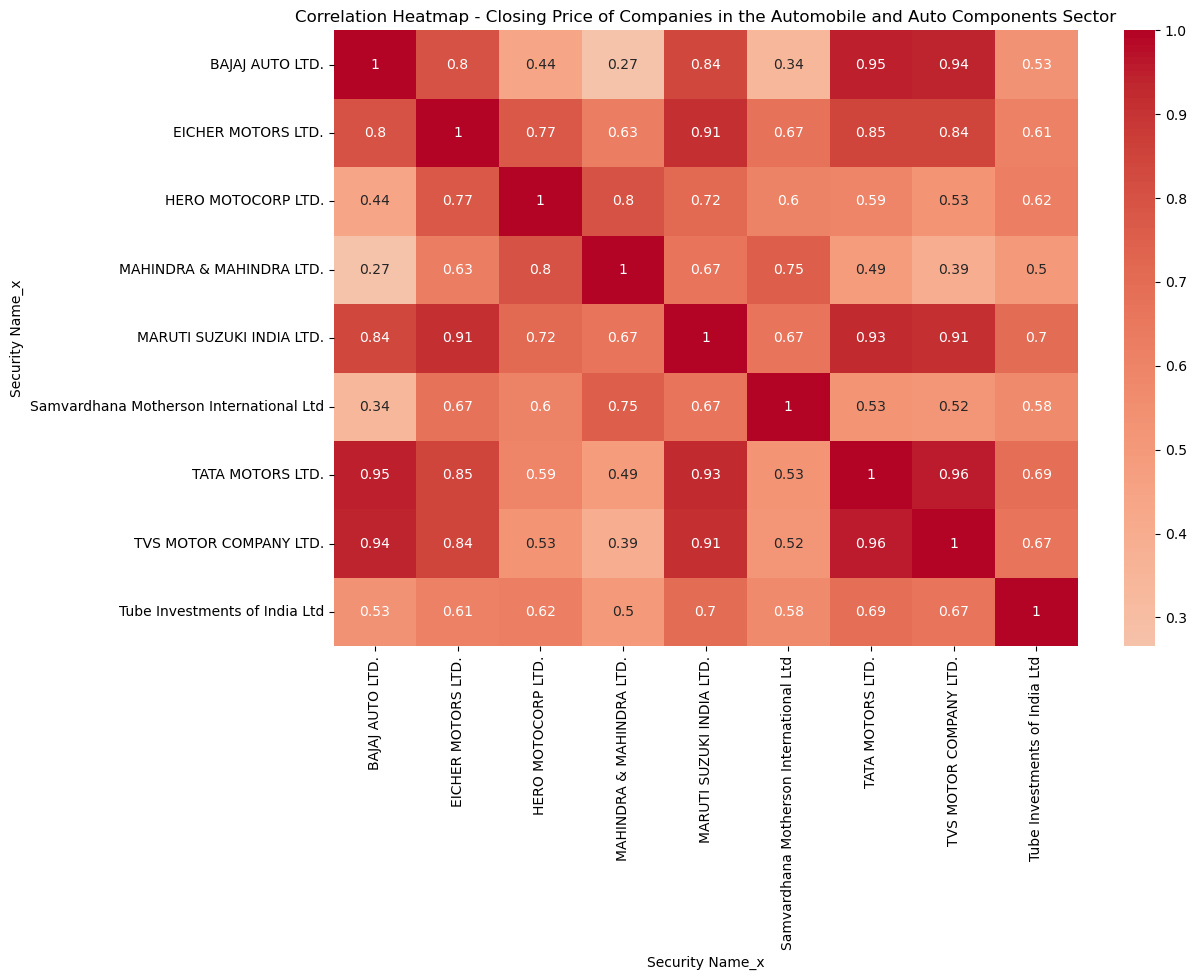

In [169]:
# Filter data for the specific sector (e.g., Information Technology)
sector_name = 'Automobile and Auto Components'
sector_data = df_stock_sector[df_stock_sector['Industry New Name'] == sector_name]

# Pivot the data to have companies as columns and closing prices as values
pivot_data = sector_data.pivot_table(index='Date', columns='Security Name_x', values='Close Price')

# Calculate the correlation between the closing prices of companies within the sector
correlation_data = pivot_data.corr()

# Drop rows and columns with NaN values
correlation_data = correlation_data.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Check if correlation_data is empty before creating the heatmap
if correlation_data.empty:
    print("No valid data for correlation calculation.")
else:
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0)
    plt.title(f"Correlation Heatmap - Closing Price of Companies in the {sector_name} Sector")
    plt.show()


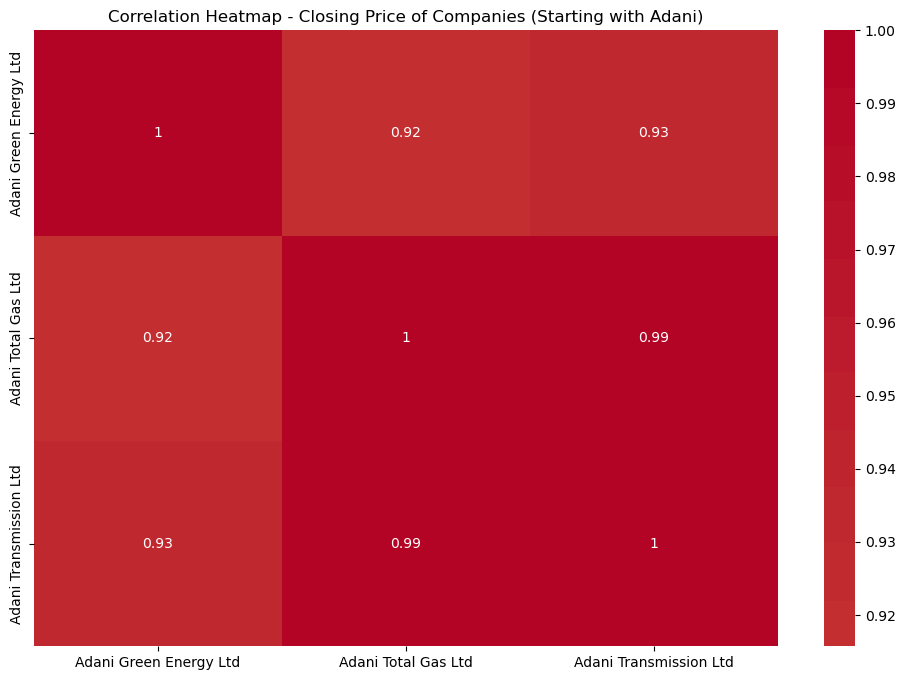

In [154]:
# Lets check for all the adani compnies 

# Filter data for companies whose names start with "Adani"
filtered_data = df_stock_sector[df_stock_sector['Security Name_x'].str.startswith('Adani')]

# Pivot the data to have companies as columns and closing prices as values
pivot_data = filtered_data.pivot_table(index='Date', columns='Security Name_x', values='Close Price')

# Calculate the correlation between the closing prices of the selected companies
correlation_data = pivot_data.corr()

# Drop rows and columns with NaN values
correlation_data = correlation_data.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Check if correlation_data is empty before creating the heatmap
if correlation_data.empty:
    print("No valid data for correlation calculation.")
else:
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0)
    plt.title("Correlation Heatmap - Closing Price of Companies (Starting with Adani)")
    plt.ylabel("")
    plt.xlabel("")
    plt.show()


## All Adani Stocks Shows High correlation 

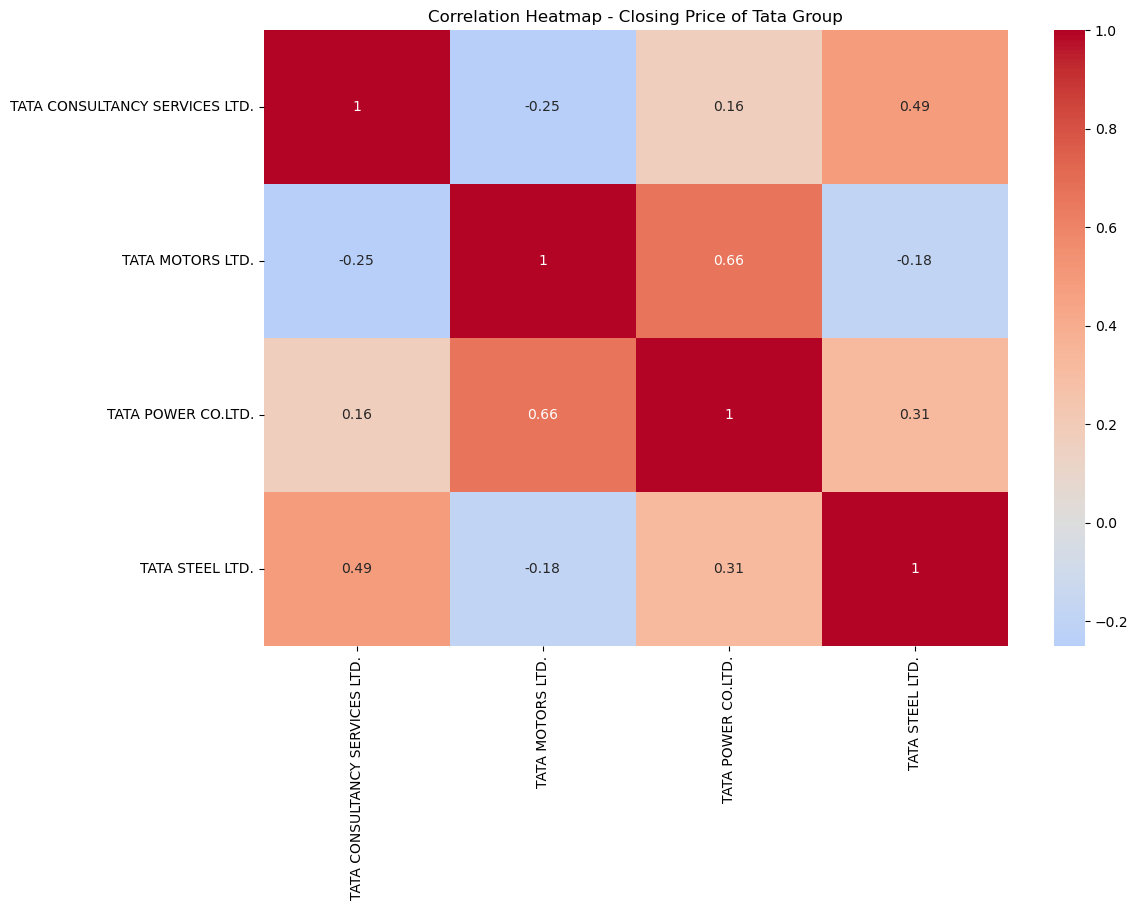

In [202]:
filtered_data = df_stock_sector[df_stock_sector['Security Name_x'].str.startswith('TA')]

# Pivot the data to have companies as columns and closing prices as values
pivot_data = filtered_data.pivot_table(index='Date', columns='Security Name_x', values='Close Price')

# Calculate the correlation between the closing prices of the selected companies
correlation_data = pivot_data.corr()

# Drop rows and columns with NaN values
correlation_data = correlation_data.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Check if correlation_data is empty before creating the heatmap
if correlation_data.empty:
    print("No valid data for correlation calculation.")
else:
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0)
    plt.title("Correlation Heatmap - Closing Price of Tata Group")
    plt.ylabel("")
    plt.xlabel("")
    plt.show()

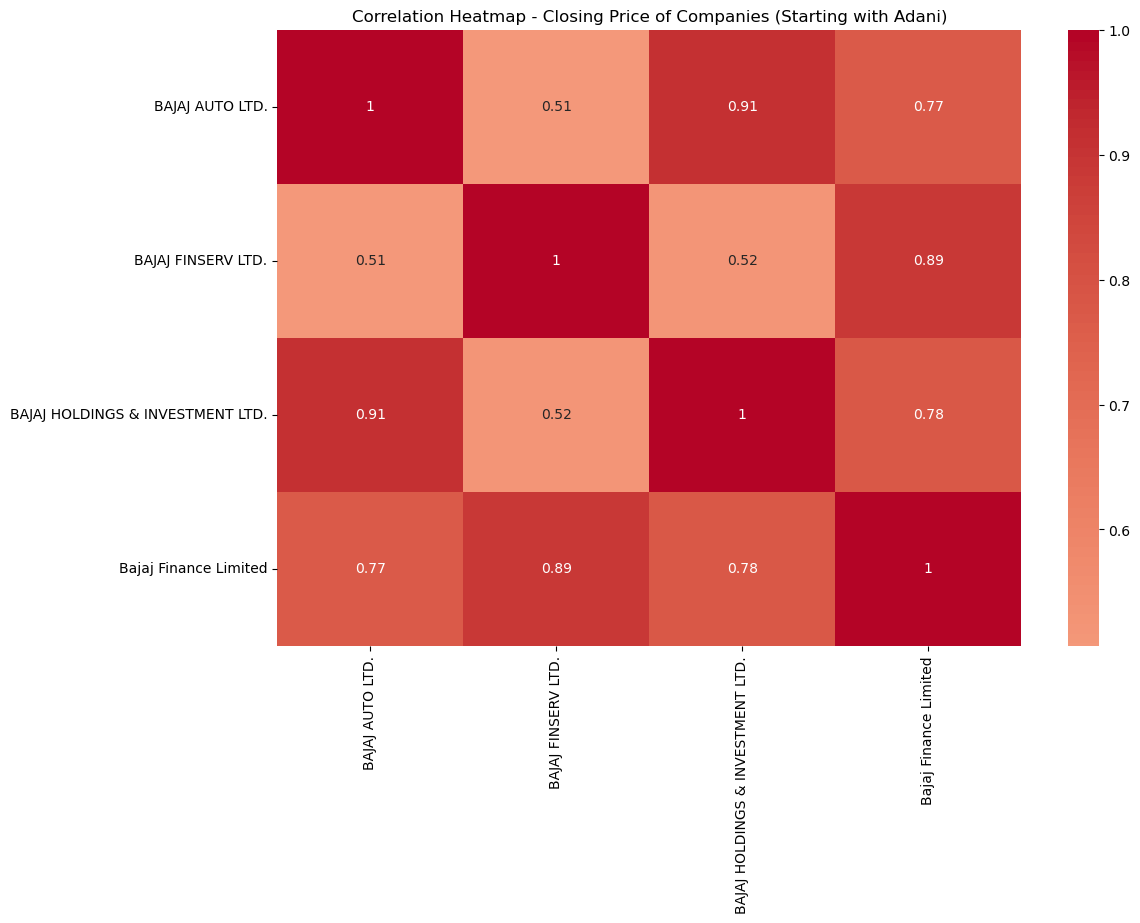

In [173]:
# Filter data for companies whose names start with "Adani"
filtered_data = df_stock_sector[(df_stock_sector['Security Name_x'].str.startswith('BAJAJ'))|(df_stock_sector['Security Name_x'].str.startswith('Bajaj'))]

# Pivot the data to have companies as columns and closing prices as values
pivot_data = filtered_data.pivot_table(index='Date', columns='Security Name_x', values='Close Price')

# Calculate the correlation between the closing prices of the selected companies
correlation_data = pivot_data.corr()

# Drop rows and columns with NaN values
correlation_data = correlation_data.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Check if correlation_data is empty before creating the heatmap
if correlation_data.empty:
    print("No valid data for correlation calculation.")
else:
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0)
    plt.title("Correlation Heatmap - Closing Price of Companies (Starting with Adani)")
    plt.ylabel("")
    plt.xlabel("")
    plt.show()
